In [ ]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium
!pip install fake_useragent
from fake_useragent import UserAgent
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from fake_useragent import UserAgent

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
import concurrent.futures
!pip install retry
!pip install newspaper3k
!pip install openai
from openai import OpenAI
client = OpenAI(api_key="key here",timeout=10.0)
#from newspaper import Article
import nltk
from google.colab import drive
drive.mount('/content/drive')
nltk.download('punkt')
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
import pandas as pd
import numpy as np
from bs4.element import PageElement
import requests
from bs4 import BeautifulSoup
import csv
import os
import openai
openai.api_key = "key here"
#openai.Model.list()
import time
import sys
import argparse
import time

In [ ]:
samkey = "key here"
melkey = "key here"

In [ ]:


# Install dependencies
!apt-get update
!apt install -y unzip xvfb libxi6 libgconf-2-4
!pip install pyvirtualdisplay




# Malay Mail

In [ ]:
urllist = []
page = 0
#malaymailcode
# iterate through page numbers
while True:
    page += 1
    print(page)
    url = 'https://www.malaymail.com/search?query=malaysia%20refugee&pgno='
    source = 'malaymail'
    pageurl = url + str(page)
    r = requests.get(pageurl)
    r_soup = BeautifulSoup(r.text, 'html.parser')

    articles = r_soup.find_all('div',{'class':"col-md-3 article-item"})
    print(len(articles),'num articles')
    # check if there are articles on this page
    if not articles:
        break

    for article in articles:
        print(article)
        date = article.find('span', {'class': 'article-date'}).text
        print(date)
        if int(date.split(' ')[-2]) > 2016:
          aurl = article.find('h2', {'class': 'article-title'}).a['href']
          print(aurl)
          urllist.append(aurl)
        else:
            break
with open('/content/drive/MyDrive/malaymailurls.txt', 'w') as file:
    for url in urllist:
        file.write(url + '\n')


# The Sun

In [ ]:
urllist = []
page = 1
#malaymailcode
# iterate through page numbers
while True:
    print(page)
    url = 'https://www.thesundaily.my/search-result/-/search/%22malaysia%22%20%22refugees%22/false/true/20170101/20230406/date/true/true/0/0/meta/0/0/0/'
    source = 'The Sun'
    pageurl = url + str(page)
    r = requests.get(pageurl)
    r_soup = BeautifulSoup(r.text, 'html.parser')

    articles = r_soup.find_all('li', {'class': "element full-access norestricted"})
    print(len(articles), 'num articles')

    # check if there are articles on this page
    if not articles:
        break

    for article in articles:
        print(article)
        aurl = 'https://www.thesundaily.my' + article.find('div', {'class': 'headline'}).a['href']
        print(aurl)
        urllist.append(aurl)

    page += 1

with open('/content/drive/MyDrive/TheSunurls.txt', 'w') as file:
    for url in urllist:
        file.write(url + '\n')


In [ ]:
urllist

In [ ]:
stem =
num = 1
url = stem + str(num)

r = requests.get(url)
r_soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
url_to_title

In [ ]:
master_df.loc[master_df['source'] == 'malaymail', 'url'] = master_df[master_df['source'] == 'malaymail'].merge(df, on='title', how='left')[['url_y','title']]


In [ ]:
master_df.loc[master_df['source'] == 'malaymail', 'url']

In [ ]:
master_df.loc[:, ['url','title']]

In [ ]:
master_df

In [ ]:
master_df[master_df.title.str.contains('ld release the 269 Rohingya refugees arrested and detained')][['text','fulltext']]

In [ ]:
df=pd.read_csv('test')

In [ ]:
df

In [ ]:
merged_df = pd.merge(master_df, df[['title', 'url']], on='title', how='left')

# If you want to replace the 'url' column in the master_df with the new URLs
merged_df['url_x'] = merged_df['url_x'].fillna(merged_df['url_y'])
merged_df = merged_df.drop(columns='url_y')

# Rename the columns to their original names
merged_df = merged_df.rename(columns={'url_x': 'url'})

In [ ]:
unassigned_titles

In [ ]:
unassigned_urls

In [ ]:
urllist=pd.read_csv('/content/drive/MyDrive/TheSunurls.txt',header=None)
#urllist = urllist.sample(frac=0.05, random_state=42).reset_index()
urllist=list(urllist[0])
urllist

In [ ]:
urllist

In [ ]:
for url in [x for x in urllist if x not in scraped_urls]:
  print(url)

In [ ]:
import os
import pandas as pd
from newspaper import Article, ArticleException
import requests
from datetime import datetime

columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
source = 'The Sun'

# Check if the partial file exists and load its data into a DataFrame
if os.path.isfile('/content/drive/MyDrive/sun_partial.csv'):
    partial_df = pd.read_csv('/content/drive/MyDrive/sun_partial.csv')
    # Get a list of URLs that have already been scraped
    scraped_urls = set(partial_df['url'].tolist())
else:
    partial_df = pd.DataFrame(columns=columns)
    scraped_urls = set()

rows = []  # list to hold rows of scraped data

# Iterate through the list of URLs, skipping those that have already been scraped
for url in [x for x in urllist if x not in scraped_urls]:
    print(url)
    try:
        article = Article(url, request_timeout=15)
        article.download()
        article.parse()
        title = article.title
        soup = BeautifulSoup(article.html, 'html.parser')
        # Search for the li element containing the date
        try:
          date_element = soup.find('li', {'class': 'date', 'itemprop': 'datePublished'})
          date_str = date_element.text.strip()
          date = datetime.strptime(date_str, "%d-%m- %Y %I:%M %p")
          print(date)
        except:
          date_element = soup.find('div', {'class': 'datefrom'})
          date_str = date_element.text.strip()
          date = datetime.strptime(date_str, "%d %b %Y / %H:%M H.")
          print(date)
        text = article.text
        article.nlp()
        keywords = article.keywords
        print(title)
        # append the scraped data to the rows list
        rows.append({'url': url, 'title': title, 'date': date, 'text': text, 'keywords': keywords,'source': source})
    except (ArticleException, requests.exceptions.ConnectionError, requests.exceptions.Timeout) as e:
        print(f"An error occurred while scraping {url}: {e}. Saving the scraped data to a CSV file and continuing...")
        # create a DataFrame from the rows list and save it to a CSV file
        partial_df = pd.DataFrame(rows)
        partial_df.to_csv('/content/drive/MyDrive/sun_partial.csv', index=False)
        continue

# create a DataFrame from the rows list and split the text column into multiple rows
articles = pd.concat([partial_df, pd.DataFrame(rows)])
articles['fulltext']=articles['text']
articles2 = articles['text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('text')
articles2 = articles.drop('text', axis=1).join(articles2).reset_index(drop=True)
articles2=articles2[articles2['text']!='']

# save the DataFrame to a CSV file
articles2.to_csv('/content/drive/MyDrive/Sun.csv', index=False)

In [ ]:
articles2 = pd.read_csv('/content/drive/MyDrive/Sun.csv')
articles2

# The Malaysian Insight


In [ ]:
'https://www.themalaysianinsight.com/t#gsc.tab=0&gsc.q=malaysia%20refugees%20&gsc.sort=date&gsc.page=1' #first search page
<div class="gsc-webResult gsc-result"><div class="gs-webResult gs-result"><div class="gsc-thumbnail-inside"><div class="gs-title"><a class="gs-title" href="https://www.google.com/url?client=internal-element-cse&amp;cx=017825756535751684928:zunkozct1m4&amp;q=https://www.themalaysianinsight.com/s/443086&amp;sa=U&amp;ved=2ahUKEwjM9-HLw_7-AhU2TWwGHUUvDdEQFnoECAMQAg&amp;usg=AOvVaw3bVIirGBkVpUQBV86Sfugg" target="_self" dir="ltr" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=017825756535751684928:zunkozct1m4&amp;q=https://www.themalaysianinsight.com/s/443086&amp;sa=U&amp;ved=2ahUKEwjM9-HLw_7-AhU2TWwGHUUvDdEQFnoECAMQAg&amp;usg=AOvVaw3bVIirGBkVpUQBV86Sfugg" data-ctorig="https://www.themalaysianinsight.com/s/443086">UN says Sudan, <b>refugees</b> need over US$3 billion in aid | The ...</a></div></div><div class="gsc-url-top"><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-short" dir="ltr">www.themalaysianinsight.com</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-long" dir="ltr" style="word-break:break-all;">https://www.the<b>malaysian</b>insight.com/s/443086</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-breadcrumb"><span>www.themalaysianinsight.com</span><span> › ...</span></div></div><div class="gsc-table-result"><div class="gsc-table-cell-snippet-close"><div class="gs-title gsc-table-cell-thumbnail gsc-thumbnail-left"><a class="gs-title" href="https://www.themalaysianinsight.com/s/443086" target="_self" dir="ltr" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=017825756535751684928:zunkozct1m4&amp;q=https://www.themalaysianinsight.com/s/443086&amp;sa=U&amp;ved=2ahUKEwjM9-HLw_7-AhU2TWwGHUUvDdEQFnoECAMQAg&amp;usg=AOvVaw3bVIirGBkVpUQBV86Sfugg" data-ctorig="https://www.themalaysianinsight.com/s/443086">UN says Sudan, <b>refugees</b> need over US$3 billion in aid | The ...</a></div><div><span></span></div><div class="gs-bidi-start-align gs-snippet" dir="ltr">22 hours ago <b>...</b> 2023 The <b>Malaysian</b> Insight. All rights reserved. ×. The <b>Malaysian</b> Insight. The <b>Malaysian</b> Insight. FREE - In Google Play.</div><div class="gsc-url-bottom"><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-short" dir="ltr">www.themalaysianinsight.com</div><div class="gs-bidi-start-align gs-visibleUrl gs-visibleUrl-long" dir="ltr" style="word-break:break-all;">https://www.the<b>malaysian</b>insight.com/s/443086</div></div><div class="gs-richsnippet-box" style="display: none;"></div><div class="gs-per-result-labels" url="https://www.themalaysianinsight.com/s/443086"></div></div></div></div><div class="gs-watermark"><a href="http://code.google.com/apis/ajaxsearch/faq.html" class="gs-watermark" target="_blank">clipped from Google - 5/2023</a></div></div> # HTML context example

<a class="gs-title" href="https://www.google.com/url?client=internal-element-cse&amp;cx=017825756535751684928:zunkozct1m4&amp;q=https://www.themalaysianinsight.com/s/443086&amp;sa=U&amp;ved=2ahUKEwjul8-sxP7-AhX2S2wGHZAqAHMQFnoECAMQAg&amp;usg=AOvVaw0lPfz6lPViewK7-0boI4Ka" target="_self" dir="ltr" data-cturl="https://www.google.com/url?client=internal-element-cse&amp;cx=017825756535751684928:zunkozct1m4&amp;q=https://www.themalaysianinsight.com/s/443086&amp;sa=U&amp;ved=2ahUKEwjul8-sxP7-AhX2S2wGHZAqAHMQFnoECAMQAg&amp;usg=AOvVaw0lPfz6lPViewK7-0boI4Ka" data-ctorig="https://www.themalaysianinsight.com/s/443086">UN says Sudan, <b>refugees</b> need over US$3 billion in aid | The ...</a> # HTML element example
https://www.themalaysianinsight.com/s/443086 # desired URL example
#note: no "next" button on this site, iterate through page= values in URL instead.


In [ ]:
import pandas as pd
from time import sleep
from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up a virtual display
display = Display(visible=0, size=(1280, 800))
display.start()

# Configure Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)

# Initialize page number
page_number = 1

dates = []
urls = []

while True:
    try:
        # Navigate to a website
        cururl=f'https://www.themalaysianinsight.com/t#gsc.tab=0&gsc.q=malaysia%20refugees%20&gsc.sort=date&gsc.page={page_number}'
        print(cururl)
        driver.get(cururl)
        sleep(1)
        # Wait for the search results to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".gsc-webResult.gsc-result")))

        # Scrape the link URL for each search result on the current page
        search_results = driver.find_elements(By.CSS_SELECTOR, ".gsc-webResult.gsc-result")

        for result in search_results:
            link_element = result.find_element(By.CSS_SELECTOR, ".gs-title a.gs-title")
            link_url = link_element.get_attribute("data-ctorig")
            print([link_url])
            urls.append(link_url)

        # Go to the next page by incrementing the page_number
        driver.save_screenshot(f'screenshot_page_{page_number}.png')
        page_number += 1

    except:
        # An exception will occur when no more pages are found, so break out of the loop
        break

# Close the browser
driver.quit()

# Stop the virtual display
display.stop()

In [ ]:
urllist = list({url for url in urls if all(substring not in url for substring in ['page=','/a/', '/t/', '/c/', 'bahasa', 'chinese'])})

In [ ]:
urllist =pd.DataFrame({'URL':urllist})
urllist.to_csv("/content/drive/MyDrive/TMIurls.csv")
urllist = list({url for url in urls if all(substring not in url for substring in ['page=','/a/', '/t/', '/c/', 'bahasa', 'chinese'])})

In [ ]:
urllist=pd.read_csv("/content/drive/MyDrive/TMIurls.csv")['URL']
urllist = list({url for url in urllist if all(substring not in url for substring in ['page=', '/a/','/t/', '/c/', 'bahasa', 'chinese'])})
urllist

In [ ]:


# Set up a virtual display
display = Display(visible=0, size=(1280, 800))
display.start()

# Configure Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)

# Log in
driver.get("https://www.themalaysianinsight.com/login")
try:
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "email"))).send_keys("samf1986@gmail.com")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "password"))).send_keys("NqudNid@2AXEwq")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@value='Log In']"))).click()
except Exception as e:
    print(e)
    driver.quit()
time.sleep(5)  # adjust as necessary
try:
    # Wait up to 10 seconds for the page to load
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
except Exception as e:
    print(e)
    driver.quit()

html = driver.page_source
article = newspaper.Article(url = ' ')
article.set_html(html)
# Close the browser
driver.quit()

In [ ]:
article = Article(url, request_timeout=15)
article.download()
article.parse()
title = article.title

In [ ]:
driver.get(url)

In [ ]:
import newspaper
#with open("file.html", 'rb') as fh:
#    ht = fh.read()


article.parse()
article.text

In [ ]:
import pandas as pd
from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up a virtual display
display = Display(visible=0, size=(1280, 800))
display.start()

# Configure Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)

# Navigate to a website
driver.get('https://www.malaysiakini.com/en/search?keywords=malaysia+refugees&category=columns&startDate=2017-01-01&endDate=&sort=desc&page=0')
driver.quit()

In [ ]:

from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
from retry import retry
import requests
from newspaper import Article, ArticleException
# Configure Chrome options
driver.quit()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)
# Log in
driver.get("https://www.themalaysianinsight.com/login")
try:
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "email"))).send_keys("samf1986@gmail.com")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "password"))).send_keys("NqudNid@2AXEwq")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@value='Log In']"))).click()
except Exception as e:
    print(e)
    driver.quit()
time.sleep(5)  # adjust as necessary

columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
articles = pd.DataFrame(columns=columns)
source = 'The Malaysian Insight'

rows = []  # list to hold rows of scraped data

@retry(delay=2, tries=2)
def gethtml(url):
    driver.get(url)
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    return driver.page_source
for url in urllist:
    print(url)
    try:
        article = Article(url = ' ')
        article.set_html(gethtml(url))
        article.parse()
        title = article.title
        soup = BeautifulSoup(article.html, 'html.parser')
        # Search for the li element containing the date
        date_element = soup.find('span', {'class': 'byline-time'})
        try:
          date_text = date_element.get_text(strip=True)
          date = date_text.split("Published on ")[1].split(" ·")[0]
          #date = article.publish_date
          print(date)
        except:
          print('no date')
        text = article.text
        article.nlp()
        keywords = article.keywords
        print(title)
        # append the scraped data to the rows list
        rows.append({'url': url, 'title': title, 'date': date, 'text': text, 'keywords': keywords, 'source': source})
    except (ArticleException, requests.exceptions.ConnectionError, requests.exceptions.Timeout) as e:
        print(f"An error occurred while scraping {url}: {e}. Saving the scraped data to a CSV file and continuing...")
        # create a DataFrame from the rows list and save it to a CSV file
        articles = pd.DataFrame(rows)
        articles.to_csv('/content/drive/MyDriveTMIunfinished.csv', index=False)
        driver.quit()
        exit()
driver.quit()
# create a DataFrame from the rows list and split the text column into multiple rows
articles = pd.DataFrame(rows)
articles['fulltext']=articles['text']
articles2 = articles['text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('text')
articles2 = articles.drop('text', axis=1).join(articles2).reset_index(drop=True)

articles2['coding']=''
articles2 = articles2[articles2.text.str.len()>50]
articles2=articles2[articles2.text!=''].reset_index()
# save the DataFrame to a CSV file
articles2.to_csv('/content/drive/MyDrive/TMI.csv', index=False)

# Malaysiakini

In [ ]:
News and Columns


In [ ]:
https://www.malaysiakini.com/en/search?keywords=malaysia+refugees&category=news&startDate=2017-01-01&endDate=&sort=desc&page=0

In [ ]:
https://www.malaysiakini.com/en/search?keywords=malaysia+refugees&category=columns&startDate=2017-01-01&endDate=&sort=desc&page=0

In [ ]:
<div class="cursor-pointer overflow-hidden shadow-lg text-coolGray-600 group relative h-full mb-4"><a href="/columns/664418"><div class="jsx-2653088069 w-full landscape-padding relative bg-coolGray-100 print-screen"><span style="box-sizing: border-box; display: block; overflow: hidden; width: initial; height: initial; background: none; opacity: 1; border: 0px; margin: 0px; padding: 0px; position: absolute; inset: 0px;"><img alt="story image" src="https://i.ncdn.xyz/publisher-c1a3f893382d2b2f8a9aa22a654d9c97/2021/11/cccc918aff448a01340d907ddaa7ebfd.jpg=s500" decoding="async" data-nimg="fill" class="w-full h-full print-screen" style="position: absolute; inset: 0px; box-sizing: border-box; padding: 0px; border: none; margin: auto; display: block; width: 0px; height: 0px; min-width: 100%; max-width: 100%; min-height: 100%; max-height: 100%; object-fit: cover; object-position: center center;"></span></div><div class="px-4 pt-4 flex flex-col pb-4"><div class="text-xl leading-tight group-hover:text-orange-500 transition duration-300 pt-2 font-semibold">ADUN SPEAKS | Govt taking right step in recognising UNHCR</div><div class="mt-2 text-sm mb-8 text-coolGray-600 opacity-70">This will assist the govt in managing refugees in meaningful ways.</div><div class="flex flex-wrap items-center text-xs leading-none opacity-70 absolute bottom-0 left-0 right-0 px-4 py-4"><div class="font-medium flex items-center"><div>P Ramasamy</div><div><div class="text-lg leading-none mx-1">⋅</div></div></div><div class="flex items-center opacity-70"><div class="flex items-center flex-1 whitespace-nowrap"><div>09-05-2023</div></div><div class="text-lg leading-none mx-1">⋅</div><div class="flex items-center"><div class="mr-1"><svg xmlns="http://www.w3.org/2000/svg" fill="none" viewBox="0 0 24 24" stroke="currentColor" class="w-3"><path stroke-linecap="round" stroke-linejoin="round" stroke-width="2" d="M8 10h.01M12 10h.01M16 10h.01M9 16H5a2 2 0 01-2-2V6a2 2 0 012-2h14a2 2 0 012 2v8a2 2 0 01-2 2h-5l-5 5v-5z"></path></svg></div><div></div></div></div></div></div></a></div>

In [ ]:
'https://www.malaysiakini.com/' + <a href="/columns/664418">
1


In [ ]:
# Set up and use Chrome WebDriver
import pandas as pd
from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up a virtual display
display = Display(visible=0, size=(1280, 800))
display.start()

# Configure Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)

# Navigate to a website
driver.get('https://www.malaysiakini.com/en/search?keywords=malaysia+refugees&category=columns&startDate=2017-01-01&endDate=&sort=desc&page=0')

dates = []
urls = []
base_url = ''

while True:
    try:
        # Wait for the search results to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".cursor-pointer.overflow-hidden.shadow-lg.text-coolGray-600.group.relative.h-full.mb-4")))

        # Scrape the date and link URL for each search result on the current page
        search_results = driver.find_elements(By.CSS_SELECTOR, ".cursor-pointer.overflow-hidden.shadow-lg.text-coolGray-600.group.relative.h-full.mb-4")

        for result in search_results:
            date = result.find_element(By.CSS_SELECTOR, ".flex.items-center.flex-1.whitespace-nowrap").text
            link_url = base_url + result.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
            print([date, link_url])
            dates.append(date)
            urls.append(link_url)

        # Click the "next page" button and wait for the next page to load
        next_page_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//button[contains(., 'NEXT')]")))
        driver.execute_script("arguments[0].scrollIntoView();", next_page_button)
        next_page_button.click()
        WebDriverWait(driver, 10).until(EC.staleness_of(search_results[0]))

    except:
        # No more "next page" button found, so break out of the loop
        break

# Close the browser
driver.quit()

# Stop the virtual display
display.stop()








In [ ]:
urls2=urls.copy()

In [ ]:
urllist =pd.DataFrame({'URL': urls2+urls})
urllist.to_csv("/content/drive/MyDrive/kiniurls.csv")
urllist = urls2+urls

In [ ]:
urllist=pd.read_csv("/content/drive/MyDrive/kiniurls.csv")
urllist = urllist['URL']

In [ ]:

import os
import pandas as pd
from newspaper import Article, ArticleException
import requests
columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
source = 'The Star'
article = Article('https://www.themalaysianinsight.com/s/443494')
article.download()
article.parse()
title = article.title
date = article.publish_date
text = article.text
text

In [ ]:
'https://membership.malaysiakini.com/auth/local?redirectUrl=https://www.malaysiakini.com/&flow=normal&lang=en' #login URL

<form class="jsx-267149412"><div class="jsx-544239716 input-icon-tooltip error-false"><input type="text" value="melati88@gmail.com" placeholder="Email or username" name="email" required="" autocorrect="off" autocapitalize="off" class="jsx-544239716 error-false"></div><div class="jsx-544239716 input-icon-tooltip error-false"><input type="password" value="vegetable" placeholder="Password" name="password" required="" autocorrect="off" autocapitalize="off" class="jsx-544239716 error-false"><div class="jsx-544239716 passwordToggle"><img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHZpZXdCb3g9IjAgMCAxMDAgMTAwIj4KICA8cGF0aCBkPSJNOTkuNCA0Ny40Yy01LjYtOC4yLTEzLTE0LjgtMjEuNi0xOS4zTDg5IDE3LjQgODMuOCAxMiA3MC40IDI0LjljLTYuMi0yLjItMTIuOS0zLjQtMTkuNy0zLjVoLTJDMjkuMiAyMS45IDExLjMgMzEuNy42IDQ4Yy0uOCAxLjItLjggMi43IDAgMy45IDUuNiA4LjIgMTMgMTQuOCAyMS42IDE5LjJsLTEyIDExLjYgNS4yIDUuNCAxNC4zLTEzLjdjNi4xIDIuMiAxMi42IDMuNCAxOS4zIDMuNWgyLjdjMTkuMy0uNiAzNy4xLTEwLjUgNDcuNy0yNi43LjgtMS4xLjgtMi43IDAtMy44em0tMjguMiAyLjJjMCAxMS43LTkuNSAyMS4yLTIxLjIgMjEuMi00LjcgMC05LTEuNS0xMi41LTQuMWw3LTYuN2MxLjYuOSAzLjUgMS40IDUuNSAxLjQgNi41IDAgMTEuNy01LjIgMTEuNy0xMS43IDAtMS44LS40LTMuNS0xLjEtNWw3LTYuN2MyLjIgMy4yIDMuNiA3LjMgMy42IDExLjZ6bS00Mi40IDBjMC0xMS43IDkuNS0yMS4yIDIxLjItMjEuMiA0LjYgMCA4LjkgMS41IDEyLjQgNGwtNyA2LjdjLTEuNi0uOC0zLjQtMS4zLTUuNC0xLjMtNi41IDAtMTEuNyA1LjItMTEuNyAxMS43IDAgMS44LjQgMy40IDEuMSA0LjlsLTcgNi43Yy0yLjMtMy4yLTMuNi03LjItMy42LTExLjV6bS0yMSAuM2M0LjktNi44IDExLjQtMTIuMiAxOC43LTE1LjktMyA0LjUtNC44IDkuOS00LjggMTUuNyAwIDUuOSAxLjggMTEuNCA0LjkgMTUuOS03LjMtMy43LTEzLjgtOS0xOC44LTE1Ljd6bTY1LjcgMTUuNGMzLTQuNSA0LjgtOS45IDQuOC0xNS43IDAtNS45LTEuOC0xMS40LTQuOS0xNS45IDcuNCAzLjYgMTMuOSA4LjkgMTguOSAxNS43LTUgNi44LTExLjQgMTIuMi0xOC44IDE1Ljl6IiBmaWxsPSIjYmRiZGJkIi8+Cjwvc3ZnPg==" width="20px" class="jsx-544239716"></div></div><div class="jsx-267149412 spacer-40"></div><div class="jsx-1504941063 floating-action"><div class="jsx-1504941063 label"><span class="jsx-1504941063">Sign In</span></div><div class="jsx-2309431947 floating-button"><button type="submit" class="jsx-2309431947"><img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz4KPCEtLSBHZW5lcmF0b3I6IEFkb2JlIElsbHVzdHJhdG9yIDIyLjAuMSwgU1ZHIEV4cG9ydCBQbHVnLUluIC4gU1ZHIFZlcnNpb246IDYuMDAgQnVpbGQgMCkgIC0tPgo8c3ZnIHZlcnNpb249IjEuMSIgaWQ9IkxheWVyXzEiIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIgeG1sbnM6eGxpbms9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsiIHg9IjBweCIgeT0iMHB4IgoJIHZpZXdCb3g9IjAgMCAxMDAgMTAwIiBzdHlsZT0iZW5hYmxlLWJhY2tncm91bmQ6bmV3IDAgMCAxMDAgMTAwOyIgeG1sOnNwYWNlPSJwcmVzZXJ2ZSI+CjxzdHlsZSB0eXBlPSJ0ZXh0L2NzcyI+Cgkuc3Qwe2ZpbGw6bm9uZTtzdHJva2U6I0ZGRkZGRjtzdHJva2Utd2lkdGg6ODtzdHJva2UtbWl0ZXJsaW1pdDoxMDt9Cjwvc3R5bGU+CjxnPgoJPGc+CgkJPGc+CgkJCTxwb2x5bGluZSBjbGFzcz0ic3QwIiBwb2ludHM9IjQwLDk1IDk0LjMsNTAgNDAsNSAJCQkiLz4KCQk8L2c+CgkJPGc+CgkJCTxsaW5lIGNsYXNzPSJzdDAiIHgxPSI5NC4zIiB5MT0iNTAiIHgyPSI1LjciIHkyPSI1MCIvPgoJCTwvZz4KCTwvZz4KPC9nPgo8L3N2Zz4K" alt="next" class="jsx-2309431947"></button></div></div></form>#HTML for the box containing the username and password fields and "next" button

In [ ]:
driver.quit()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)
login_url = 'https://membership.malaysiakini.com/auth/local?redirectUrl=https://www.malaysiakini.com/&flow=normal&lang=en'
# Log in
driver.get(login_url)

try:
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, "email"))).send_keys("melati88@gmail.com")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, "password"))).send_keys("vegetable")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[@type='submit']"))).click()
except Exception as e:
    print(e)
    print('failed')
    driver.quit()

In [ ]:

url = 'https://www.malaysiakini.com/news/666048'
article = Article(url = ' ')
article.set_html(gethtml(url))
article.parse()
article.text

In [ ]:
print(len(article.text))

In [ ]:
from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
from retry import retry
import requests
from newspaper import Article, ArticleException
# Configure Chrome options
driver.quit()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver
driver = webdriver.Chrome('chromedriver', options=chrome_options)
login_url = 'https://membership.malaysiakini.com/auth/local?redirectUrl=https://www.malaysiakini.com/&flow=normal&lang=en'
# Log in
driver.get(login_url)

try:
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, "email"))).send_keys("melati88@gmail.com")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, "password"))).send_keys("vegetable")
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[@type='submit']"))).click()
except Exception as e:
    print(e)
    print('failed')
    driver.quit()
time.sleep(5)  # adjust as necessary

In [ ]:



columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
articles = pd.DataFrame(columns=columns)
source = 'Malaysiakini'

rows = []  # list to hold rows of scraped data

@retry(delay=2, tries=2)
def gethtml(url):
    driver.get(url)
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    return driver.page_source
for url in urllist:
    print(url)
    try:
        article = Article(url = ' ')
        article.set_html(gethtml(url))
        article.parse()
        title = article.title
        date = article.publish_date
        text = article.text
        print('characters', len(text))
        article.nlp()
        keywords = article.keywords
        print(title)
        # append the scraped data to the rows list
        rows.append({'url': url, 'title': title, 'date': date, 'text': text, 'keywords': keywords, 'source': source})
    except (ArticleException, requests.exceptions.ConnectionError, requests.exceptions.Timeout) as e:
        print(f"An error occurred while scraping {url}: {e}. Saving the scraped data to a CSV file and continuing...")
        # create a DataFrame from the rows list and save it to a CSV file
        articles = pd.DataFrame(rows)
        articles.to_csv('/content/drive/MyDrive/kiniunfinished.csv', index=False)
        driver.quit()
        exit()
driver.quit()
# create a DataFrame from the rows list and split the text column into multiple rows
articles = pd.DataFrame(rows)
articles['fulltext']=articles['text']
articles2 = articles['text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('text')
articles2 = articles.drop('text', axis=1).join(articles2).reset_index(drop=True)

articles2['coding']=''
articles2 = articles2[articles2.text.str.len()>50]
articles2=articles2[articles2.text!=''].reset_index()
# save the DataFrame to a CSV file
articles2.to_csv('/content/drive/MyDrive/kini.csv', index=False)

# The Star

In [ ]:
# Set up and use Chrome WebDriver
import pandas as pd
from IPython.display import Image
from IPython.display import display as disp
from selenium import webdriver
from pyvirtualdisplay import Display
from selenium.webdriver.chrome.options import Options
# Set up a virtual display
display = Display(visible=0, size=(1280, 800))
display.start()
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
# Configure Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create an instance of the Chrome WebDriver

driver = webdriver.Chrome('chromedriver',options=chrome_options)

# Navigate to a website
driver.get('https://www.thestar.com.my/search?query=malaysia+refugee')
dates = []
urls = []
while True:
    try:
        # Wait for the search results to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".queryly_item_container")))

        # Scrape the date and link URL for each search result on the current page
        search_results = driver.find_elements(By.CSS_SELECTOR, ".queryly_item_container")
        for result in search_results:
            date = result.find_element(By.CSS_SELECTOR, ".timestamp").text.split('|')[0].strip()
            link_url = result.find_element(By.CSS_SELECTOR, "h2 a").get_attribute("href")
            print([date, link_url])
            dates.append(date)
            urls.append(link_url)
        # Click the "next page" button and wait for the next page to load
        next_page_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".next_btn")))
        driver.execute_script("arguments[0].scrollIntoView();", next_page_button)
        next_page_button.click()
        WebDriverWait(driver, 10).until(EC.staleness_of(search_results[0]))

    except:
        # No more "next page" button found, so break out of the loop
        break

# Close the browser
driver.quit()

# Stop the virtual display
display.stop()

In [ ]:

#urllist = urllist.URL
urllist=pd.read_csv("/content/drive/MyDrive/TMIurls.csv")



In [ ]:

urllist=pd.read_csv('/content/drive/MyDrive/Starthemes.csv')


In [ ]:
urllist[]

In [ ]:
 urllist=list(urllist['URL'])


In [ ]:
urllist.tolist()

In [ ]:
from newspaper import Article, ArticleException

In [ ]:
url = 'https://www.thesundaily.my/archive/myanmar-migrants-abandoned-smuggler-thai-south-police-CTARCH443829'
article = Article(url)
article.download()
article.parse()
article.publish_date

In [ ]:
date

In [ ]:
datetime.strptime(date_str, "%m-%d- %Y %I:%M %p")

In [ ]:
date_element = soup.find('div', {'class': 'datefrom'})

In [ ]:
article = Article(urllist[1], request_timeout=15)
article.download()

In [ ]:
article.html


In [ ]:
import os
import re
import pandas as pd
from newspaper import Article, ArticleException
import requests
import dateutil.parser
from bs4 import BeautifulSoup
from datetime import datetime

def extract_date_using_bs4(html):
    date_element = BeautifulSoup(html, "html.parser").find("li", {"class": "date", "itemprop": "datePublished"})
    if date_element:
        date_string = date_element.text.strip()
        return datetime.strptime(date_string, "%d-%m- %Y %I:%M %p")
    else:
        return None

columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
source = 'The Sun'

# Check if the partial file exists and load its data into a DataFrame
if os.path.isfile('/content/drive/MyDrive/suntest_partial.csv'):
    partial_df = pd.read_csv('/content/drive/MyDrive/suntest_partial.csv')
    # Get a list of URLs that have already been scraped
    scraped_urls = set(partial_df['url'].tolist())
else:
    partial_df = pd.DataFrame(columns=columns)
    scraped_urls = set()

rows = []  # list to hold rows of scraped data

# Iterate through the list of URLs, skipping those that have already been scraped
for url in [x for x in urllist if x not in scraped_urls]:
    print(url)
    try:
        article = Article(url, request_timeout=15)
        article.download()
        article.parse()
        title = article.title
        # Search for the li element containing the date
        date = article.publish_date or extract_date_using_bs4(article.html)
        print(date)
        text = article.text
        article.nlp()
        keywords = article.keywords
        print(title)
        # append the scraped data to the rows list
        rows.append({'url': url, 'title': title, 'date': date, 'text': text, 'keywords': keywords,'source': source})
    except (ArticleException, requests.exceptions.ConnectionError, requests.exceptions.Timeout) as e:
        print(f"An error occurred while scraping {url}: {e}. Saving the scraped data to a CSV file and continuing...")
        # create a DataFrame from the rows list and save it to a CSV file
        partial_df = pd.DataFrame(rows)
        partial_df.to_csv('/content/drive/MyDrive/suntest_partial.csv', index=False)
        continue

# create a DataFrame from the rows list and split the text column into multiple rows
articles = pd.concat([partial_df, pd.DataFrame(rows)])

articles['fulltext']=articles['text']
articles2 = articles['text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('text')
articles2 = articles.drop('text', axis=1).join(articles2).reset_index(drop=True)
articles2=articles2[articles2['text']!='']
# save the DataFrame to a CSV file
articles2.to_csv('/content/drive/MyDrive/Suntest.csv', index=False)

In [ ]:
articles2

In [ ]:
testarticles=articles2.sample(frac=0.01, random_state=42).reset_index()
testarticles.to_csv('/content/summarytest.csv', index=False)

In [ ]:
with open("file.html", 'rb') as fh:
    ht = fh.read()#replace with just beautifulsoup html.
article = newspaper.Article(url = ' ')
article.set_html(ht)
article.parse()

In [ ]:
import requests
from newspaper import Article, ArticleException
columns = ['url', 'title', 'date', 'text', 'keywords', 'source']
articles = pd.DataFrame(columns=columns)
source = 'The Malaysian Insight'

rows = []  # list to hold rows of scraped data

for url in urllist:
    print(url)
    try:
        article = Article(url)
        article.download()
        article.parse()
        title = article.title
        soup = BeautifulSoup(article.html, 'html.parser')
        # Search for the li element containing the date
        date_element = soup.find('span', {'class': 'byline-time'})
        date_text = date_element.get_text(strip=True)
        date = date_text.split("Published on ")[1].split(" ·")[0]
        #date = article.publish_date
        print(date)
        text = article.text
        article.nlp()
        keywords = article.keywords
        print(title)
        # append the scraped data to the rows list
        rows.append({'url': url, 'title': title, 'date': date, 'text': text, 'keywords': keywords, 'source': source})
    except (ArticleException, requests.exceptions.ConnectionError, requests.exceptions.Timeout) as e:
        print(f"An error occurred while scraping {url}: {e}. Saving the scraped data to a CSV file and continuing...")
        # create a DataFrame from the rows list and save it to a CSV file
        articles = pd.DataFrame(rows)
        articles.to_csv('/content/drive/MyDriveTMIunfinished.csv', index=False)
        exit()

# create a DataFrame from the rows list and split the text column into multiple rows
articles = pd.DataFrame(rows)
articles['fulltext']=articles['text']
articles2 = articles['text'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('text')
articles2 = articles.drop('text', axis=1).join(articles2).reset_index(drop=True)

articles2['coding']=''
articles2 = articles2[articles2.text.str.len()>50]
articles2=articles2[articles2.text!=''].reset_index()
# save the DataFrame to a CSV file
articles2.to_csv('/content/drive/MyDrive/TMI.csv', index=False)

In [ ]:
articles2

In [ ]:
#only for old datasets!!! Malay Mail and Star
articles2["text"] = articles2["text"].astype(str)
# Group the dataframe by title and concatenate all text values
grouped = articles2.groupby("title")["text"].apply(lambda x: " ".join(x))

# Create a new dataframe with the grouped results
result_df = pd.DataFrame({"title": grouped.index, "fulltext": grouped.values})

# Merge the new dataframe with the original dataframe
merged_df = pd.merge(articles2, result_df, on="title")
articles2 = merged_df
articles2

In [ ]:
articles2

In [ ]:
import pandas as pd
articles2=pd.read_csv('/content/drive/MyDrive/malaymail.csv')

In [ ]:
articles2

In [ ]:
articles.to_csv("/content/drive/MyDrive/malaymail.csv")

In [ ]:
articles3=pd.read_csv('/content/drive/MyDrive/sunpartialsumm.csv')

In [ ]:
articles2.to_csv('/content/drive/MyDrive/sunsumm.csv', index=False)

In [ ]:
grouped_df = articles2.groupby('fulltext')['title'].first().reset_index()

In [ ]:
test = articles2.groupby('fulltext')['title'].first().reset_index()

In [ ]:
articles2.to_csv('/content/drive/MyDrive/kini.csv', index=False)

In [ ]:
articles3.update(grouped_df[['summary']])

In [ ]:
df = grouped_df.iloc[:100,:]

In [ ]:
grouped_df

In [ ]:
segments[18]

In [ ]:
del segments

In [ ]:




model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article summarized here: ### '  + str(summary) + ' ### passage: ### ' + str(excerpt)+ ' ### In 12 words or less, give the theme of this specific passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia, or return "Irrelevant"'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None


In [ ]:
review[:80]

In [ ]:
grouped_df=review[:80]

In [ ]:
import random
import pandas as pd
import concurrent.futures
from retry import retry

# define the function to process each excerpt
@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    excerpt = ' '.join(excerpt.split()[:400])
    try:
      api_key = random.choice([samkey])
      openai.api_key = api_key
      completion = openai.ChatCompletion.create(
          model="gpt-3.5-turbo", temperature=0.1,
          messages=[
              {"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."},
              {"role": "user", "content": "Return a one paragraph summary of the following article: " + excerpt}
          ]
      )
      print('done')
      print(excerpt[:15])
      print(completion.choices[0].message['content'])
      return completion.choices[0].message['content']
    except Exception as e:
      print(f"Error processing row {idx}: {e}")
      return None

# split the dataframe into segments
num_segments = 2
if 'segments' not in globals():
  print('newsegs')
  grouped_df['summary']=None
  segment_size = len(grouped_df) // num_segments
  segments = [grouped_df.iloc[i:i+segment_size] for i in range(0, len(grouped_df), segment_size)]

# define a function to process each segment in parallel
def process_segment(segment):
    segment.loc[segment['summary'].isna(), 'summary'] = segment.loc[segment['summary'].isna(), 'fulltext'].apply(process_excerpt)
    return segment
# process each segment in parallel using concurrent.futures
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # apply the process_segment function to each segment in parallel
    results = list(executor.map(process_segment, segments))

# merge the results and update the original dataframe
grouped_df = pd.concat(results).sort_index()

In [ ]:
grouped_df['summary']=''
for index, row in grouped_df .iterrows():
  print(index)
  excerpt = grouped_df.loc[index,'fulltext']
  completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo", temperature=0.1,
    messages=[
      {"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."},
      {"role": "user", "content": "Return a one paragraph summary of the following article: " + excerpt}
    ]
  )
  grouped_df.loc[index,'summary']=completion.choices[0].message['content']

  print(completion.choices[0].message)

In [ ]:
grouped_df = pd.concat(results).sort_index()

In [ ]:
articles2 = pd.read_csv("/content/drive/MyDrive/mmsumm.csv")

In [ ]:
grouped_df['summary']=None

In [ ]:
grouped_df

In [ ]:
del segments

In [ ]:
segments[gro]

In [ ]:
#@title OLD?
import concurrent.futures
import openai
import pandas as pd
import numpy as np

model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."}]

# define the function to apply to each row
def process_excerpt(excerpt):
    print('done')
    return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": "Return a one paragraph summary of the following article: " + str(excerpt)}]).choices[0].message['content']

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['summary'] = None

for segment in segments:

    if not segment['summary'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
        # create a list of futures by submitting tasks to the executor
        futures = [executor.submit(process_excerpt, row['fulltext']) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'summary'] = result

# Merge the segments
#grouped_df=pd.concat(segments)

In [ ]:
 articles2 = grouped_df.merge(articles2, on=['title', 'fulltext'], how='outer')

In [ ]:
grouped_df

In [ ]:
articles2

In [ ]:
articles2.to_csv("/content/drive/MyDrive/kinisumm.csv")

In [ ]:
del segments

In [ ]:
Describe how the following passage reflects attitudes towards refugees in Malaysia in one sentence , taking into account the content of the text that precede and follow the following passage in this entire news article

In [ ]:
'You will read a passage from a news article summarized as follows ### '  + str(summary) + ' ### Now, describe how the following passage reflects attitudes towards refugees in Malaysia in one sentence ### '

In [ ]:
summary= 'Myanmars navy has detained nearly 50 Rohingya Muslims at sea, including men, women, and children, as well as five traffickers, according to local officials. The group was likely aiming for Malaysia or Indonesia, countries with large Rohingya diasporas. Thousands of Rohingya have attempted to escape refugee camps in Bangladesh and oppressive conditions in Rakhine by taking to the sea in high-risk attempts. The group detained at sea this week is the latest in a series of arrests in recent months as seasonal calmer waters tempt more Rohingya to put their lives in the hands of traffickers.'
excerpt = 'Hundreds of thousands more remain in Rakhine, living under tight restrictions with little access to healthcare, education or livelihoods in conditions that Amnesty International brands as "apartheid".'

In [ ]:
testarticles=articles2[:200]

In [ ]:
articles2

In [ ]:
segments = [df.reset_index(drop=True) for df in np.array_split(articles2, 10)]

In [ ]:
segments[0]

In [ ]:
testarticles.to_csv("/content/testprompts.csv")

In [ ]:
openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'You will read a passage from a news article summarized as follows ### '  + str(summary) + ' ### Now, describe how the following passage reflects attitudes towards refugees in Malaysia in one sentence ### ' + str(excerpt)}]).choices[0].message['content']


In [ ]:
articles2

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article summarized here: ### '  + str(summary) + ' ### passage: ### ' + str(excerpt)+ ' ### In 12 words or less, give the theme of this specific passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia, or return "Irrelevant"'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(articles2, 10)]
    for segment in segments:
      segment['coding'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
grouped_df.to_csv("/content/drive/MyDrive/kinithemes.csv")

In [ ]:
# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
#grouped_df.to_csv("/content/drive/MyDrive/sunthemes.csv")
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")

In [ ]:
#grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df=grouped_df.sample(frac=0.02, random_state=42).reset_index()

In [ ]:
grouped_df=pd.concat(segments).drop(['level_0','index'], axis=1).reset_index().drop('index', axis=1)

In [ ]:
grouped_dfold=grouped_df

In [ ]:
grouped_df[:50]

In [ ]:
grouped_df.to_csv("/content/drive/MyDrive/TMIthemes.csv")

In [ ]:
grouped_df=pd.read_csv("/content/drive/MyDrive/starthemes.csv").iloc[:,3:]
grouped_df['index'] = grouped_df.index

In [ ]:
grouped_df=pd.read_csv("/content/drive/MyDrive/starthemes.csv")

In [ ]:
grouped_df.rename(columns={'coding2': 'coding'}, inplace=True)

In [ ]:
del segments

In [ ]:
grouped_df.loc[~grouped_df['coding'].str.contains('rrelevant')]

In [ ]:
grouped_df

In [ ]:
grouped_df.loc[~grouped_df['coding'].astype(str).str.contains('rrelevant')]


In [ ]:
test.loc[test['coding2'].str.contains('rue')]

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry

test = grouped_df.loc[~grouped_df['coding'].astype(str).str.contains('rrelevant')]

model = "gpt-3.5-turbo"
temperature = 0.0
messages = [{"role": "system", "content": "You are reviewing codings for excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Is this code : ### ' + str(excerpt)+ ' ### too vague (True) to provide useful information about the theme of the passage, or is it adequate (False)? Good codes will identify specific themes relevant to attitudes towards refugees and the valence of those attitudes, if relevant. Example: "Attitudes towards refugees in Malaysia" is too vague as a code. Respond in one word, with a Python Boolean: True/False'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(test, 10)]
    for segment in segments:
      segment['coding2'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding2'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding2' value None
        futures = [executor.submit(process_excerpt, *row[['coding']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding2'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
test=pd.concat(segments)
for idx, row in test[test['coding2'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    print(result)
    test.at[idx, 'coding2'] = result
    print(f"Row {idx} processed")
for idx, row in test[test['coding2'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    print(result)
    test.at[idx, 'coding2'] = result
    print(f"Row {idx} processed")
test.to_csv("/content/drive/MyDrive/starvague.csv")

In [ ]:
for idx, row in test[test['coding2'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    print(result)
    test.at[idx, 'coding2'] = result
    print(f"Row {idx} processed")
    test.to_csv("/content/drive/MyDrive/starvague.csv")

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/starvague.csv")

In [ ]:
del segments

In [ ]:
segments[2]

In [ ]:
test

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry

test = test.loc[test['coding2'].str.contains('rue')]
test['codingold']=test['coding']

model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article summarized here: ### '  + str(summary) + ' ### passage: ### ' + str(excerpt)+ ' ### In 18 words or less, give a theme of this specific passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia. Include the valence of the attitudes and their target, if relevant.'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(test, 10)]
    for segment in segments:
      segment['coding'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
group2=pd.concat(segments).iloc[:,1:].reset_index()
group2.set_index('index', inplace=True)
for idx, row in group2[group2['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    group2.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
grouped_df.loc[group2.index, 'coding']=group2['coding']
grouped_df.to_csv("/content/drive/MyDrive/starthemes2.csv")


In [ ]:
for idx, row in group2[group2['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    group2.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
grouped_df.loc[group2.index, 'coding']=group2['coding']
grouped_df.to_csv("/content/drive/MyDrive/starthemes2.csv")

In [ ]:
test.loc[test.index==80,['coding','coding2']]

In [ ]:
test[:30]

In [ ]:
grouped_df[140:]

In [ ]:
grouped_df.loc[grouped_df['coding'].str.contains('ttitudes'),['date','coding']]

In [ ]:
group2=pd.concat(segments).iloc[:,1:].reset_index()
group2[['coding','codingold']]

In [ ]:
grouped_df.to_csv("/content/drive/MyDrive/valencetest.csv")

In [ ]:

test[test['url'].str.contains('https://www.thestar.com.my/aseanplus')].url[104]

In [ ]:
group2.loc[group2.index, 'codingold']

In [ ]:
grouped_df

In [ ]:
grouped_df.to_csv("/content/drive/MyDrive/TMIthemes2.csv")

In [ ]:
grouped_df=pd.read_csv("/content/drive/MyDrive/kinithemes2.csv")

In [ ]:
grouped_df.to_csv("codingtest.csv")

In [ ]:
segments[399].coding

In [ ]:
articles2=grouped_df

In [ ]:
articles2['prompt8']=grouped_df['coding']

In [ ]:
testarticles

In [ ]:
articles2['summary'].str.len().mean()

In [ ]:
segments[0].loc[104,['coding']].str.split()

In [ ]:
articles2=pd.concat(segments)

In [ ]:
import concurrent.futures
import openai

articles2['coding'] = ''
model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding text excerpts for a thematic analysis of attitudes towards refugees in news media."}]

def process_excerpt(excerpt):
    completion = openai.ChatCompletion.create(
        model=model, temperature=temperature,
        messages=messages + [{"role": "user", "content": "Return the theme of the following passage: " + excerpt}]
    )
    print( completion.choices[0].message['content'])
    return completion.choices[0].message['content']

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    results = list(executor.map(process_excerpt, articles2['text']))

articles2['coding'] = results
articles2.to_csv("/content/drive/MyDrive/starthemes.csv")

In [ ]:
import pandas as pd
articles2=pd.read_csv('/content/drive/MyDrive/malaymailthemes2.csv')

In [ ]:
articles2.fulltext[0]

In [ ]:
articles3=pd.read_csv('/content/drive/MyDrive/kinithemesclean.csv')

In [ ]:
articles3

In [ ]:
articles3 = articles2.copy()
articles3['coding'] = articles3['coding'].str.split('heme:').str[-1]
#articles3['coding'] = articles3['coding'].str.split('The theme of the passage is').str[-1]
#articles3['coding'] = articles3['coding'].str.split('The theme of this passage is').str[-1]
#articles3['coding'] = articles3['coding'].str.split('The theme of this passage is').str[-1]
import re
pattern = r'(?<!\\)\"(?=[^"]*(?<!\\)\")|(?<!\\)\"(?=[^"]*$)'

# Apply regular expression to remove nested quotes
articles3['coding'] = articles3['coding'].apply(lambda x: re.sub(pattern, '', x))
#articles3 = articles3.loc[~articles3['coding'].str.contains('passage')]
articles3.to_csv("/content/drive/MyDrive/kinithemesclean.csv")

In [ ]:
articles3

In [ ]:
articles3full = articles3

In [ ]:
articles3 =articles3full.copy()

In [ ]:
articles3.to_csv("/content/drive/MyDrive/starthemesembed.csv")

In [ ]:
openai.Embedding.create(input=['hello'], model="text-embedding-ada-002")['data'][0]['embedding']

In [ ]:
articles3.loc[1,'ada_embedding']=irel

In [ ]:
articles3['ada_embedding'] = articles3.apply(lambda row: irel, axis=1)
articles3.loc[~articles3['coding'].str.contains('rrelevant'),'ada_embedding'] = None

In [ ]:
articles3[articles3['ada_embedding'].isnull()]

In [ ]:
articles3.loc[~articles3['coding'].str.contains('rrelevant'),'ada_embedding'] = None

In [ ]:
del segments

In [ ]:
articles2

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
irel=openai.Embedding.create(input=['Irrelevant.'], model=model)['data'][0]['embedding']
articles3['ada_embedding'] = articles3.apply(lambda row: irel, axis=1)
articles3.loc[~articles3['coding'].str.contains('rrelevant'),'ada_embedding'] = None

# define the function to apply to each row
subarts=articles3[articles3['ada_embedding'].isnull()]

@retry(delay=2, tries=2)
def process_excerpt(text):
    try:
      text = text.replace("\n", " ")
      if random.random() < 0.01:
        print(iter)
      return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 25)]

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['coding']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).reset_index()
for idx, row in grouped_df[grouped_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    grouped_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")
articles3.loc[articles3['ada_embedding'].isnull(), 'ada_embedding'] = grouped_df.ada_embedding.values
articles3.to_csv("/content/drive/MyDrive/kiniembed.csv")

In [ ]:
articles3=pd.read_csv("/content/drive/MyDrive/TMIembed.csv")

In [ ]:
articles3[:50]

In [ ]:
I have a list of 5 pandas dataframes saved as CSVs. These dataframes share a set of columns, but may have additional, irrelevant columns interspersed. I want to generate a master dataframe containing the rows of all 5 dataframes for the relevant columns. Provide a script to do this, using the following details###
[malaymail, star, sun, kini, TMI]#5 prefixes to prepend to filenames
'embed.csv' #filename stem
fulltext,	title,	summary,	url,	date,	keywords,	source,	text,	coding,	index,	ada_embedding #names of the columns to use from each df

In [ ]:
import pandas as pd

# List of file prefixes
file_prefixes = ['malaymail', 'star', 'sun', 'kini', 'TMI']

# Columns to use from each dataframe
usecols = ['fulltext', 'title', 'summary', 'url', 'date', 'keywords', 'source', 'text', 'coding', 'index', 'ada_embedding']

# Empty list to hold dataframes
df_list = []

# Read each CSV and append the dataframe to df_list
for prefix in file_prefixes:
    df = pd.read_csv(f'/content/drive/MyDrive/{prefix}embed.csv', usecols=usecols)
    df_list.append(df)
# Concatenate all the dataframes in df_list
master_df = pd.concat(df_list, ignore_index=True)

# Save the master dataframe to a new CSV file
master_df.to_csv('/content/drive/MyDrive/master_embed.csv', index=False)

In [ ]:
master_df = pd.read_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
master_df2= master_df.loc[~master_df['coding'].str.contains('rrelevant')].copy()

In [ ]:
master_df

In [ ]:
articles3.to_csv("/content/drive/MyDrive/starthemesembed.csv")

In [ ]:
articles3=pd.read_csv('/content/drive/MyDrive/malaymailthemesembed_combined.csv')

In [ ]:
articles3star=pd.read_csv('/content/drive/MyDrive/starthemesembed.csv')

In [ ]:
articles3.to_csv("/content/drive/MyDrive/malaymailthemesembed.csv")

In [ ]:
articles3 = pd.concat([articles3star.iloc[:,1:], articles3.iloc[:,4:]], axis=0, ignore_index=True)

In [ ]:
articles3 = pd.concat([articles3.iloc[:,:-1], pd.DataFrame(embedding, columns=['embedding1', 'embedding2'])], axis=1)

In [ ]:
articles3star[['coding','ada_embedding']]

In [ ]:
sampled_df = articles3.sample(frac=0.1, random_state=42)

In [ ]:

articles3.to_csv("starmalaymail.csv")

In [ ]:
articles3star=articles3.copy()

In [ ]:
pd.csv("/content/drive/MyDrive/malaymailthemesembed.csv")

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(articles3.ada_embedding.values)
n_clusters = 20

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
articles3['Cluster'] = kmeans.labels_

In [ ]:
articles3.types

In [ ]:
import numpy as np
import ast
def convert_str_to_list(str_list):
    return ast.literal_eval(str_list)

# Apply the function to the ada_embedding column

articles3['ada_embedding'] = articles3['ada_embedding'].map(convert_str_to_list)

In [ ]:
import numpy as np
import ast

# Assuming `articles3.ada_embedding.values` is a numpy array of strings
str_array = master_df2.ada_embedding.values

# Use ast.literal_eval to safely evaluate each string into a list
list_array = [ast.literal_eval(s) for s in str_array]

# Convert the list of lists to a 2D numpy array
data = np.array(list_array)

In [ ]:
master_df.ada_embedding

In [ ]:
data[:10]

In [ ]:
data = [np.array(x) for x in master_df2.ada_embedding2.values]

In [ ]:
!pip install hdbscan

import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 1)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [ ]:
master_df=articles3

In [ ]:
master_df['cluster']= labels

In [ ]:
master_df.loc[master_df['cluster']==-1,['text']]

In [ ]:
master_df.loc[master_df['cluster']==100,['text']]

In [ ]:
master_df.to_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
master_df

In [ ]:
articles3

In [ ]:
len(labels)

In [ ]:
articles3[articles3.Cluster.isin([-1,1])]

In [ ]:
# Apply the sampling for each cluster
master_df=master_df[master_df.text.str.len()>50]
sampled_df = master_df.groupby('cluster').apply(lambda x: x.sample(n=6, random_state=1))

# Sample 20 more rows where cluster == -1
sampled_minus1 = master_df[master_df['cluster'] == -1].sample(n=24, random_state=1)

# Sample 25 rows where cluster == NaN
sampled_nan = master_df[master_df['cluster'].isna()].sample(n=30, random_state=1)

# Append the sampled dfs
sampled_df = sampled_df.append([sampled_minus1, sampled_nan], ignore_index=True).sort_values('cluster')

sampled_df
sampled_df.loc[:,['fulltext','url','title','summary','text','cluster','coding']].to_csv("/content/drive/MyDrive/rawcodes.csv")

In [ ]:
review

In [ ]:
master_df

In [ ]:
merged

In [ ]:
sampled_df[:50]

In [ ]:
test = master_df.loc[master_df.source=="The Sun",['fulltext','url','title','summary','text','cluster','coding']].sample(n=1000, random_state=1)
test['text_length'] = test['fulltext'].str.len()
test.to_csv('/content/drive/MyDrive/articlelengthtest.csv')

In [ ]:
pd.options.display.max_colwidth = 1000
test.loc[test.text_length>2000,'url']

In [ ]:
sampled_df.loc[:,['fulltext','url','title','summary','text','cluster','coding']]


In [ ]:
articles3.loc[articles3['Cluster']==-1,['text','coding']]

In [ ]:
data[:2]

In [ ]:
articles4=articles3[articles3.Cluster.isin([-1,1])].copy()

In [ ]:
!pip install umap-learn
import umap
from functools import reduce
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
!pip install hdbscan

import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 1)
labels = hdbscan.fit_predict(articles3[['embedding1', 'embedding2', 'embedding3', 'embedding4']] )
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [ ]:
master_df=master_df[master_df.text.str.len()>100]
data = master_df.ada_embedding2.to_list()
reducer = umap.UMAP(n_components=4,metric='cosine',n_neighbors=100, min_dist = 0.0001)
embedding = reducer.fit_transform(data)
embedding.shape


In [ ]:
!pip install hdbscan

import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 20)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [ ]:
master_df.Cluster=labels

In [ ]:
master_df

In [ ]:
fig, ax = plt.subplots()
#size of the figure. I made it very large to accommodate country annotations.
fig.set_size_inches(20, 20)
ax.scatter(embedding[:, 0], embedding[:, 1],s=0.1)
#script below adds annotations from the "Country" field of the datasets
for i, txt in enumerate(countries.Country):
    ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]),fontsize=8)
#title of the figure
plt.title('UMAP projection of Country Clustering by DFS Indicators', fontsize=24)

In [ ]:
master_df[['embedding1', 'embedding2', 'embedding3', 'embedding4']] = embedding

In [ ]:
articles3.loc[articles3['coding']=='Irrelevant.',['embedding1', 'embedding2']]=[21,4]

In [ ]:
articles3.loc[articles3['coding']=='Irrelevant.',['embedding1', 'embedding2', 'embedding3']]=[-13,7,7]

In [ ]:
articles3[['embedding1', 'embedding2', 'embedding3']]

In [ ]:
!pip install plotly

import pandas as pd
import plotly.express as px

# Assuming your dataframe is called 'df'

# Create the scatterplot using plotly
fig = px.scatter(articles3[articles3.embedding1<10], x='embedding1', y='embedding2', color='source', opacity=0.3, hover_data=['coding'])

# Add title and axis labels
fig.update_layout(title='Scatterplot of embeddings', xaxis_title='embedding1', yaxis_title='embedding2')

# Show the plot
fig.show()

In [ ]:
fig.write_html("scatterplot.html")

In [ ]:
reducer = umap.UMAP(metric='euclidean',n_neighbors=10, min_dist = 0.002)
embedding = reducer.fit_transform(data)
embedding.shape
fig, ax = plt.subplots()
#size of the figure. I made it very large to accommodate country annotations.
fig.set_size_inches(20, 20)
ax.scatter(embedding[:, 0], embedding[:, 1], s=0.1)
#script below adds annotations from the "Country" field of the datasets
for i, txt in enumerate(countries.Country):
    ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]),fontsize=8)
#title of the figure
plt.title('UMAP projection of Country Clustering by DFS Indicators', fontsize=24)

# Fix missing Summary rows

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
master_df.iloc[:,10:]

In [ ]:
sampled_df.sample(n=11, random_state=1)[['summary','text','coding','codingd']]

In [ ]:
articles2

In [ ]:
articles2 = master_df[master_df.summary.isna()]

In [ ]:
del segments

In [ ]:
grouped_df = articles2.groupby('fulltext')['title'].first().reset_index()

In [ ]:
grouped_df

In [ ]:
import pandas as pd
import concurrent.futures
from retry import retry

# define the function to process each excerpt
@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    excerpt = ' '.join(excerpt.split()[:1500])
    try:
      completion = openai.ChatCompletion.create(
          model="gpt-3.5-turbo", temperature=0.1,
          messages=[
              {"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."},
              {"role": "user", "content": "Return a one paragraph summary of the following article: " + excerpt}
          ]
      )
      print('done')
      print(excerpt[:15])
      print(completion.choices[0].message['content'])
      return completion.choices[0].message['content']
    except Exception as e:
      print(f"Error processing row {idx}: {e}")
      return None

# split the dataframe into segments
num_segments = 2
if 'segments' not in globals():
  print('newsegs')
  grouped_df['summary']=None
  segment_size = len(grouped_df) // num_segments
  segments = [grouped_df.iloc[i:i+segment_size] for i in range(0, len(grouped_df), segment_size)]

# define a function to process each segment in parallel
def process_segment(segment):
    segment.loc[segment['summary'].isna(), 'summary'] = segment.loc[segment['summary'].isna(), 'fulltext'].apply(process_excerpt)
    return segment
# process each segment in parallel using concurrent.futures
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # apply the process_segment function to each segment in parallel
    results = list(executor.map(process_segment, segments))

# merge the results and update the original dataframe
grouped_df = pd.concat(results).sort_index()
for idx, row in grouped_df[grouped_df['summary'].isnull()].iterrows():
    result = process_excerpt(row['fulltext'])
    grouped_df.at[idx, 'summary'] = result
    print(f"Row {idx} processed")

In [ ]:
 articles2.drop('summary', axis=1, inplace=True)

In [ ]:
 articles2.drop('coding', axis=1, inplace=True)

In [ ]:
 articles2 = grouped_df.merge(articles2, on=['title', 'fulltext'], how='outer')

In [ ]:
 articles2

In [ ]:
del segments

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article summarized here: ### '  + str(summary) + ' ### passage: ### ' + str(excerpt)+ ' ### In 12 words or less, give the theme of this specific passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia, or return "Irrelevant"'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(articles2, 10)]
    for segment in segments:
      segment['coding'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'coding'] = result
    print(f"Row {idx} processed")

In [ ]:
del segments

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry

test = grouped_df.loc[~grouped_df['coding'].astype(str).str.contains('rrelevant')]

model = "gpt-3.5-turbo"
temperature = 0.0
messages = [{"role": "system", "content": "You are reviewing codings for excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Is this code : ### ' + str(excerpt)+ ' ### too vague (True) to provide useful information about the theme of the passage, or is it adequate (False)? Good codes will identify specific themes relevant to attitudes towards refugees and the valence of those attitudes, if relevant. Example: "Attitudes towards refugees in Malaysia" is too vague as a code. Respond in one word, with a Python Boolean: True/False'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(test, 10)]
    for segment in segments:
      segment['coding2'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding2'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding2' value None
        futures = [executor.submit(process_excerpt, *row[['coding']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding2'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
test=pd.concat(segments)
for idx, row in test[test['coding2'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    print(result)
    test.at[idx, 'coding2'] = result
    print(f"Row {idx} processed")
for idx, row in test[test['coding2'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    print(result)
    test.at[idx, 'coding2'] = result
    print(f"Row {idx} processed")

In [ ]:
del segments

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry

test = test.loc[test['coding2'].str.contains('rue')]
test['codingold']=test['coding']

model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article summarized here: ### '  + str(summary) + ' ### passage: ### ' + str(excerpt)+ ' ### In 18 words or less, give a theme of this specific passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia. Include the valence of the attitudes and their target, if relevant.'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(test, 10)]
    for segment in segments:
      segment['coding'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['coding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'coding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
group2=pd.concat(segments).iloc[:,1:].reset_index()
group2.set_index('index', inplace=True)
for idx, row in group2[group2['coding'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    group2.at[idx, 'coding'] = result
    print(f"Row {idx} processed")
grouped_df.loc[group2.index, 'coding']=group2['coding']

In [ ]:
articles2['coding']=grouped_df['coding']

In [ ]:
articles2['ada_embedding']=None

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
irel=openai.Embedding.create(input=['Irrelevant.'], model=model)['data'][0]['embedding']
articles2['ada_embedding'] = articles2.apply(lambda row: irel, axis=1)
articles2.loc[~articles2['coding'].str.contains('rrelevant'),'ada_embedding'] = None

# define the function to apply to each row
subarts=articles2[articles2['ada_embedding'].isnull()]

@retry(delay=2, tries=2)
def process_excerpt(text):
    try:
      text = text.replace("\n", " ")
      if random.random() < 0.01:
        print(iter)
      return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 3)]

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['coding']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).reset_index()
for idx, row in grouped_df[grouped_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    grouped_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")
articles2.loc[articles2['ada_embedding'].isnull(), 'ada_embedding'] = grouped_df.ada_embedding.values

In [ ]:
articles2

In [ ]:
master_df2 = master_df.merge(articles2, on=['title', 'fulltext','url','index','source','date','text','keywords','ada_embedding',	'cluster',	'dateold',	'theme'], how='outer')

In [ ]:
merged_df = master_df.merge(articles2, how='outer', on=['fulltext', 'text'], suffixes=('', '_y'))

for col in ['summary', 'coding', 'ada_embedding']:
    merged_df[col].fillna(merged_df[col+'_y'], inplace=True)

merged_df = merged_df[merged_df.columns.drop(list(merged_df.filter(regex='_y')))]

In [ ]:
merged_df[master_df.summary.isna()]

In [ ]:
master_df.loc[master_df.summary.isna()]

In [ ]:
master_df=merged_df

In [ ]:
master_df.to_csv('/content/drive/MyDrive/master_embed.csv', index=False)

# Theme summary


In [ ]:
fig, ax = plt.subplots()
#size of the figure. I made it very large to accommodate country annotations.
fig.set_size_inches(20, 20)
ax.scatter(embedding[:, 0], embedding[:, 1], s=0.1)
#script below adds annotations from the "Country" field of the datasets
for i, txt in enumerate(countries.Country):
    ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]),fontsize=8)
#title of the figure
plt.title('UMAP projection of Country Clustering by DFS Indicators', fontsize=24)

In [ ]:
sampled_df = master_df.groupby('cluster').apply(lambda x: x.sample(n=8, random_state=1))
sampled_df=sampled_df[sampled_df.cluster!=-1]

In [ ]:
master_df.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=1)).reset_index(drop=True)[['Cluster','text']]

In [ ]:
def combine_columns(row):
    return f'Coded passage: {row["text"]}. Coding: {row["codingb"]}'
    #return f'Coded passage: {row["text"]}. Coding: {row["coding"]}'

sampled_df['combined'] = sampled_df.apply(combine_columns, axis=1)

codelists = sampled_df.groupby(level='cluster')['combined'].apply(', '.join).to_frame()
codelists['theme'] = None

In [ ]:
del segments

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry


model = "gpt-3.5-turbo"
temperature = 0.1
messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(codelist):
    #print(excerpt)
    try:
                return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### Step by step, answer the following questions: 1. Does the passage explicitly discuss refugees? 2. Is there an explicit Malaysia context? 3. Now, in 12 words or less, give the theme of this passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia, or return “Irrelevant.” Now respond in the following Python dictionary format: {"1. Refugees?":True/False, "Malaysia?":True/False, "Theme":string}'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(codelists, 1)]
    for segment in segments:
      segment['theme'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['theme'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[[0]]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'theme'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
codelists2=pd.concat(segments)
for idx, row in codelists2[codelists2['theme'].isnull()].iterrows():
    result = process_excerpt(row[0])
    codelists2.at[idx, 'theme'] = result
    print(f"Row {idx} processed")

In [ ]:
for idx, row in codelists2[codelists2['theme'].isnull()].iterrows():
    result = process_excerpt(row[0])
    codelists2.at[idx, 'theme'] = result
    print(f"Row {idx} processed")

In [ ]:
codelists['theme']=    codelists2['theme']

In [ ]:
codelists.reset_index(inplace=True)

In [ ]:
codelists

In [ ]:
master_df

In [ ]:
52377 r 52526	Many are aged 13 to 17, but some are as young ..

In [ ]:
codelists.rename(columns = {'index':'new column name'})

In [ ]:
master_df

In [ ]:
master_df = pd.merge(master_df, codelists[['cluster', 'theme']], on='cluster', how='left')


In [ ]:
master_df.to_csv('/content/drive/MyDrive/master_embed.csv', index=False)

In [ ]:
master_df = pd.merge(master_df, codelists[['cluster', 'theme']], on='cluster', how='left')

In [ ]:
master_df = pd.merge(master_df, codelists[['cluster', 'theme']], on='cluster', how='left')
master_df.drop('theme_x', axis=1, inplace=True)
master_df.rename(columns={'theme_y': 'theme'}, inplace=True)

In [ ]:
master_df = pd.merge(master_df, codelists[['cluster', 'theme']], on='cluster', how='left')
master_df.drop('theme_x', axis=1, inplace=True)
master_df.rename(columns={'theme_y': 'theme'}, inplace=True)
master_df.to_csv('/content/drive/MyDrive/master_embed.csv', index=False)

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
master_df.drop('theme_x', axis=1, inplace=True)
master_df.rename(columns={'theme_y': 'theme'}, inplace=True)

In [ ]:
array(['malaymail', 'The Star', 'The Sun', 'Malaysiakini',
       'The Malaysian Insight'], dtype=object)

In [ ]:
master_df['dateold']=master_df['date']

In [ ]:
master_df['date']=master_df['dateold'].astype(str)

In [ ]:
master_df.loc[master_df.source=='Malaysiakini','date'].str.split('+').str[0]

In [ ]:
master_df[:50]

In [ ]:
master_df['date']=master_df['dateold'].astype(str).str.split('+').str[0]
master_df['date']=pd.to_datetime(master_df['date'], errors='coerce')
#master_df['date'].apply(lambda t: t.replace(tzinfo=None))

In [ ]:
master_df[pd.isnull(master_df['date'])]

In [ ]:
 master_df.groupby(['date', 'theme']).size().unstack(fill_value=0)

In [ ]:
import pandas as pd
master_df.loc[master_df.theme.isna(),'theme']='None'
# First, we need to ensure 'date' is of datetime type and extract only the date part
master_df['date'] = pd.to_datetime(master_df['date']).dt.date

# Then, we create the new dataframe with counts for each theme and day.
# We achieve this by using the groupby function and then unstacking the result.
themecounts = master_df.groupby(['date', 'theme']).size().unstack(fill_value=0)
themecounts = themecounts[5:]

# Add a total column to sum across all theme counts for each day
themecounts['total'] = themecounts.sum(axis=1)

# Calculate percentage share for each theme
themecounts_percentage = themecounts.copy()
themes = themecounts_percentage.columns[:-1]  # Exclude the 'total' column
for theme in themes:
    themecounts_percentage[theme] = themecounts_percentage[theme] / themecounts_percentage['total']

# Transpose the DataFrame
transposed_themecounts=themecounts_percentage.transpose()

# Add a 'total' row with sum across all dates
transposed_themecounts.loc[:, 'total'] = transposed_themecounts.sum(axis=1)

# Sort the DataFrame by total row
sorted_themecounts = transposed_themecounts.sort_values(by='total', axis=0, ascending=False)

# Print the sorted, transposed DataFrame


In [ ]:
sorted_themecounts.index[5:-1][0:20]

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the top 10 themes (excluding the 'total' row)
top_themes = sorted_themecounts.index[5:-1][0:10]

# Calculate moving averages for each theme (excluding the 'total' row and column)
moving_averages = sorted_themecounts.loc[top_themes, sorted_themecounts.columns != 'total'].rolling(window=100, min_periods=10, axis=1, win_type='gaussian').mean(std=5)

# Create an empty figure
fig = go.Figure()

# Add traces for each theme
for theme in moving_averages.index:
    fig.add_trace(go.Scatter(
        x=moving_averages.columns,
        y=moving_averages.loc[theme],
        mode='lines',
        name=theme
    ))

# Set layout properties
fig.update_layout(
    title="Moving Averages for Top 10 Themes",
    xaxis_title="Dates",
    yaxis_title="Moving Average",
    legend_title="Themes"
)

# Show the figure
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the top 10 themes (excluding the 'total' row)
top_themes = sorted_themecounts.index[5:-1][0:20]

# Calculate moving averages for each theme (excluding the 'total' row and column)
moving_averages = sorted_themecounts.loc[top_themes, sorted_themecounts.columns != 'total'].rolling(window=100, min_periods=10, axis=1, win_type='gaussian').mean(std=5)

# Create an empty figure
fig = go.Figure()

# Add traces for each theme
for theme in moving_averages.index:
    fig.add_trace(go.Scatter(
        x=moving_averages.columns,
        y=moving_averages.loc[theme],
        mode='lines',
        name=theme
    ))

# Set layout properties
fig.update_layout(
    title="Moving Averages for Top 10 Themes",
    xaxis_title="Dates",
    yaxis_title="Moving Average",
    legend_title="Themes"
)

# Show the figure
fig.show()

In [ ]:
top_themes

In [ ]:
sampled_df[(sampled_df.source=='The Sun')&(sampled_df.cluster==-1)]

In [ ]:
codelists

# Alternative coding

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embedalt.csv')

In [ ]:
master_df

In [ ]:
master_df.loc[master_df.title=='Rohingyas urged to get tested',['summary','text','codingb']]

In [ ]:
 master_df.to_csv('/content/drive/MyDrive/master_embedalt.csv')

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embedalt.csv')
# Apply the sampling for each cluster
master_df=master_df[master_df.text.str.len()>50]
sampled_df = master_df.groupby('cluster').apply(lambda x: x.sample(n=4, random_state=1))

# Sample 20 more rows where cluster == -1
sampled_minus1 = master_df[master_df['cluster'] == -1].sample(n=16, random_state=1)

# Sample 25 rows where cluster == NaN
sampled_nan = master_df[master_df['cluster'].isna()].sample(n=20, random_state=1)

# Append the sampled dfs
sampled_df = sampled_df.append([sampled_minus1, sampled_nan], ignore_index=True).sort_values('cluster')

sampled_df
#sampled_df.to_csv("/content/drive/MyDrive/testsubset.csv")

In [ ]:
sampled_df

In [ ]:
del segments

In [ ]:

import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo"
temperature = 0.0

messages = [{"role": "system", "content": "You are coding excerpts of news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article. Summary of full article:  ### '  + str(summary) + ' ### specific passage to analyze: ### ' + str(excerpt)+ ' ### Give the theme of this SPECIFIC passage (not the summary as a whole) as it embodies, relates to or reflects attitudes towards refugees in Malaysia, or return "Irrelevant". Before answering, analyze step by step: 1. Is this passage relevant to attitudes to refugees? True/False. If false, "N/A" for all further questions. If true, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. Finally, 4. in 15 words or less, return the theme (if relevant) as it relates to attitudes towards refugees in Malaysia . Respond ONLY in the following python dictionary format: {"1. Relevant?": True/False, "2. Whose Attitude?":stringval2,"3. Target":stringval3,"4. Theme":stringval4}'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(master_df, 25)]
    for segment in segments:
      segment['codingb'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingb'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingb'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingb'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'codingb'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingb'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary'])
    grouped_df.at[idx, 'codingb'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df[['summary','coding','codingb']]

In [ ]:
    grouped_df.to_csv('/content/drive/MyDrive/master_embedalt.csv')

In [ ]:
articles3=pd.read_csv('/content/drive/MyDrive/master_embedalt.csv')

In [ ]:
articles3.loc[50000:,['codingb','text']]

In [ ]:
del segments

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
irel=openai.Embedding.create(input=['Irrelevant.'], model=model)['data'][0]['embedding']
articles3['ada_embedding'] = articles3.apply(lambda row: irel, axis=1)
articles3.loc[~articles3['coding'].str.contains('rrelevant'),'ada_embedding'] = None

# define the function to apply to each row
subarts=articles3[articles3['ada_embedding'].isnull()]

@retry(delay=2, tries=2)
def process_excerpt(text):
    try:
      text = text.replace("\n", " ")
      if random.random() < 0.01:
        print(iter)
      return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 25)]

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['codingb']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).reset_index()
for idx, row in grouped_df[grouped_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['codingb'])
    grouped_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")
articles3.loc[articles3['ada_embedding'].isnull(), 'ada_embedding'] = grouped_df.ada_embedding.values
#articles3.to_csv("/content/drive/MyDrive/kiniembed.csv")

In [ ]:
for idx, row in grouped_df[grouped_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['codingb'])
    grouped_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")
articles3.loc[articles3['ada_embedding'].isnull(), 'ada_embedding'] = grouped_df.ada_embedding.values

In [ ]:
import numpy as np
import ast

# Assuming `articles3.ada_embedding.values` is a numpy array of strings
str_array = articles3.ada_embedding.values

# Use ast.literal_eval to safely evaluate each string into a list
list_array = [ast.literal_eval(s) for s in str_array]

# Convert the list of lists to a 2D numpy array
data = np.array(list_array)

In [ ]:
import numpy as np
import ast
str_array = master_df.ada_embedding2.values
list_array = [ast.literal_eval(s) for s in str_array]
data = np.array(list_array)

In [ ]:
data = np.array(list_array)

In [ ]:
master_df2= articles3.loc[~articles3['coding'].str.contains('rrelevant')].copy()

In [ ]:
data = [np.array(x) for x in master_df.ada_embedding2.values]

In [ ]:
data

# Manual Coding Review

In [ ]:
Full Text	Link	Title	Summary	Text to Code	Cluster	ChatGPT Coding	Assessment (Strongly Disagree, Disagree, Unsure, Agree, Strongly Agree)

In [ ]:
master_df2=pd.read_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
review=pd.read_csv('/content/drive/MyDrive/codingreview.csv')

In [ ]:
master_df

In [ ]:
review

In [ ]:
review=pd.read_csv('/content/drive/MyDrive/rawcodes.csv')
merged = review.merge(master_df[['fulltext', 'text', 'Cluster']],
                      how='left',
                      on=['fulltext', 'text'])

In [ ]:
master_df2[master_df2['text'].str.contains('Bernama spoke to several female students at Pelangi Kasih, who admitted to knowing several girls who got married when they were still underage.')]

In [ ]:
duplicates_df

In [ ]:
merged[['text','url','title','Cluster']]

In [ ]:
duplicates_df = master_df[master_df.duplicated(subset=['fulltext', 'text'], keep=False)]

# Sort the duplicates dataframe by 'text'
duplicates_df = duplicates_df.sort_values(by='text')

# Print the duplicates dataframe
duplicates_df

In [ ]:
# Sort the dataframe by 'fulltext', 'text', and 'url', considering NaN values last
master_df = master_df.sort_values(by=['fulltext', 'text', 'url'], key=lambda col: col.fillna(''))

# Drop the duplicate rows, keeping the first nonempty 'url'
master_df = master_df.drop_duplicates(subset=['fulltext', 'text'], keep='first')

In [ ]:
master_df

In [ ]:
subset_master_df = master_df[['coding', 'text', 'codingb']]

# Merge codingreview with the subset of master_df
review = review.merge(subset_master_df, on=['coding', 'text'], how='left')

In [ ]:
review.loc[:,['summary','text','coding','codingb']]

In [ ]:
del segments

In [ ]:
reviewfull=review.copy()

In [ ]:
review=reviewfull

In [ ]:
review

In [ ]:
review.to_csv('/content/drive/MyDrive/codingreview.csv')

In [ ]:
import pandas as pd
import concurrent.futures
from retry import retry

# define the function to process each excerpt
@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    excerpt = ' '.join(excerpt.split()[:1500])
    try:
      completion = openai.ChatCompletion.create(
          model="gpt-3.5-turbo", temperature=0.0,
          messages=[
              {"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."},
              {"role": "user", "content": "Read this article ### " + excerpt + "### Now, return a terse summary of the article in no more than 35 words: " }
          ]
      )
      print('done')
      print(excerpt[:15])
      print(completion.choices[0].message['content'])
      return completion.choices[0].message['content']
    except Exception as e:
      print(f"Error processing row {idx}: {e}")
      return None

# split the dataframe into segments
num_segments = 1
if 'segments' not in globals():
  print('newsegs')
  review['summary2']=None
  segment_size = len(review) // num_segments
  segments = [review.iloc[i:i+segment_size] for i in range(0, len(review), segment_size)]

# define a function to process each segment in parallel
def process_segment(segment):
    segment.loc[segment['summary2'].isna(), 'summary2'] = segment.loc[segment['summary2'].isna(), 'fulltext'].apply(process_excerpt)
    return segment
# process each segment in parallel using concurrent.futures
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # apply the process_segment function to each segment in parallel
    results = list(executor.map(process_segment, segments))

# merge the results and update the original dataframe
review = pd.concat(results).sort_index()
for idx, row in review[review['summary2'].isnull()].iterrows():
    result = process_excerpt(row['fulltext'])
    review.at[idx, 'summary2'] = result
    print(f"Row {idx} processed")

In [ ]:
segments[summary2]

In [ ]:
for idx, row in review[review['summary2'].isnull()].iterrows():
    result = process_excerpt(row['fulltext'])
    reviewf.at[idx, 'summary2'] = result
    print(f"Row {idx} processed")

In [ ]:
review[['summary','summary2']]

In [ ]:
review

In [ ]:
{"1. Relevant?": True}['1. Relevant?']

In [ ]:
del segments
review['codingc']=None
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo"
temperature = 0.0

messages = [{"role": "system", "content": "You are coding passages from news articles for a thematic analysis of attitudes towards refugees in news media in Malaysia."}]

# define the function to apply to each row


@retry(delay=2, tries=2)
def process_excerpt(excerpt,summary2):
    #print(excerpt)
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Summary of full article to provide context for the passage, but not to be used to answer the question:  ### '  + str(summary2) + ' ### Does the text of the following passage: ### ' + str(excerpt)+ '  specifically reveal something about attitudes towards refugees in Malaysia? Examples: if the summary discusses refugees but the passage only gives ancillary information like “The court date was set for 15 June” or “Prof. Yi is faculty at UM”, return False. Respond ONLY in the following python dictionary format: {"1. Passage specifically about refugees in Malaysia?": True/False}'  }]).choices[0].message['content']
    except Exception as e:###
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(review,2)]
    for segment in segments:
      segment['codingc'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingc'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','summary2']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingc'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
#['level_0','index']
grouped_df= pd.concat(segments).sort_index()
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary2'])
    grouped_df.at[idx, 'codingc'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary2'])
    grouped_df.at[idx, 'codingc'] = result
    print(f"Row {idx} processed")
def extract_relevant(x):
    try:
        return eval(x).get("1. Passage specifically about refugees in Malaysia?", np.nan) if isinstance(eval(x), dict) else np.nan
    except (SyntaxError, TypeError, NameError):
        return np.nan

grouped_df['extract'] = grouped_df['codingc'].apply(extract_relevant)
grouped_df.loc[grouped_df.extract==False,['summary2','text','codingb']]

In [ ]:
grouped_df.loc[grouped_df.extract==False,['summary2','text','codingb']]


In [ ]:
2 5 5 8 12 22 23 27 29 39 53

In [ ]:
grouped_df['extract'] = grouped_df['codingc'].apply(lambda x: eval(x)["1. Relevant?"])
grouped_df.loc[grouped_df.extract==False,['summary2','text','codingb']]

In [ ]:
5 is wrong

In [ ]:
grouped_df= pd.concat(segments).sort_index()
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary2'])
    grouped_df.at[idx, 'codingc'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'], row['summary2'])
    grouped_df.at[idx, 'codingc'] = result
    print(f"Row {idx} processed")

In [ ]:
 grouped_df[['summary2','text','codingb','codingc']]

# Iteration 2


Clean master_df

1. Fix malaymail urls

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed.csv')

In [ ]:
master_df.to_csv('/content/drive/MyDrive/master_embed2.csv')

In [ ]:
master_df[(master_df.source=='malaymail')][['url','title']]

In [ ]:
master_df[['title','url','text']]

In [ ]:
find_duplicates(url_to_title)

In [ ]:
urllist[url_to_title .duplicated(subset=[0], keep=False)]

In [ ]:
urllist = pd.read_csv('/content/drive/MyDrive/malaymailurls.txt',header=None)
!pip install thefuzz
from thefuzz import fuzz
from urllib.parse import unquote

# Function to extract title from url
def extract_title(url):
    # Extract the part of the url that represents the title
    title = url.split('/')[-2]

    # Replace the '-' or '_' in the title with space
    title = title.replace('-', ' ').replace('_', ' ')

    # Decode the url encoded title
    title = unquote(title)

    return title

# Create the mapping dictionary
url_to_title = {url : extract_title(url) for url in urllist[0]}

MMURLS = master_df[master_df.source=='malaymail'].title.unique()

# Initialize dictionary with 'title' as keys and None as values for 'url'
data = {'title': MMURLS, 'url': [None] * len(MMURLS)}

# DataFrame to hold titles and their best matching urls
df = pd.DataFrame(data)

# Function to find the best matching url based on title
def get_matching_url(title):
    max_score = -1
    matching_url = ''

    for url , url_title in url_to_title.items():
        score = fuzz.ratio(title.lower(), url_title.lower())

        if score > max_score and score > 70:
            max_score = score
            matching_url = url

    if max_score > 70:
        url_to_title.pop(matching_url)
        return matching_url
    else:
        return None

# Apply the function to the 'title' column
df['url'] = df['title'].apply(get_matching_url)

# Extract rows where source is 'malaymail'
temp_df = master_df[master_df['source'] == 'malaymail'].copy()

# Merge the URLs from df into temp_df
temp_df = temp_df.merge(df, on='title', how='left', suffixes=('', '_new'))

# If there is a new URL, use it, otherwise keep the old URL
temp_df['url'] = temp_df['url_new'].combine_first(temp_df['url'])

# Drop the extra column 'url_new'
temp_df = temp_df.drop(columns='url_new')

# Get indices where source is not 'malaymail'
other_indices = master_df[master_df['source'] != 'malaymail'].index

# Concatenate the temp_df and the part of master_df where source is not 'malaymail'
master_df = pd.concat([master_df.loc[other_indices], temp_df], ignore_index=True)

Remove dupes

In [ ]:
duplicate_columns = ["fulltext", "text"]
master_df.drop_duplicates(subset=duplicate_columns, keep='first', inplace=True)
master_df

In [ ]:
master_df[['title','url','text']]

In [ ]:
duplicates_df = master_df[master_df.duplicated(subset=['fulltext', 'text'], keep=False)]

# Sort the duplicates dataframe by 'text'
duplicates_df = duplicates_df.sort_values(by='text')

# Print the duplicates dataframe
duplicates_df

Remove short passages

In [ ]:
master_df=master_df[master_df.text.str.len()>100]

Remove obviously irrelevant content

In [ ]:
openai.Embedding.create(input=['blah'], model=model)['data'][0]['embedding']

In [ ]:
del segments

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
# define the function to apply to each row
master_df['ada_embedding2']=None
subarts=master_df

@retry(delay=3, tries=2)
def process_excerpt(text):
    try:
        text = text.replace("\n", " ")
        api_key = random.choice([samkey, melkey])
        openai.api_key = api_key
        output = openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']
        return output
    except Exception as e:
        print(f"Error processing excerpt: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 25)]

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding2'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=18) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding2'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments)
for idx, row in grouped_df[grouped_df['ada_embedding2'].isnull()].iterrows():
    result = process_excerpt(row['text'])
    grouped_df.at[idx, 'ada_embedding2'] = result
    print(f"Row {idx} processed")
master_df.loc[master_df['ada_embedding2'].isnull(), 'ada_embedding2'] = grouped_df.ada_embedding2.values

In [ ]:
grouped_df['ada_embedding2']

In [ ]:
string_elements = [element for element in data if isinstance(element, str)]

print("String elements in the list:", string_elements)

In [ ]:
def find_string_indices(data):
    string_indices = [index for index, element in enumerate(data) if isinstance(element, str) or (isinstance(element, list) and any(isinstance(item, str) for item in element))]
    return string_indices


# Example usage
data = ['hello', [1, 2, 3], 'world', ['embedded', 'in', 'string'], [4, 5]]
indices = find_string_indices(data)
print(indices)

In [ ]:
data = master_df.ada_embedding2.to_list()

In [ ]:

#create fine clusters to check for droppable clusters
reducer = umap.UMAP(n_components=2,metric='cosine',n_neighbors=40, min_dist = 0.0001)
embedding = reducer.fit_transform(data)
embedding.shape



In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 1)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)
###fine clusters for manual removal of irrelevant content: min_clust 20 min_samp 1, 389 clusters

In [ ]:
master_df['Cluster'] = labels

In [ ]:
master_df.Cluster.unique()

In [ ]:
master_df.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=1)).reset_index(drop=True)[['Cluster','text']]

In [ ]:
master_df = master_df[~master_df['Cluster'].isin([0, 1, 2, 3, 4, 5, 6, 7, 9,10])]

In [ ]:
master_df

Find partition

In [ ]:

import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(embedding)
n_clusters = 400

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
master_df['Cluster'] = kmeans.labels_

In [ ]:
import numpy as np

def calculate_centroids(labels, embedding):
    centroids = {}
    for label in np.unique(labels):
        centroids[label] = embedding[labels == label].mean(axis=0)
    return centroids

def create_distance_matrix(centroids):
    # Extract the centroids into a list and sort by cluster label to ensure ordering
    centroid_list = [centroids[key] for key in sorted(centroids)]
    # Convert list of centroids to a NumPy array
    centroid_array = np.array(centroid_list)
    # Calculate the distance matrix
    distance_matrix = np.sqrt(((centroid_array[:, np.newaxis, :] - centroid_array[np.newaxis, :, :]) ** 2).sum(axis=2))
    return distance_matrix


In [ ]:
# To find the centroids of each cluster:
import numpy as np

def calculate_centroids(labels, embedding):
    centroids = {}
    for label in np.unique(labels):
        centroids[label] = embedding[labels == label].mean(axis=0)
    return centroids
def create_distance_matrix(centroids):
    # Extract the centroids into a list and sort by cluster label to ensure ordering
    centroid_list = [centroids[key] for key in sorted(centroids)]
    # Convert list of centroids to a NumPy array
    centroid_array = np.array(centroid_list)
    # Calculate the distance matrix
    distance_matrix = np.sqrt(((centroid_array[:, np.newaxis, :] - centroid_array[np.newaxis, :, :]) ** 2).sum(axis=2))
    return distance_matrix
def rank_distances(distance_matrix):
    # Use argsort which returns the indices that would sort the array
    # Since each cluster's self distance is 0, it will naturally come first
    ranked_indices = np.argsort(np.argsort(distance_matrix, axis=1), axis=1)
    return ranked_indices

# Now calculate the centroids
centroids = calculate_centroids(kmeans.labels_, embedding)
#centroids
ord=rank_distances(create_distance_matrix(centroids))


In [ ]:
import numpy as np

# Initialize colors array with NaN values
colors = np.full(shape=(400,), fill_value=np.nan)  # assuming 400 clusters

# Assuming 'ranks' is the rank matrix with shape (400, 400)
for i in range(len(colors)):
    # List of available colors
    curcolors = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    print('cluster ', i )
    # Iterate through the ranked indices until you find 9 non-self indices
    for j in ord[i]:

        if j == i or ord[i,j] >= 8:  # Skip the cluster itself and indices >= 9
            continue

        # Check if the color at this index is already assigned
        if not np.isnan(colors[j]) and colors[j] in curcolors:
            # Remove the color from the current available list
            print('column ', j)
            curcolors.remove(colors[j])

    # Randomly choose from the remaining available colors
    if curcolors:  # Check if there are any colors left to assign
        colors[i] = np.random.choice(curcolors)

# Ensure all clusters have been assigned a color
assert not np.any(np.isnan(colors))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels= kmeans.labels_
# Assuming 'embedding' is your array of positions with shape (n_samples, n_features)
# 'labels' is your array of cluster labels from kmeans.labels_
# 'colors' is the array of color indices you have assigned to each cluster

# Define a list of distinct colors to use for plotting
distinct_colors = [
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey'
]

# Assign a color to each cluster label based on the color indices
cluster_colors = [distinct_colors[int(color_index)] for color_index in colors]

# Plot the clusters
plt.figure(figsize=(20, 16))
for cluster_label in np.unique(labels):
    # Find the indices of points in this cluster
    indices = np.where(labels == cluster_label)
    # Extract the embeddings of these points
    cluster_embedding = embedding[indices]
    # Plot these points with the assigned color
    plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1],
                label=f'Cluster {cluster_label}',
                color=cluster_colors[cluster_label],
                alpha=1,s=2)

plt.title('Cluster Visualization')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.xlim(9, 11)  # Crop the x-axis to the range [6, 14]
plt.ylim(10,12)  # Crop the y-axis to the range [4, 14]
plt.show()




In [ ]:
import feedparser
!pip install chromadb
import chromadb
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
EMBEDDING_MODEL = "text-embedding-ada-002"

In [ ]:
datatest=data.copy()

In [ ]:
#create fine clusters to check for droppable clusters
reducer = umap.UMAP(n_components=4,metric='cosine',n_neighbors=100, min_dist = 0.0001)
embedding = reducer.fit_transform(data)
embedding.shape
!pip install hdbscan

import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 1)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)
###fine clusters for manual removal of irrelevant content: min_clust 20 min_samp 1, 389 clusters

In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 1)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)
###fine clusters for manual removal of irrelevant content: min_clust 20 min_samp 1, 389 clusters

In [ ]:
read

In [ ]:
master_df

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed2.csv')

In [ ]:
master_df.to_csv('/content/drive/MyDrive/master_embed2.csv')

In [ ]:
master_df[['url','summary','text','coding']]

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed2.csv')

In [ ]:
master_df.iloc[:,10:]

In [ ]:
master_df.loc[master_df['date'].astype('datetime64[ns]').groupby(master_df['source']).idxmax()][['source', 'date']]

In [ ]:
master_df['source'].unique().tolist()

In [ ]:
embedding

In [ ]:
merged_df = pd.merge(grouped_df, missing[['fulltext', 'summary']], on='fulltext', how='left')

# if 'summary_x' is null (i.e. was missing in master_df), fill with 'summary_y' (from missing df)
merged_df['summary_x'] = merged_df['summary_x'].fillna(merged_df['summary_y'])

# now drop the 'summary_y' column as it's not needed
merged_df = merged_df.drop(columns=['summary_y'])

# rename 'summary_x' back to 'summary'
merged_df = merged_df.rename(columns={'summary_x': 'summary'})


In [ ]:
grouped_df=merged_df

In [ ]:
#fix missing summary values
missing = pd.DataFrame(master_df[master_df.summary.isna()].fulltext.unique(), columns=['fulltext'])

In [ ]:
#fix missing summary values
missing = pd.DataFrame(grouped_df[grouped_df.summary.isna()].fulltext.unique(), columns=['fulltext'])

In [ ]:
merged_df = pd.merge(grouped_df, missing[['fulltext', 'summary']], on='fulltext', how='left')
merged_df['summary_x'] = merged_df['summary_x'].fillna(merged_df['summary_y'])

In [ ]:
grouped_df = merged_df

In [ ]:
missing

In [ ]:
def process_excerpt(excerpt):
    excerpt = ' '.join(excerpt.split()[:1500])
    try:
      completion = openai.ChatCompletion.create(
          model="gpt-3.5-turbo-0613", temperature=0.0,
          messages=[
              {"role": "system", "content": "You are summarizing news articles for a thematic analysis of attitudes towards refugees in news media."},
              {"role": "user", "content": "Read this article ### " + excerpt + "### Now, return a terse summary of the article in no more than 35 words: " }
          ]
      )
      print('done')
      print(excerpt[:15])
      print(completion.choices[0].message['content'])
      return completion.choices[0].message['content']
    except Exception as e:
      print(f"Error processing row {idx}: {e}")
      return None
# Apply the process_excerpt function to each row in 'fulltext' column
missing['summary'] = missing['fulltext'].apply(lambda x: process_excerpt(x))

# Print the updated 'missing' dataframe
print(missing)

In [ ]:
missing

In [ ]:
missing

In [ ]:
# Apply the sampling for each cluster
master_df=master_df[master_df.text.str.len()>100]
sampled_df = master_df.groupby('cluster').apply(lambda x: x.sample(n=4, random_state=1))

# Sample 20 more rows where cluster == -1
sampled_minus1 = master_df[master_df['cluster'] == -1].sample(n=10, random_state=1)

# Sample 25 rows where cluster == NaN
sampled_nan = master_df[master_df['cluster'].isna()].sample(n=20, random_state=1)

# Append the sampled dfs
sampled_df = sampled_df.append([sampled_minus1, sampled_nan], ignore_index=True).sort_values('cluster')

sampled_df
#sampled_df.to_csv("/content/drive/MyDrive/testsubset.csv")

In [ ]:
sampled_df=sampled_df[-30:]

In [ ]:
del segments

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity

In [ ]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [ ]:
output = openai.Embedding.create(input=['blah'], model=model)

In [ ]:
print(output['model'])

In [ ]:
master_df['ada_embedding2']=master_df.text.apply(lambda x: get_embedding(x))

In [ ]:
del segments

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
# define the function to apply to each row
master_df['ada_embedding2']=None
subarts=master_df

@retry(delay=3, tries=2)
def process_excerpt(text):
    try:
      text = text.replace("\n", " ")
      output = openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

      if random.random() < 0.1:
        print(iter)
      return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 25)]
    print(segments[1])

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding2'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding2'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments)
for idx, row in grouped_df[grouped_df['ada_embedding2'].isnull()].iterrows():
    result = process_excerpt(row['text'])
    grouped_df.at[idx, 'ada_embedding2'] = result
    print(f"Row {idx} processed")
master_df.loc[master_df['ada_embedding2'].isnull(), 'ada_embedding2'] = grouped_df.ada_embedding2.values

In [ ]:
master_df

In [ ]:
for index, row in data.iterrows():
    documents.append(row['text'])
    metadata = {
        "url": row['url'],
        "title": row['title'],
        "theme": row['labels2'],
"keywords": ', '.join(row['keywords'])  # Convert list to string
    }
    metadatas.append(metadata)
    ids.append(f"id{index+1}")  # Assuming you want to use "id1", "id2", "id3", ...

In [ ]:

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
chroma_client = chromadb.Client()
embedding_function = OpenAIEmbeddingFunction(api_key=os.environ.get('OPENAI_API_KEY'), model_name=EMBEDDING_MODEL)
articledb = chroma_client.create_collection(name='articles', embedding_function=embedding_function)
# Iterate over the rows of the dataframe and create lists for documents, metadatas, and ids
documents = []
metadatas = []
embeddings = []
ids = []

for index, row in master_df.iterrows():
    documents.append(row['text'])
    embeddings.append(row['ada_embedding2'])
    metadata = {
        "coding": row['coding']  # Convert list to string
    }
    metadatas.append(metadata)
    ids.append(f"{index}")  # Assuming you want to use "id1", "id2", "id3", ...

# Add the documents, metadatas, and ids to the vector database
articledb.add(documents=documents, metadatas=metadatas,embeddings=embeddings, ids=ids)

In [ ]:
testdata = "	Article type: metered User Type: anonymous web User Status: Campaign ID: 1 Cxense type: free User access status: 0"

In [ ]:
 articledb.query(query_texts=[testdata],n_results=10)

In [ ]:
# Get all texts from the DataFrame
texts = sampled_df['text'].tolist()

# Query the database once for all texts
query_results = articledb.query(query_texts=texts, n_results=20)

# Process the results: calculate the 'similar' value for each row
similar_counts = []
for result in query_results['metadatas']:
    codings = [metadata['coding'] for metadata in result]
    count = sum('rrelevant' in coding.lower() for coding in codings)
    similar_counts.append(count)

# Update the 'similar' column in the DataFrame
sampled_df['similar'] = similar_counts

In [ ]:
sampled_df.loc[sampled_df.similar==5,['text','summary','coding']]

In [ ]:
import ast
sampled_df['ada_embedding'] = sampled_df['ada_embedding'].apply(ast.literal_eval)

In [ ]:
embedding2 = openai.Embedding.create(input=['malaysia'], model=model)['data'][0]['embedding']

In [ ]:

model="text-embedding-ada-002"
embedding = openai.Embedding.create(input=['refugee issues'], model=model)['data'][0]['embedding']
embedding2 = openai.Embedding.create(input=['malaysia'], model=model)['data'][0]['embedding']
cosine_similarity(embedding2, embedding)

In [ ]:

model="text-embedding-ada-002"
embedding = openai.Embedding.create(input=['refugee issues'], model=model)['data'][0]['embedding']
embedding2 = openai.Embedding.create(input=['malaysia'], model=model)['data'][0]['embedding']
sampled_df['refugee']  = sampled_df.ada_embedding2.apply(lambda x: cosine_similarity(x, embedding))
sampled_df['malaysia']  = sampled_df.ada_embedding2.apply(lambda x: cosine_similarity(x, embedding2))
sampled_df['score']=(sampled_df['refugee']**2)*(sampled_df['malaysia']**2)


In [ ]:
sampled_df.text[5]

In [ ]:
sampled_df[['score','refugee','malaysia','text']]


In [ ]:
sampled_df['ada_embedding'] = sampled_df['ada_embedding'].apply(lambda x: np.fromstring(x, sep=' '))


In [ ]:
del segments


In [ ]:
grouped_df

In [ ]:
grouped_df[['relevant','coding','text']]

In [ ]:
master_df['Cluster'] = kmeans.labels_

In [ ]:

import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(embedding)
n_clusters = 100

kmeans2 = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans2.fit(matrix)
#master_df['Cluster'] = kmeans.labels_

In [ ]:
unique_labels

In [ ]:
grouped_df

In [ ]:
sampled_df.iloc[:,10:]

In [ ]:
embedding[:,0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Get unique labels and assign colors to each label
unique_labels = np.unique(master_df.Cluster)
num_colors = len(unique_labels)
cmap = plt.get_cmap('prism', num_colors)

# Adjust label colors to make the first cluster light gray
label_colors = [cmap(i) for i in range(num_colors)]
label_colors.insert(0, (0.85, 0.85, 0.85))  # Light gray color for the first cluster

plt.scatter(embedding[:, 0], embedding[:, 1],  cmap=ListedColormap(label_colors), marker='.', s=0.5)
plt.colorbar()  # Add colorbar for label color mapping
plt.xlim(3, 7)  # Crop the x-axis to the range [6, 14]
plt.ylim(3,7)  # Crop the y-axis to the range [4, 14]
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatterplot of Embedding Values')
plt.show()

In [ ]:
grouped_df = master_df.groupby('Cluster').apply(lambda x: x.sample(n=4, random_state=1))
grouped_df = grouped_df.reset_index(level='Cluster', drop=True)


In [ ]:
grouped_df

In [ ]:
master_df['Cluster']

In [ ]:
n=333
master_df.loc[master_df.cluster==n,'text']

In [ ]:
master_df2=master_df.copy()

In [ ]:
sampled_df[["text"]]

In [ ]:
del segments

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. You will skeptically assess the relevance of a given passage."}]


# define the function to apply to each row
grouped_df['relevant']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    #print(excerpt)
    try:
        api_key = random.choice([samkey, melkey])
        openai.api_key = api_key
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### Is this passage a piece of text such as 1. a disclaimer of opinion, 2. a photo caption. Or is it a complete passage from the body of a news article? Respond only in the following python dictionary format: {“1. disclaimer?”: True/False, “2. caption?”: True/False, “Body?”: True/False } '  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['relevant'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['relevant'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'relevant'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['relevant'].isnull()].iterrows():
    result = process_excerpt(row['text'])
    grouped_df.at[idx, 'relevant'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['relevant'].isnull()].iterrows():
    result = process_excerpt(row['text'])
    grouped_df.at[idx,'relevant'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df=pd.concat(segments).reset_index().drop('index', axis=1)

In [ ]:
grouped_df=pd.concat(segments).reset_index().drop('index', axis=1)
#['level_0','index']


In [ ]:
grouped_df['relevant'] = grouped_df['relevant'].apply(eval)
df= pd.json_normalize(grouped_df['relevant'])
grouped_df = pd.concat([grouped_df, df], axis=1)

In [ ]:
grouped_df

In [ ]:
del segments

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. You will skeptically assess the relevance of a given passage."}]


# define the function to apply to each row
grouped_df['relevant2']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,one,two):
    flag = 0
    note = 'Note: this passage has been flagged as possibly meeting the following criteria for irrelevance: '
    if one==True:
      flag = 1
      note = note + ' Passage is a disclaimer of personal opinion, '
    if two==True:
      note = note + ' Passage is a photo caption, '
      flag = 1
    note = note + 'If true, the passage is irrelevant. '
    #if flag == 0:
    note = ''
    print(note)
    try:
        api_key = random.choice([samkey, melkey])
        openai.api_key = api_key
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### Step by step, answer the following questions: 1. Does the passage explicitly, unambiguously discuss refugees? Note: most passages are not about refugees. 2. Does the passage explicitly, unambiguously reference Malaysia? Note: most passages are about other countries.' + note + ' Now respond in the following Python dictionary format: {"1. Refugees?": ”Yes.”/”No.”, "2. Malaysia?": ”Yes.”/”No.”}'  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['relevant2'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['relevant2'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','1. disclaimer?','2. caption?']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'relevant2'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['relevant2'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'])
    grouped_df.at[idx, 'relevant2'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['relevant2'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'])
    grouped_df.at[idx,'relevant2'] = result
    print(f"Row {idx} processed")

In [ ]:
test=grouped_df[:20]

In [ ]:
grouped_df[['relevant2','text'] ]

In [ ]:
grouped_df['relevant2'] = grouped_df['relevant2'].apply(eval)

In [ ]:
grouped_df['relevant2'] = grouped_df['relevant2'].apply(eval)
df= pd.json_normalize(grouped_df['relevant2'])
grouped_df = pd.concat([grouped_df, df], axis=1)

In [ ]:
grouped_df.loc[grouped_df['Body?']==False,['text','relevant2','Cluster']]

In [ ]:
del segments

In [ ]:
grouped_df=grouped_df.iloc[:,4:]

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. You will be very skeptical of the relevance of a given passage and identify any reasons why it might be irrelevant."}]

# define the function to apply to each row
grouped_df['relevant3']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,one,two,three,four):
    flag = 0
    note = 'Note: this passage has been flagged as possibly meeting the following criteria for irrelevance: '
    if one==True:
      flag = 1
      note = note + ' Passage is a disclaimer of personal opinion, '
    if two==True:
      note = note + ' Passage is a photo caption, '
      flag = 1
    if "No" in three:
      note = note + ' Not about refugees, '
      flag = 1
    if "No" in four:
      note = note + ' Not about Malaysia, '
      flag = 1
    note = note + ' ### If any of these criteria are true, you should answer "No." or "Maybe." '
    if flag == 0:
      note = ''
    print(note)
    try:
        api_key = random.choice([samkey, melkey])
        openai.api_key = api_key
        input = messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### Answer step by step: 1. Might this passage be relevant to attitudes towards refugees in Malaysia? If it clearly is, answer "Yes." If it might be, depending on the context of the article the passage is from--eg. the identity of the subject and their location--answer "Maybe." If it is definitely irrelevant regardless of context, answer "No." ' + note + ' 2. If "No." or "Maybe.", in 15 words or less give any and all reasons why it might be irrelevant--both those provided earlier and any others you identify, such as irrelevant output from a content management system or editorial annotations to the article. Respond in the following python dictionary format: {"1. Relevant?":"Yes."/"Maybe."/"No.","2. Why Not?":string or None} '  }]
        output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
        print(input)
        return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['relevant3'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['relevant3'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=7) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','1. disclaimer?','2. caption?','1. Refugees?','2. Malaysia?']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'relevant3'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['relevant3'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'])
    grouped_df.at[idx, 'relevant3'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['relevant3'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'])
    grouped_df.at[idx,'relevant3'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df.to_csv('/content/drive/MyDrive/newssubsample.csv')

In [ ]:
grouped_df[grouped_df.relevant3.isna()]

In [ ]:
grouped_df[['codingd','text']]

In [ ]:
grouped_df=pd.read_csv('/content/drive/MyDrive/newssubsample.csv')

In [ ]:
subset_df = grouped_df.drop(grouped_df.columns[[12,16]], axis=1)

In [ ]:
subset=master_df.loc[master_df.title=='Rohingya migrants in limbo']

In [ ]:
master_df.loc[master_df.Cluster==4]

In [ ]:
import json
import pandas as pd

def parse_json(json_str):
    try:
        return json.loads(json_str)
    except (json.JSONDecodeError, TypeError):
        return None

grouped_df['relevant3'] = grouped_df['relevant3'].apply(parse_json)


In [ ]:
grouped_df[grouped_df.relevant3.isna()]

In [ ]:
grouped_df['relevant3']=grouped_df['relevant3test']

In [ ]:
grouped_df=grouped_df.iloc[:,:-2]

In [ ]:
def blah(relevant):
  print(relevant)
for idx, row in grouped_df.iterrows():
  print(idx)
  blah(row['relevant3'])

In [ ]:
grouped_df.loc[grouped_df.relevant3.isna(),['relevant3','text','relevant4','codingd']]

In [ ]:
del segments

In [ ]:
test=grouped_df.copy()

In [ ]:
grouped_df=test

In [ ]:
grouped_df

In [ ]:
del segments

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry
import ast

model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of refugee studies doing thematic analysis. Carefully parse the passages and only code themes that are supported by the text. Do not assume refugees or Malaysia are involved. Contextualize attitudes by identifying who holds the attitude, who the attitude targets, and whether that attitude is hostile or sympathetic to the target, if relevant."}]

# define the function to apply to each row
grouped_df['codingc']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,one,two,three,four,relevant):
    flag = 0
    relevant=ast.literal_eval(relevant)
    try:
      rel = relevant['1. Relevant?']
    except:
      rel = ''
    try:
      reason = relevant['2. Why Not?']
    except:
      reason = ''
    if reason == None:
      reason = ''
    if "aybe" in rel:
      note = ' Previous analysis found that this passage might be irrelevant for this reason: ' + reason + '### Take this into account.'
      flag = 1
    if "No" in rel:
      note = ' Previous analysis found that this passage is irrelevant for this reason: ' + reason + '### Take this into account.'
      flag = 1
    if flag == 0:
      note = ''
    #print(note)
    try:
            api_key = random.choice([samkey, melkey])
            openai.api_key = api_key
            input = messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### Give the theme of this passage as it embodies, relates to or reflects attitudes towards refugees in Malaysia if it is relevant to that topic. If it is not relevant, simply summarize the passage in a few words. Note that this passage may simply be text from the web interface and not from an article at all. Before answering, analyze step by step: 1. in 14 words or less, return the theme. Do not offer a generic theme like "attitudes towards refugees in Malaysia", but give a specific theme. 2. Whose attitudes are being reflected? Examples: the Malaysian government, The Bangladeshi government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: migrant workers, Myanmar, the Rohingya, the government, UNHCR. 4. What is the valence of attitudes towards the target, if any?:  "Sympathetic.", "Hostile.", or "N/A". ' + note + ' Finally, Respond ONLY in the following python dictionary format: {"1. Theme": stringval1, "2. Whose Attitude?":stringval2,"3. Target":stringval3,"4. Valence": "Sympathetic."/"Hostile."/"N/A"}'  }]
            output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
            print(input)
            return output
    except Exception as e:
            print(f"Error processing row {idx}: {e}")
            return None
    else:
        return "None"


if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['codingc'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingc'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=7) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','1. disclaimer?','2. caption?','1. Refugees?','2. Malaysia?','relevant3']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingc'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'])
    grouped_df.at[idx, 'codingc'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'])
    grouped_df.at[idx,'codingc'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df[['text','relevant','relevant2']]

In [ ]:
input:
print(relevant)
output:
{'1. Relevant?': 'No.', '2. Why Not?': 'Not about refugees or Malaysia.'}

input: print(relevant['1. Relevant?'])
output: TypeError: string indices must be integers

In [ ]:
grouped_df

In [ ]:
grouped_df[['text','relevant3','codingc']]

In [ ]:
grouped_df[['text','relevant3','codingc','codingd']]

In [ ]:
grouped_df=grouped_df.loc[[2,3,8,10,12,16,17,20,22,1491,226,238,247,1492,1499],:]

In [ ]:
grouped_df['codingc']=None

In [ ]:
del segments

In [ ]:
grouped_df[['text','codingd','codingcheck']]

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of refugee studies doing thematic analysis of attitudes towards refugees in Malaysian news media. When assessing a passage, you must be certain it is relevant to attitudes towards refugees in Malaysia. If not, you must reject it as irrelevant.  Contextualize attitudes by identifying who holds the attitude, who the attitude targets, and whether that attitude is hostile or sympathetic to the target, if relevant. Consult the summary of the excerpted article for context, but only code the excerpt itself."}]


# define the function to apply to each row
grouped_df['codingd']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,one,two,three,four,relevant,precode,summary):
    flag = 0
    relevant=ast.literal_eval(relevant)
    try:
      rel = relevant['1. Relevant?']
    except:
      rel = ''
    try:
      reason = relevant['2. Why Not?']
    except:
      reason = ''
    if reason == None:
      reason = ''
    if "aybe" in rel:
      note = ' Previous analysis found that this SPECIFIC passage might be irrelevant for this reason: ' + reason + '### Does the summary clarify this?.'
      flag = 1
    if "No" in rel:
      note = ' Previous analysis found that this SPECIFIC passage might be irrelevant for this reason: ' + reason + '### Does the summary clarify this?.'
      flag = 1
    if flag == 0:
      note = ''
    try:
            api_key = random.choice([samkey, melkey])
            openai.api_key = api_key
            input = messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### The theme of this passage was coded as ### ' + str(precode) + ' ### but this analysis ignores the article summary and is therefore unreliable. Reassess the theme of this passage as it relates to attitudes towards refugees in Malaysia, given the context of this summary of the article it came from ### ' + str(summary) + ' ### Before answering, analyze step by step: 1. in 14 words or less, return the reassessed theme (if relevant) as it relates to attitudes towards refugees in Malaysia, or return None. Do not give a generic theme like "attitudes towards refugees in Malaysia", but provide a specific theme. If irrelevant, return None for all further questions. If relevant, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR.  4. What is the valence of the attitude towards the target, if any?:  "Sympathetic.", "Hostile.", or "N/A". ' + note + ' Once again, the passage to code is ### ' +  str(excerpt)+ ' ### Finally, Respond ONLY in the following python dictionary format: {"1. Theme": stringval1/None, "2. Whose Attitude?":stringval2,"3. Target":stringval3",4. Valence": "Sympathetic."/"Hostile."/"N/A"}'  }]
            output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
            print(input)
            return output
    except Exception as e:
            print(f"Error processing row {idx}: {e}")
            return None


if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['codingd'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingd'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','1. disclaimer?','2. caption?','1. Refugees?','2. Malaysia?','relevant3','codingc','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingd'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'],row['codingc'],row['summary'])
    grouped_df.at[idx, 'codingd'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'],row['codingc'],row['summary'])
    grouped_df.at[idx,'codingd'] = result
    print(f"Row {idx} processed")

In [ ]:
grouped_df[['text','codingd']]

In [ ]:
del segments

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of refugee studies doing thematic analysis of attitudes towards refugees in Malaysian news media. You are critically reviewing the work of your coders to identify any mistakes. Codes should capture the theme of the passage, using the summary as context. They should describe whose attitude is being coded, the target of that attitude, and the valence, if relevant."}]


# define the function to apply to each row
grouped_df['codingcheck']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,one,two,three,four,relevant,precode,summary):
    flag = 0
    relevant=ast.literal_eval(relevant)
    try:
      rel = relevant['1. Relevant?']
    except:
      rel = ''
    try:
      reason = relevant['2. Why Not?']
    except:
      reason = ''
    if reason == None:
      reason = ''
    if "aybe" in rel:
      note = ' Previous analysis found that this SPECIFIC passage might be irrelevant for this reason: ' + reason + '### Does the summary clarify this?.'
      flag = 1
    if "No" in rel:
      note = ' Previous analysis found that this SPECIFIC passage might be irrelevant for this reason: ' + reason + '### Does the summary clarify this?.'
      flag = 1
    if flag == 0:
      note = ''
    try:
            api_key = random.choice([samkey, melkey])
            openai.api_key = api_key
            input = messages + [{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### The theme of this passage was coded as ### ' + str(precode) + ' ### but the coder may be unreliable. Does this code capture the theme of this passage as it relates to attitudes towards refugees in Malaysia (or accurately identify the passage as irrelevant), given the context of this summary of the article it came from? ### ' + str(summary) + ' ### Before answering, analyze step by step: 1. How well does this code concisely (in just a few words) capture the theme of the passage? Integers 1-5, where 1 is terrible, 5 is excellent, and 3 is fair. If the passage is irrelevant the theme values should be None. If irrelevant and None, the score should be 5. 2. In 20 words or fewer, justify your assessment. Respond only in the following Python dictionary format: {“1. Quality":1/2/3/4/5,"2. Assessment":stringval}'  }]
            output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
            print(input)
            return output
    except Exception as e:
            print(f"Error processing row {idx}: {e}")
            return None


if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(grouped_df, 2)]
    for segment in segments:
      segment['codingcheck'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingcheck'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','1. disclaimer?','2. caption?','1. Refugees?','2. Malaysia?','relevant3','codingd','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingcheck'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
grouped_df['index'] = grouped_df.index
for idx, row in grouped_df[grouped_df['codingcheck'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'],row['codingd'],row['summary'])
    grouped_df.at[idx, 'codingcheck'] = result
    print(f"Row {idx} processed")
for idx, row in grouped_df[grouped_df['codingcheck'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['1. disclaimer?'],row['2. caption?'],row['1. Refugees?'],row['2. Malaysia?'],row['relevant3'],row['codingd'],row['summary'])
    grouped_df.at[idx,'codingcheck'] = result
    print(f"Row {idx} processed")

In [ ]:
# Concatenate the codingd strings for each cluster
concat_df = grouped_df.groupby('Cluster')['codingd'].apply(lambda x: ' Next Passage: '.join(x)).reset_index()

# Rename the codingd column to codinglist
concat_df.rename(columns={'codingd': 'codinglist'}, inplace=True)

concat_df

In [ ]:
concat_df

In [ ]:
del segments

In [ ]:
concat_df=pd.concat(segments)
for idx, row in concat_df[concat_df['codesum'].isnull()].iterrows():
    result = process_excerpt(row['codinglist'])
    concat_df.at[idx, 'codesum'] = result
    print(f"Row {idx} processed")

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. You are summarizing themes across several passages. If all themes are 'None.', you must code that that 'None are.' relevant"}]


# define the function to apply to each row
grouped_df['codesum']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt):
    try:
            api_key = random.choice([samkey, melkey])
            openai.api_key = api_key
            input = messages+[{"role": "user", "content": 'Read a list of four themes from a cluster of passages ### ' + str(excerpt)+ ' ### Step by step, answer the following: 1 Are all of these themes both present and relevant to attitudes towards refugees in Malaysia? "All are."/"None are."/"Some are.". If irrelevant, return none to all further questions.  2. If relevant, return the overarching theme as it relates to attitudes towards refugees in Malaysia, or return None. Do not give a generic theme like "attitudes towards refugees in Malaysia", but provide a specific and detailed theme. If relevant, 3. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 4. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. 5. What is the overall valence, if any? Finally, Respond ONLY in the following python dictionary format: {"1. Are Passages Relevant?":"All are."/"None are."/"Some are.","2. Theme": stringval1/None, "3. Whose Attitude?":stringval2,"4. Target":stringval3,"5. Valence": "Sympathetic."/"Hostile."/"N/A"}'  }]
            output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
            print(input)
            return output
    except Exception as e:
            print(f"Error processing row {idx}: {e}")
            return None


if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(concat_df, 2)]
    for segment in segments:
      segment['codesum'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codesum'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['codinglist']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codesum'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")
# Merge the segments
concat_df=pd.concat(segments)
#['level_0','index']
concat_df['index'] = concat_df.index
for idx, row in concat_df[concat_df['codesum'].isnull()].iterrows():
    result = process_excerpt(row['codinglist'])
    concat_df.at[idx, 'codesum'] = result
    print(f"Row {idx} processed")
for idx, row in concat_df[concat_df['codesum'].isnull()].iterrows():
    result = process_excerpt(row['codinglist'])
    concat_df.at[idx,'codesum'] = result
    print(f"Row {idx} processed")


In [ ]:
concat_df.to_csv('/content/drive/MyDrive/clusterthemes.csv')

In [ ]:
concat=pd.read_csv('/content/drive/MyDrive/clusterthemes.csv')

In [ ]:
concat

In [ ]:
import pandas as pd
import ast

# Function to change dictionary
def change_dict(d):
    target_dict = {"1. Are Passages Relevant?": "Some are.", "2. Theme": None,
                   "3. Whose Attitude?": None, "4. Target": None, "5. Valence": "N/A"}

    new_dict = {"1. Are Passages Relevant?": "None are.", "2. Theme": None,
                "3. Whose Attitude?": None, "4. Target": None, "5. Valence": "N/A"}

    return new_dict if d == target_dict else d

# Assuming codesum contains string representations of dictionaries,
# first, we convert them to actual dictionaries
concat_df['codesum'] = concat_df['codesum'].apply(ast.literal_eval)

# Now apply the function to the 'codesum' column
concat_df['codesum'] = concat_df['codesum'].apply(change_dict)

In [ ]:
{"1. Are Passages Relevant?": "Some are.", "2. Theme": None, "3. Whose Attitude?": None, "4. Target": None, "5. Valence": "N/A"}

In [ ]:
master_df=master_df.merge(concat_df, on='Cluster', how='left')

In [ ]:
master_df

In [ ]:
sampled_df = master_df.sample(frac=0.5, random_state=42)

In [ ]:
'Read a passage from a news article ### ' + str(excerpt)+ ' ### The theme of this passage was coded as ### ' + str(precode) ' ### Reassess the theme of this SPECIFIC passage as it relates to attitudes towards refugees in Malaysia, given the context of this summary of the article it came from ### ' + str(summary) + ' ### Before answering, analyze step by step: 1. in 15 words or less, return the theme (if relevant) as it relates to attitudes towards refugees in Malaysia, or return None. If irrelevant, return None for all further questions. If relevant, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. ' + note + ' Finally, Respond ONLY in the following python dictionary format: {"1. Theme": stringval1/None, "2. Whose Attitude?":stringval2,"3. Target":stringval3}'

In [ ]:
[{"role": "user", "content": 'Read a passage from a news article ### ' + str(excerpt)+ ' ### The theme of this passage was coded as ### ' + str(precode) + ' ### Reassess the theme of this SPECIFIC passage as it relates to attitudes towards refugees in Malaysia, given the context of this summary of the article it came from ### ' + str(summary) + ' ### Before answering, analyze step by step: 1. in 15 words or less, return the theme (if relevant) as it relates to attitudes towards refugees in Malaysia, or return None. If irrelevant, return None for all further questions. If relevant, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. ' + note + ' Finally, Respond ONLY in the following python dictionary format: {"1. Theme": stringval1/None, "2. Whose Attitude?":stringval2,"3. Target":stringval3}'  }]

In [ ]:
row['text'],row['relevant']

In [ ]:
for idx, row in grouped_df[grouped_df['codingc'].isnull()].iterrows():
  print(row[['text','relevant']])

In [ ]:
master_df

In [ ]:
del segments

In [ ]:
sampled_df

In [ ]:
review

In [ ]:
review=pd.read_csv("/content/drive/MyDrive/rawcodes.csv")
merged = review.merge(master_df[['fulltext', 'text', 'Cluster','codesum']],
                      how='left',
                      on=['fulltext', 'text'])

In [ ]:
merged[['text','cluster','Cluster']]

In [ ]:
del segments

In [ ]:
###add 2nd round codes to master_df where already complete:
import pandas as pd
import numpy as np

# Add 'codingd' to master_df with default NaN values
master_df['codingd'] = np.nan

# Select only the relevant columns from sampled_df for the merge operation
temp_df = sampled_df[['text', 'title', 'codingd']]

# Perform a left merge on 'text' and 'title' to create a new column for 'codingd' from sampled_df
# Note: We use suffixes to differentiate between the original 'codingd' in master_df and the one from sampled_df
merged_df = pd.merge(master_df, temp_df, on=['text', 'title'], how='left', suffixes=('', '_from_sampled'))

# Fill NaN values in the original 'codingd' column with the values from 'codingd_from_sampled'
merged_df['codingd'] = merged_df['codingd'].fillna(merged_df['codingd_from_sampled'])

# Drop the temporary 'codingd_from_sampled' column as it's no longer needed
merged_df.drop(columns=['codingd_from_sampled'], inplace=True)

# Now, merged_df contains your master_df with 'codingd' updated from sampled_df, without altering other columns

In [ ]:
!pip install aiohttp tiktoken
import os
os.environ['OPENAI_API_KEY'] = samkey

In [ ]:
import json
test_requests = [
    {"model": "text-embedding-3-small", "input": "embed me", "metadata": {"row_id": 1}},
    {"model": "text-embedding-3-small", "input": "another test", "metadata": {"row_id": 2}}
]

with open('example_requests_to_parallel_process.jsonl', 'w') as f:
    for request in test_requests:
        print(json.dumps(request), file=f)

!python api.py \
  --requests_filepath example_requests_to_parallel_process.jsonl \
  --save_filepath example_results.jsonl \
  --request_url https://api.openai.com/v1/embeddings \
  --max_requests_per_minute 200 \
  --max_tokens_per_minute 1000000 \
  --token_encoding_name cl100k_base \
  --max_attempts 2 \
  --logging_level 20

In [ ]:
testdf=merged_df[:50]

In [ ]:
!pip install nest_asyncio
!pip install httpx

In [ ]:
import pandas as pd
import numpy as np
import json

# Example DataFrame setup
# testdf = pd.DataFrame({'text': ['Example question 1', 'Example question 2'], 'codingd': [np.nan, np.nan]})

# Filter DataFrame to get rows where 'codingd' is NaN
df_to_process = merged_df[merged_df['codingd'].isna()]
system = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. When assessing a passage, you must be certain it is relevant to attitudes towards refugees in Malaysia. If not, you must reject it as irrelevant. Contextualize attitudes by identifying who holds the attitude, who the attitude targets, and whether that attitude is hostile or sympathetic to the target, if relevant. Consult the summary of the excerpted article for context, only code the excerpt itself."}]
# Step 2: Create a JSONL file with text from DataFrame
def create_jsonl_file(df, filename):
    with open(filename, 'w') as file:
        for index, row in df.iterrows():
            # Adapt this dict structure as needed for your specific API request format
            data = {
                "model": "gpt-3.5-turbo-0613",
                "messages": system +[{"role": "user", "content": 'Read this passage from a news article ### ' + str(row['text']) + ' ###  If relevant, give the theme of this SPECIFIC passage as it embodies, relates to, or reflects attitudes towards refugees in Malaysia. The following summary of the excerpted article may provide context for the passage (e.g. who is being discussed and where events are occurring): ### ' + str(row['summary']) + ' ### Here is an overview of how several passages similar to this one have been coded: ### ' + str(row['codesum']) + ' ### DO NOT copy this coding verbatim, but use it as reference and be careful if only some or none of the similar passages were deemed relevant. Before answering, analyze step by step: 1. in 12 words or less, return the theme (if relevant) as it relates to attitudes towards refugees in Malaysia, or return None. Do not give a generic theme like "attitudes towards refugees in Malaysia", but provide a specific single theme. If irrelevant, return None for all further questions. If relevant, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. 4. What is the valence of attitudes towards the target, if any?:  "Sympathetic.", "Hostile.", or "N/A". Once again, the passage to code is ### ' + str(row['text']) + ' ###  Finally, Respond ONLY in the following python dictionary format: {"1. Theme": None/stringval1, "2. Whose Attitude?":None/stringval2,"3. Target":None/stringval3, 4. Valence": "Sympathetic."/"Hostile."/"N/A"}'  }],
                "temperature": 0.0,
                "metadata": {"df_index": index}  # Store DataFrame index in metadata
            }
            file.write(json.dumps(data) + '\n')

requests_filepath = '/content/sample_questions.jsonl'
create_jsonl_file(df_to_process, requests_filepath)

In [ ]:
import asyncio
import nest_asyncio
import os

# Apply nest_asyncio
nest_asyncio.apply()

# Assuming the content of api.py is available and imported or integrated here directly
from api import process_api_requests_from_file

# Configuration
open('/content/sample_questions_results.jsonl', 'w').close()
requests_filepath = '/content/sample_questions.jsonl'  # Adjust path as needed
save_filepath = '/content/sample_questions_results.jsonl'  # Adjust path as needed
request_url = "https://api.openai.com/v1/chat/completions"  # API endpoint
api_key = os.getenv("OPENAI_API_KEY")  # Ensure this environment variable is set
max_requests_per_minute = 600  # Adjust based on your rate limit
max_tokens_per_minute = 1000000  # Adjust based on your rate limit
token_encoding_name = "cl100k_base"  # Default encoding for token estimation
max_attempts = 3  # Number of retries for failed requests
logging_level = 20  # INFO logging level

# Directly run the coroutine without needing to manually get or set the event loop
asyncio.run(
    process_api_requests_from_file(
        requests_filepath=requests_filepath,
        save_filepath=save_filepath,
        request_url=request_url,
        api_key=api_key,
        max_requests_per_minute=max_requests_per_minute,
        max_tokens_per_minute=max_tokens_per_minute,
        token_encoding_name=token_encoding_name,
        max_attempts=max_attempts,
        logging_level=logging_level,
    )
)


In [ ]:

def update_dataframe_from_results(df, results_filepath):
    with open(results_filepath, 'r') as file:
        for line in file:
            result = json.loads(line)
            df_index = result[2]['df_index']  # Accessing the DataFrame index correctly
            response_content = result[1]['choices'][0]['message']['content']
            df.at[df_index, 'codingd'] = response_content  #

# Assuming 'results_filepath' points to the file where your API results are saved
update_dataframe_from_results(merged_df, results_filepath)

# Now, 'testdf' will have the 'codingd' column updated with responses from the API.


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/fullcodes.csv')

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity
import concurrent.futures
import openai
import pandas as pd
import numpy as np
from retry import retry



model = "gpt-3.5-turbo-0613"
temperature = 0.0

messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. When assessing a passage, you must be certain it is relevant to attitudes towards refugees in Malaysia. If not, you must reject it as irrelevant. Contextualize attitudes by identifying who holds the attitude, who the attitude targets, and whether that attitude is hostile or sympathetic to the target, if relevant. Consult the summary of the excerpted article for context, only code the excerpt itself."}]


# define the function to apply to each row
merged['codingd']=None

@retry(delay=2, tries=2)
def process_excerpt(excerpt,relevant,summary):
    try:
            input = messages+[{"role": "user", "content": 'Read this passage from a news article ### ' + str(excerpt) + ' ###  If relevant, give the theme of this SPECIFIC passage as it embodies, relates to, or reflects attitudes towards refugees in Malaysia. The following summary of the excerpted article may provide context for the passage (e.g. who is being discussed and where events are occurring): ### ' + str(summary) + ' ### Here is an overview of how several passages similar to this one have been coded: ### ' + str(relevant) + ' ### DO NOT copy this coding verbatim, but use it as reference and be careful if only some or none of the similar passages were deemed relevant. Before answering, analyze step by step: 1. in 12 words or less, return the theme (if relevant) as it relates to attitudes towards refugees in Malaysia, or return None. Do not give a generic theme like "attitudes towards refugees in Malaysia", but provide a specific single theme. If irrelevant, return None for all further questions. If relevant, 2. Whose attitudes are being reflected? Examples: the government, Malaysians, NGOs, the author. 3. Who is the target of the attitudes? Examples: the Rohingya, the government, UNHCR. 4. What is the valence of attitudes towards the target, if any?:  "Sympathetic.", "Hostile.", or "N/A". Once again, the passage to code is ### ' + str(excerpt)+ ' ###  Finally, Respond ONLY in the following python dictionary format: {"1. Theme": None/stringval1, "2. Whose Attitude?":None/stringval2,"3. Target":None/stringval3, 4. Valence": "Sympathetic."/"Hostile."/"N/A"}'  }]
            output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=input ).choices[0].message['content']
            print(input)
            return output
    except Exception as e:
            print(f"Error processing row {idx}: {e}")
            return None


if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(merged, 2)]
    for segment in segments:
      segment['codingd'] = None

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['codingd'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['text','codesum','summary']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'codingd'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
merged=pd.concat(segments).reset_index()
#['level_0','index']
merged['index'] = merged.index
for idx, row in merged[merged['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['codesum'],row['summary'])
    merged.at[idx, 'codingd'] = result
    print(f"Row {idx} processed")
for idx, row in merged[merged['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['codesum'],row['summary'])
    merged.at[idx,'codingd'] = result
    print(f"Row {idx} processed")

In [ ]:
merged.loc[merged['Cluster'].isna(), 'codingd'] = None

In [ ]:
merged

In [ ]:
merged.to_csv('/content/drive/MyDrive/rawcodes2.csv')

In [ ]:
sampled_df=pd.concat(segments).drop(['index'], axis=1).reset_index().drop('index', axis=1)
#['level_0','index']
sampled_df['index'] = sampled_df.index
for idx, row in sampled_df[sampled_df['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['codesum'],row['summary'])
    sampled_df.at[idx, 'codingd'] = result
    print(f"Row {idx} processed")
for idx, row in sampled_df[sampled_df['codingd'].isnull()].iterrows():
    result = process_excerpt(row['text'],row['codesum'],row['summary'])
    sampled_df.at[idx,'codingd'] = result
    print(f"Row {idx} processed")

In [ ]:
sampled_df[['codingd','codesum','text','summary']]

In [ ]:
sampled_df.to_csv('/content/drive/MyDrive/halfcoded.csv')

In [ ]:
sampled_df.to_csv('/content/drive/MyDrive/halfcoded.csv')

In [ ]:
master_df.iloc[:,10:]

In [ ]:
text	title    codinglist	codesum codingd

In [ ]:
test=sampled_df.iloc[150:255,:]

In [ ]:
test

In [ ]:
test=test.drop(columns=['ada_embedding2', 'ada_embedding'])

In [ ]:
sampled_df=pd.read_csv('/content/drive/MyDrive/halfcoded.csv')

In [ ]:
test.to_csv('/content/drive/MyDrive/reviewcontent.csv')

In [ ]:
sampled_df=sampled_df[sampled_df.codingd!='{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}']

In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard

# Pivot the data: themes as rows, articles as columns
pivot_df = pd.pivot_table(sampled_df, index='cluster', columns='fulltext', aggfunc='size', fill_value=0)

# Convert to binary: 1 if theme is present in article, 0 otherwise
binary_df = pivot_df.applymap(lambda x: 1 if x > 0 else 0)

# Calculate Jaccard distances
jaccard_distances = pairwise_distances(binary_df.values, metric = "jaccard")

# Create a DataFrame for better visualization
dist_matrix = pd.DataFrame(jaccard_distances, index=binary_df.index, columns=binary_df.index)

print(dist_matrix)

In [ ]:
jaccard_distances = pairwise_distances(binary_df.values, metric = "jaccard")**15

# Create a DataFrame for better visualization
dist_matrix = pd.DataFrame(jaccard_distances, index=binary_df.index, columns=binary_df.index)

print(dist_matrix)

In [ ]:
jaccard_distances.shape

In [ ]:
subsamp = sampled_df.groupby('cluster').apply(lambda x: x.sample(4)).reset_index(drop=True)



In [ ]:
reducer = umap.UMAP(n_components=2,metric='cosine',n_neighbors=6, min_dist = 0.0001)
embedding = reducer.fit_transform(jaccard_distances)

In [ ]:
sampled_df

In [ ]:
import pandas as pd
import re

# Assuming 'subsamp' is your DataFrame

# Function to add missing quotations to values
def add_missing_quotations(value):
    # Check if value starts with { and ends with }
    if value.startswith(':') and value.endswith('}'):
        # Find all key-value pairs in the string
        pattern = r'"(\d+\.\s*[\w\s]+)":\s*(.+?)(?=,|$)'
        matches = re.findall(pattern, value)

        # Replace values without quotations
        for match in matches:
            key, val = match
            quoted_val = f'"{val}"'
            value = value.replace(f'{key}: {val}', f'{key}: {quoted_val}')

    return value

# Apply the function to the 'codingd' column
subsamp['codingd'] = subsamp['codingd'].apply(add_missing_quotations)

# Print the modified DataFrame
subsamp

In [ ]:
import pandas as pd
import ast

def try_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return {}  # or some other value that makes sense

# Assuming your dataframe is called subsamp and the column with string dictionaries is called 'codingd'
subsamp['codingd'] = subsamp['codingd'].apply(try_literal_eval)

# This will convert the dictionaries into a DataFrame and concatenate it with the original DataFrame
subsamp = pd.concat([subsamp.drop(['codingd'], axis=1), subsamp['codingd'].apply(pd.Series)], axis=1)


In [ ]:
subsamp

In [ ]:
subsamp

In [ ]:
# Create labels dataframe with 'cluster', 'codingd', and 'cluster2' columns from subsamp
labels = subsamp[['cluster', '1. Theme','2. Whose Attitude?', '3. Target', 'cluster2']].copy()

labels = labels.groupby('cluster').agg({
    '1. Theme': lambda x: ', '.join(x.dropna()) if x.dtype != 'float64' else "",
    '2. Whose Attitude?': lambda x: ', '.join(x.dropna()) if x.dtype != 'float64' else "",
    '3. Target': lambda x: ', '.join(x.dropna()) if x.dtype != 'float64' else "",
    'cluster2': 'min'
}).reset_index()


In [ ]:
subsamp[['cluster', '1. Theme','2. Whose Attitude?', '3. Target', 'codingd','cluster2']]

In [ ]:
labels

In [ ]:
labels

In [ ]:
processed_strings

In [ ]:
#@title Find Overarching Themes
from retry import retry
model = "gpt-3.5-turbo-0613"
temperature = 0.1
messages = []
@retry(delay=2, tries=3)
def process_excerpt(text):
    try:
        output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content":  ' List of themes: ' + str(text)+ ' ### In 16 words or less, summarize the overarching theme of this cluster of subthemes"'  }]).choices[0].message['content']
        print(text,output)
        print(text,output)
        return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None
processed_strings = [process_excerpt(label) for label in labels['1. Theme']]
print(processed_strings)
themelist=', '.join(processed_strings)



In [ ]:
 for label in labels['2. Whose Attitude?']:
  print(label)

In [ ]:
#@title Find Overarching Themes
from retry import retry
model = "gpt-3.5-turbo-0613"
temperature = 0.1
messages = [{"role": "system", "content": "In 8 words or less, summarize who is being described or write None."}]
@retry(delay=2, tries=3)
def process_excerpt(text):
    if len(text) <2:
      text = "None"
    try:
        output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content":  ' List of people or groups: ' + str(text) + 'In 8 words or less, summarize who is being described or write "None" if no one is.' }]).choices[0].message['content']
        print(text)
        print(output)
        return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None
processed_strings2 = [process_excerpt(label) for label in labels['2. Whose Attitude?']]
print(processed_strings2)



In [ ]:
#@title Find Overarching Themes
from retry import retry
model = "gpt-3.5-turbo-0613"
temperature = 0.1
messages = [{"role": "system", "content": "In 8 words or less, summarize who is being described or write None."}]
@retry(delay=2, tries=3)
def process_excerpt(text):
    if len(text) <2:
      text = "None"
    try:
        output = openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content":  ' List of people or groups: ' + str(text) + 'In 8 words or less, summarize who is being described or write "None" if no one is.' }]).choices[0].message['content']
        print(text)
        print(output)
        return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None
processed_strings3 = [process_excerpt(label) for label in labels['3. Target']]
print(processed_strings3)


In [ ]:
import pandas as pd

# Assuming processed_strings, processed_strings2, and processed_strings3 are already defined

# Verify that the lengths of the lists match the number of rows in the DataFrame
if len(processed_strings) == len(processed_strings2) == len(processed_strings3) == len(labels):
    print("Lists and DataFrame have matching lengths. Populating DataFrame columns.")
    # Assign values from the lists to the respective columns
    labels['1. Theme'] = processed_strings
    labels['2. Whose Attitude?'] = processed_strings2
    labels['3. Target'] = processed_strings3
else:
    print("Error: Lengths of lists and DataFrame do not match.")

# Print the updated DataFrame
print(labels)

In [ ]:
labels

In [ ]:
import plotly.graph_objects as go

# Convert the dictionaries in 'codingd' to strings if they're not already


fig = go.Figure()

# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=embedding[:, 0],
        y=embedding[:, 1],
        marker=dict(
            size=10,
            color=labels['cluster2'],  # set color to 'cluster2' labels
            colorscale='Turbo',  # choose a colorscale
            colorbar=dict(title="Coarse Clusters")  # add a colorbar with a title
        ),
        text=['1. Theme: ' + str(theme) + '<br>2. Whose Attitude?: ' + str(attitude) + '<br>3. Target: ' + str(target) for theme, attitude, target in zip(labels['1. Theme'], labels['2. Whose Attitude?'], labels['3. Target'])], # set the hover text
        hoverinfo='text'
    )
)

# Set title and axis labels
fig.update_layout(
    title="Co-occuring themes",
    hovermode="closest",
    autosize=False,
    width=1300,  # set figure width
    height=800,  # set figure height
    title_font=dict(size=44)
)

fig.show()

In [ ]:
del segments

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
# define the function to apply to each row
sampled_df['ada_embedding']=None

@retry(delay=3, tries=2)
def process_excerpt(text):
    try:
      text = text.replace("\n", " ")
      text = text.strip("{}")

      output = openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']
      if random.random() < 0.01:
        print(text)
        print(iter)
      return output
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(sampled_df, 10)]
    print(segments[1])

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=7) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['codingd']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding'] = result
            #print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
sampled_df=pd.concat(segments).reset_index()
for idx, row in sampled_df[sampled_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['codingd'])
    sampled_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")

In [ ]:
for idx, row in sampled_df[sampled_df['ada_embedding'].isnull()].iterrows():
    result = process_excerpt(row['codingd'])
    sampled_df.at[idx, 'ada_embedding'] = result
    print(f"Row {idx} processed")

In [ ]:
sampled_df=pd.concat(segments).reset_index()

In [ ]:
  sampled_df.loc[idx, 'ada_embedding']

In [ ]:
  sampled_df

In [ ]:
!pip install umap-learn
import umap
from functools import reduce
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [ ]:
sampled_df

In [ ]:
data = sampled_df.ada_embedding.to_list()

In [ ]:
sampled_df['cluster'].value_counts()

In [ ]:
most_common_value = sampled_df['codingd'].value_counts().idxmax()

# Subsetting the dataframe with the most common 'codingd' value
subset_df = sampled_df[sampled_df['codingd'] == most_common_value]

In [ ]:
model="text-embedding-ada-002"
# define the function to apply to each row
text = '{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}'
text = text.replace("\n", " ")
openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

In [ ]:
model="text-embedding-ada-002"
# define the function to apply to each row
text = '{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}'
text = text.replace("\n", " ")
openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

In [ ]:
sampled_df[['summary','codingd']]

In [ ]:
import ast
sampled_df['ada_embedding'] = sampled_df['ada_embedding'].apply(ast.literal_eval)


In [ ]:
sampled_df=sampled_df[ ~sampled_df.codingd.str.contains('"Attitudes towards refugees in Malaysia"') ]

In [ ]:
sampled_df.loc[ sampled_df.codingd.str.contains('"Attitudes towards refugees in Malaysia"'),['codingd','text'] ]

In [ ]:
#create fine clusters to check for droppable clusters
reducer = umap.UMAP(n_components=6,metric='cosine',n_neighbors=20, min_dist = 0.0001)
embedding = reducer.fit_transform(data)
embedding.shape
!pip install hdbscan



In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples = 100)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)
###fine clusters for manual removal of irrelevant content: min_clust 20 min_samp 1, 389 clusters

In [ ]:
sampled_df['cluster2']= labels

In [ ]:
original_df = sampled_df.__self__

In [ ]:
sampled_df=sampled_df.reset_index()

In [ ]:
sampled_df

In [ ]:

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
chroma_client = chromadb.Client()
embedding_function = OpenAIEmbeddingFunction(api_key=os.environ.get('OPENAI_API_KEY'), model_name=EMBEDDING_MODEL)
articledb = chroma_client.create_collection(name='articles', embedding_function=embedding_function)
# Iterate over the rows of the dataframe and create lists for documents, metadatas, and ids
documents = []
metadatas = []
embeddings = []
ids = []

for index, row in sampled_df.iterrows():
    documents.append(row['codingd'])
    embeddings.append(row['ada_embedding'])
    metadata = {
        "cluster": row['cluster']  # Convert list to string
    }
    metadatas.append(metadata)
    ids.append(f"{index}")  # Assuming you want to use "id1", "id2", "id3", ...

# Add the documents, metadatas, and ids to the vector database
articledb.add(documents=documents, metadatas=metadatas,embeddings=embeddings, ids=ids)

In [ ]:
 articledb.query(query_texts=['hostility to refugees'],n_results=25)

In [ ]:
202},
   {'cluster': 204},
   {'cluster': 206},
   {'cluster': -1},
   {'cluster': -1},
   {'cluster': 204},
   {'cluster': -1},
   {'cluster': -1},
   {'cluster': 140},
   {'cluster': 183},
   {'cluster': 140},

In [ ]:
 sampled_df.loc[sampled_df['cluster']==204,['codingd','text']]

In [ ]:
sampled_df[sampled_df['cluster'] != -1]['cluster'].value_counts().nlargest(10)

In [ ]:
top_clusters = sampled_df[sampled_df['cluster2'] != -1]['cluster2'].value_counts().nlargest(8).index.tolist()


# Subset the dataframe to include rows with the top 10 clusters excluding the most common cluster
focus_df = sampled_df[(sampled_df['cluster2'].isin(top_clusters)) & (sampled_df['cluster2'] != -1)]


In [ ]:
focus_df

In [ ]:
clusters = [108,106,29,28]

focus_df = sampled_df[sampled_df['cluster'].isin(clusters)]

In [ ]:
model = "gpt-3.5-turbo-0613"
temperature = 0.5
messages = [{"role": "system", "content": "You are a professor of sociology doing a thematic analysis of attitudes towards refugees in Malaysian news media. You will ensure that every overarching theme is distinct from all others, emphasizing what makes this cluster distinct. Some questions to consider: Who is the target of the attitudes? Are the attitudes sympathetic or hostile?  Whose attitudes? Are the attitudes being criticized by a third party (like the author) or voiced directly? Avoid repetitive language like 'attitudes towards'"}]

@retry(delay=1, tries=3)
def process_excerpt(text):
    try:
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content":  ' List of thematic analysis codes: ' + str(text)+ ' ### In 24 words or less, summarize the overarching theme of this cluster of codes. In other words, what facet of attitudes towards refugees in Malaysia is most prominently explored in these themes? '  }]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None
processed_strings = [process_excerpt(', '.join(focus_df[focus_df['cluster2'] == label][:10]['codingd'])) for label in focus_df['cluster2'].unique()]
themelist=', '.join(processed_strings)
print(themelist)
model = "gpt-3.5-turbo-0613"
temperature = 0.9
@retry(delay=1, tries=3)
def process_excerpt(text, firstpass):
    try:
        user_message = ' List of thematic analysis codes: ' + str(text) + ' ### First pass at list of overarching themes for other clusters: ' + str(firstpass) + ' ### In 14 words or less, summarize the overarching theme of this cluster of subthemes. What facet of attitudes towards refugees in Malaysia is most prominent and distinctive? Avoid overlap, redundancy, and repetition with the themes from other clusters in first pass list. Instead, focus on what makes this overarching theme different from all the others. Do not start your response with "The overarching theme is", but simply state the theme.'
        return openai.ChatCompletion.create(model=model, temperature=temperature, messages=messages + [{"role": "user", "content": user_message}]).choices[0].message['content']
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        return None

processed_strings2 = []
labels_unique = focus_df['cluster2'].unique()
for i, label in enumerate(labels_unique):
    firstpass = ', '.join([processed_strings[j] for j in range(len(processed_strings)) if j != i])
    processed_string = process_excerpt(', '.join(focus_df[focus_df['cluster2'] == label][:10]['codingd']), firstpass)
    print(processed_string)
    processed_strings2.append(processed_string)


processed_strings3 = []
labels_unique = focus_df['cluster2'].unique()
for i, label in enumerate(labels_unique):
    firstpass = ', '.join([processed_strings2[j] for j in range(len(processed_strings2)) if j != i])
    processed_string = process_excerpt(', '.join(focus_df[focus_df['cluster2'] == label][:10]['codingd']), firstpass)
    print(processed_string)
    processed_strings3.append(processed_string)

focus_df['labels2'] = focus_df['cluster2'].map({label: processed_strings3[i] for i, label in enumerate(focus_df['cluster2'].unique())})

In [ ]:
len(processed_strings)

In [ ]:
focus_df['date'] = pd.to_datetime(sampled_df['date'])

In [ ]:
labels = focus_df['labels2'].unique()

In [ ]:
focus_df.loc[(focus_df.date< '2022-06-18')&(focus_df.cluster==40),['codingd','text']]

In [ ]:
import pandas as pd
import plotly.graph_objects as go

window_size = 100
labels = focus_df['labels2'].unique()
labels[1]='Negative attitudes towards Rohingya refugees\' presence in Malaysia from the Malaysian government'
# Calculate moving averages with Gaussian weighting for each label and store in DataFrame
moving_avgs_df = pd.concat(
    [focus_df[focus_df['labels2'] == label].set_index('date').resample('D').size().rolling(window=window_size, win_type='gaussian').mean(std=window_size/4) for label in labels],
    axis=1,
    keys=labels
)

# Normalize each value to get relative frequencies
moving_avgs_df = moving_avgs_df.div(moving_avgs_df.sum(axis=1), axis=0)

# Multiply by 100 to get percentages
moving_avgs_df = moving_avgs_df.multiply(100)

# Define a contrasty colormap
colors = ['rgb(0, 0, 255)', 'rgb(255, 0, 0)', 'rgb(0, 200, 0)', 'rgb(255, 180, 0)', 'rgb(255, 0, 255)', 'rgb(0, 255, 255)','rgb(127, 127, 127)','rgb(127, 0, 255)']

# Plot
fig = go.Figure()
for i, col in enumerate(moving_avgs_df.columns):
    fig.add_trace(go.Scatter(
        x=moving_avgs_df.index,
        y=moving_avgs_df[col],
        mode='lines',
        name=col,
        stackgroup='one',  # this line will make the plot stacked area chart
        line_color=colors[i % len(colors)]  # set line color from the colormap
    ))

fig.update_layout(
    title='Moving average of the number of rows for each cluster over time',
    xaxis_title='Date',
    yaxis_title='Moving Average Count',
    xaxis_range=['2017-01-01', '2023-06-18'],
    width=2800,  # Set the width of the figure in pixels
    height=1000  # Set the height of the figure in pixels
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

window_size = 100
labels = focus_df['labels2'].unique()

# Calculate moving averages with Gaussian weighting for each label and store in DataFrame
moving_avgs_df = pd.concat(
    [focus_df[focus_df['labels2'] == label].set_index('date').resample('D').size().rolling(window=window_size, win_type='gaussian').mean(std=window_size/4) for label in labels],
    axis=1,
    keys=labels
)

# Normalize each value to get relative frequencies
moving_avgs_df = moving_avgs_df.div(moving_avgs_df.sum(axis=1), axis=0)

# Multiply by 100 to get percentages
moving_avgs_df = moving_avgs_df.multiply(100)
# Multiply by 100 to get percentages

# Define a contrasty colormap
colors = ['rgb(0, 0, 255)', 'rgb(255, 0, 0)', 'rgb(0, 200, 0)', 'rgb(255, 180, 0)', 'rgb(255, 0, 255)', 'rgb(0, 255, 255)','rgb(127, 127, 127)','rgb(127, 0, 255)']

# Plot
fig = go.Figure()
for i, col in enumerate(moving_avgs_df.columns):
    fig.add_trace(go.Scatter(
        x=moving_avgs_df.index,
        y=moving_avgs_df[col],
        mode='lines',
        name=col,
        stackgroup='one',  # this line will make the plot stacked area chart
        line_color=colors[i % len(colors)]  # set line color from the colormap
    ))

fig.update_layout(
    title='Moving average of the relative frequency of a given theme',
    title_font=dict(size=36),  # Adjust title font size
    xaxis_title='Date',
    xaxis_title_font=dict(size=30),  # Adjust x-axis label font size
    yaxis_title='Percent of Passages',
    yaxis_title_font=dict(size=30),  # Adjust y-axis label font size
    xaxis_range=['2017-01-01', '2023-06-18'],
    width=3000,  # Set the width of the figure in pixels
    height=1000  # Set the height of the figure in pixels
)

fig.update_xaxes(tickfont=dict(size=25))  # Adjust x-axis tick label font size
fig.update_yaxes(tickfont=dict(size=25))  # Adjust y-axis tick label font size

fig.show()

In [ ]:
focus_df

In [ ]:
focus_df.loc[focus_df['cluster'] ==85,['codingd','text']][:10]

In [ ]:
132    274
87     258
138    236
70     190
33     125
0      121
35     113
76     109
80     103
126    102

In [ ]:
focus_df.ada_embedding

In [ ]:
{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}

In [ ]:
{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}

# Document Sampling

In [ ]:

grouped_df = test.groupby('fulltext')['cluster'].unique().reset_index()
# Convert the aggregated sets to lists
grouped_df['clusters'] = grouped_df['cluster'].apply(list)
# Drop the now unnecessary 'cluster' column
grouped_df.drop(columns=['cluster'], inplace=True)

grouped_df  # Display the first few rows of the resulting dataframe

In [ ]:
grouped_df.cluster.

In [ ]:
isinstance(grouped_df['cluster'].iloc[0], str) and grouped_df['cluster'].iloc[0].strip()[0] == '[' and grouped_df['cluster'].iloc[0].strip()[-1] == ']'


In [ ]:
# Check for NaN values in the 'cluster' column
nan_check = grouped_df['cluster'].isnull().any()

# Identify the type of each element in the 'cluster' column
types_in_cluster_column = grouped_df['cluster'].apply(type).unique()

print(f"NaN values present: {nan_check}")
print(f"Types in the 'cluster' column: {types_in_cluster_column}")

In [ ]:
grouped_df = test.groupby('fulltext').agg({
    'cluster': lambda x: list(x.unique()),
    'title': 'first'
}).reset_index()

# Add a new column 'textlen' to store the character length of the 'fulltext' strings
grouped_df['textlen'] = grouped_df['fulltext'].apply(len)

grouped_df  # Display the resulting dataframe

In [ ]:
grouped_df=grouped_df.loc[grouped_df.fulltext.str.len()>1200]

In [ ]:
test[test.cluster==10]

In [ ]:
!pip install apricot-select

In [ ]:
import numpy as np
import pandas as pd

def convert_to_incidence_matrix(grouped_df, cluster_column):
    # Identify all unique clusters across all articles
    unique_clusters = set(cluster for clusters in grouped_df[cluster_column] for cluster in clusters)

    # Create a binary incidence matrix
    incidence_matrix = pd.DataFrame(0, index=grouped_df.index, columns=sorted(unique_clusters))

    # Fill the incidence matrix with 1's where the article has the cluster
    for index, row in grouped_df.iterrows():
        incidence_matrix.loc[index, row[cluster_column]] = 1

    return incidence_matrix

# Example usage:
# Suppose 'grouped_df' is your dataframe and 'cluster' is the column name containing clusters as lists
# grouped_df = pd.DataFrame({
#     'cluster': [[1, 2], [1], [2, 3]]
# })
incidence_matrix = convert_to_incidence_matrix(grouped_df, 'cluster')
print(incidence_matrix)

In [ ]:
from apricot import FeatureBasedSelection

# Assuming incidence_matrix and grouped_df are defined as before
# Calculate the length of each article
article_lengths = grouped_df['fulltext'].apply(len).values

# Normalize the sample costs so that the mean is approximately 1
normalized_costs = article_lengths / article_lengths.mean()

# Initialize the FeatureBasedSelection object with the 'sqrt' concave function
selector = FeatureBasedSelection(n_samples=30, concave_func='sqrt', verbose=True)

# Fit the model on the binary incidence matrix to find the subset that maximizes the submodular function
# using the normalized costs as a knapsack constraint
selector.fit(incidence_matrix.values, sample_cost=normalized_costs)

# Extract the subset using the transform method
selected_features = selector.transform(incidence_matrix.values)

# Get the indices of the selected articles
selected_indices = selector.ranking

# Use the indices to extract the corresponding rows from the original DataFrame
selected_articles = grouped_df.iloc[selected_indices]

In [ ]:
# Assuming that 'selected_indices' is the array of indices for the selected articles
# and 'grouped_df' is the original dataframe.

# 1) Subset the grouped_df dataframe with the 20 selected articles
selected_articles_df = grouped_df.iloc[selected_indices]

# For comparison, select a random subset of 20 articles from the original dataframe
random_articles_df = grouped_df.sample(n=30, random_state=1)

# Function to count the occurrences of each cluster
def count_clusters(df, cluster_column):
    cluster_counts = df[cluster_column].explode().value_counts().sort_index()
    return cluster_counts

# Count the occurrences of each cluster in the selected articles
selected_cluster_counts = count_clusters(selected_articles_df, 'cluster')

# Count the occurrences of each cluster in the random set of articles
random_cluster_counts = count_clusters(random_articles_df, 'cluster')

# Now we'll plot the histograms using matplotlib
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot histogram for selected articles
ax[0].bar(selected_cluster_counts.index, selected_cluster_counts.values)
ax[0].set_title('Histogram of Clusters for Selected Articles')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Count')

# Plot histogram for random articles
ax[1].bar(random_cluster_counts.index, random_cluster_counts.values)
ax[1].set_title('Histogram of Clusters for Random Articles')
ax[1].set_xlabel('Cluster')
# ax[1].set_ylabel('Count') # No need for ylabel as it shares with the first histogram

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
random_articles_df[:8].to_csv('/content/drive/MyDrive/warmuparticles.csv')

In [ ]:
selected_articles_df

# Reembedding

In [ ]:
master_df.iloc[:15,15:]

In [ ]:
master_df=pd.read_csv('/content/drive/MyDrive/master_embed2.csv')

In [ ]:
unique_coding_values = master_df['coding'].unique()

# Creating a DataFrame from the unique values
unique_coding_df = pd.DataFrame(unique_coding_values, columns=['coding'])

unique_coding_df

In [ ]:
client.embeddings.create(input=[text], model=model).data[0].embedding

In [ ]:
del segments

In [ ]:
import concurrent.futures
import openai
import pandas as pd
import numpy as np
import random
from retry import retry

model="text-embedding-ada-002"
# define the function to apply to each row
unique_coding_df['ada_embedding3']=None
subarts=unique_coding_df

@retry(delay=3, tries=2)
def process_excerpt(text):
    try:
        text = text.replace("\n", " ")
        output = client.embeddings.create(input=[text], model=model).data[0].embedding
        return output
    except Exception as e:
        print(f"Error processing excerpt: {e}")
        return None

if 'segments' not in globals():
    print('tic')
    segments = [df.reset_index(drop=True) for df in np.array_split(subarts, 25)]

for segment_idx, segment in enumerate(segments):
    print('newseg')
    if not segment['ada_embedding3'].isna().any():
        print('toc')
        continue

    with concurrent.futures.ThreadPoolExecutor(max_workers=18) as executor:
        # create a list of futures by submitting tasks to the executor only for rows with 'coding' value None
        futures = [executor.submit(process_excerpt, *row[['coding']]) for _, row in segment.iterrows()]
        # iterate through the futures and assign the results to the correct row in the dataframe
        for future in concurrent.futures.as_completed(futures):
            idx = futures.index(future)
            result = future.result()
            segment.at[idx, 'ada_embedding3'] = result
            print(f"Segment {segment_idx} - Row {idx} processed")

# Merge the segments
grouped_df=pd.concat(segments)
for idx, row in grouped_df[grouped_df['ada_embedding3'].isnull()].iterrows():
    result = process_excerpt(row['coding'])
    grouped_df.at[idx, 'ada_embedding3'] = result
    print(f"Row {idx} processed")
unique_coding_df.loc[unique_coding_df['ada_embedding3'].isnull(), 'ada_embedding3'] = grouped_df.ada_embedding3.values

In [ ]:
unique_coding_df.loc[unique_coding_df['ada_embedding3'].isnull(), 'ada_embedding3'] = grouped_df.ada_embedding3.values

In [ ]:
master_df = master_df.merge(unique_coding_df[['coding', 'cluster']], on='coding', how='left')



In [ ]:
master_df

In [ ]:

data = unique_coding_df.ada_embedding3.to_list()
reducer = umap.UMAP(n_components=2,metric='cosine',n_neighbors=10, min_dist = 0.00001)
embedding = reducer.fit_transform(data)
embedding.shape

In [ ]:
unique_coding_df.to_csv('/content/drive/MyDrive/embedding3.csv')

In [ ]:
unique_coding_df=pd.read_csv('/content/drive/MyDrive/embedding3.csv')

In [ ]:
!pip install hdbscan

In [ ]:
embedding.shape

In [ ]:
import numpy as np


# Plotting the scatter plot
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Scatter Plot')
plt.show()

In [ ]:


import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, min_samples = 1)
labels = hdbscan.fit_predict(embedding)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [ ]:
labels

In [ ]:
test=master_df.loc[:,['text','fulltext','title','url','coding','cluster_y']]
test = test.rename(columns={'cluster_y': 'cluster'})
test

In [ ]:
test.to_csv('/content/drive/MyDrive/codingclusters.csv')

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/codingclusters.csv')
test

In [ ]:

sampled_df[sampled_df['title'].str.contains("was looking to flee to neighbouring country, say police", case=False, na=False)]




In [ ]:
aggregated_data = test.groupby('fulltext').agg(paragraphs=('fulltext', 'size'), title=('title', 'first')).reset_index()
aggregated_data[aggregated_data.paragraphs<10]

In [ ]:
unique_coding_df['cluster']=labels

# Paper 2 Analysis

In [ ]:
# Step 1: Install necessary libraries
!pip install python-docx pandas

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}

    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0}
                    current_article['comment_count'] += len([c for c in child.iter() if c.tag.endswith('commentRangeStart')])

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# Example usage

file_path = '/content/drive/MyDrive/ROUND 2 - SHARON.docx'
comments_count_per_article = parse_docx_comments(file_path)
articles_data = parse_docx_comments(file_path)

# Convert the list of dictionaries to a pandas DataFrame
df_articles = pd.DataFrame(articles_data)

# Display the DataFrame
print(df_articles)


# add thematic counts

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:  # Handle case where comments.xml does not exist (no comments)
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0, 'comment_texts': []}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0, 'comment_texts': []}
                    for c in child.iter():
                        if c.tag.endswith('commentRangeStart'):
                            comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                            if comment_id in comments:
                                current_article['comment_texts'].append(comments[comment_id])
                                current_article['comment_count'] += 1

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# List of docx files to process
docx_files = ['ROUND 2 - ZAHRA.docx', 'ROUND 2 - SHARON.docx', 'ROUND 2 - AIMI.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += article['comment_count']
        articles_agg[article['title']]['comment_texts'] += article['comment_texts']

# Convert the aggregated data into a list of dictionaries, then into a DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts']} for title, data in articles_agg.items()]
df_articles = pd.DataFrame(articles_list)

# Display the DataFrame
#df_articles

In [ ]:
df_articles

In [ ]:
import re
# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in df_articles['comment_texts']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1
themes=pd.read_csv('/content/drive/MyDrive/finalthemes.csv')
themes['THEMES'] = themes['THEMES'].fillna(method='ffill')
theme_changes = themes['THEMES'] != themes['THEMES'].shift(1)
def clean_string(s):
    # Remove all non-alphanumeric characters (except spaces)
    cleaned = re.sub(r"[^\w\s]", '', s)
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Normalize spaces by removing extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned
# Convert the boolean series to integers (0 or 1) and compute the cumulative sum to create a theme index
themes['themeindex'] = theme_changes.cumsum()
cleaned_comment_index_mapping = {clean_string(key): value for key, value in comment_index_mapping.items()}
cleaned_comment_index_mapping ['former prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country'] = cleaned_comment_index_mapping .pop('prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country')

# Preprocess the 'CODES' column in the themes DataFrame (assuming 'CODES' contains the thematic descriptions to match)
# If 'CODES' is actually meant to be matched with another column that contains descriptions, replace 'CODES' with the correct column name
themes['processed_CODES'] = themes['CODES'].apply(clean_string)

# Map the cleaned 'CODES' column to the indices using the cleaned dictionary
themes['code_index'] = themes['processed_CODES'].map(cleaned_comment_index_mapping)









In [ ]:
cleaned_comment_index_mapping

In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article


df_articles['comment_indices'] = df_articles['comment_texts'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in df_articles['comment_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['comment_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sum'] = weighted_comment_sums



In [ ]:
code_to_theme_mapping = themes.assign(code_index=themes['code_index'].astype(float).astype(int)).set_index('code_index')['themeindex'].to_dict()


# Step 2: Map comment_indices to theme_indices using the created mapping
df_articles['theme_indices'] = df_articles['comment_indices'].apply(lambda indices: [code_to_theme_mapping.get(index) for index in indices])

In [ ]:
all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])


In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/fullcodes.csv')


In [ ]:
!pip install pacmap
!pip install hdbscan

In [ ]:
merged_df['embeddings3'] = merged_df['embeddings3'].apply(eval)

# Convert these lists to a numpy array for processing with pacmap
embeddings_array = np.array(merged_df['embeddings3'].tolist())`




In [ ]:
# Step 3: Apply pacmap to obtain a 2D embedding
# Initialize PaCMAP instance and fit-transform the data to get 2D embeddings
import pacmap
import hdbscan

pacmap_instance = pacmap.PaCMAP(n_components=6)
embeddings_2d = pacmap_instance.fit_transform(embeddings_array)

# Step 4: Apply hdbscan on the pacmap embeddings to perform clustering
# Initialize HDBSCAN, fit it on the 2D embeddings, and obtain cluster labels
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=1, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embeddings_2d)

In [ ]:
merged_df

In [ ]:
merged_df['cluster3'] = cluster_labels

In [ ]:
grouped_df = merged_df.groupby('fulltext').agg({
   # 'cluster4': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'cluster3': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'codingd': lambda x: list(x.unique()),   # Get unique values for 'codingd'
    'title': 'first'                         # Keep the first title for each group
}).reset_index()

# Add a new column 'textlen' to store the character length of the 'fulltext' strings
grouped_df['textlen'] = grouped_df['fulltext'].apply(len)

# Filter rows where the length of 'fulltext' is greater than 1200 characters
grouped_df = grouped_df.loc[grouped_df['textlen'] > 1200]


In [ ]:
all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])

In [ ]:
result_df = pd.merge(df_articles, grouped_df[['title', 'fulltext', 'cluster3', 'codingd','textlen']], on='title', how='left')


In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in result_df['codingd']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1

result_df['AIcode_indices'] = result_df['codingd'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in result_df['AIcode_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['AIcode_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['AIcodesum'] = weighted_comment_sums

In [ ]:
result_df

In [ ]:

all_indices = [index for sublist in result_df['cluster3'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['cluster3']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['ThemesumAI'] = weighted_comment_sums
result_df['AIcodedensity']=result_df['AIcodesum']/result_df['textlen']*1000
result_df['AIthemedensity']=result_df['ThemesumAI']/result_df['textlen']*1000
result_df['codedensity']=result_df['weighted_comment_sum']/result_df['textlen']*1000
result_df['themedensity']=result_df['weighted_theme_sum']/result_df['textlen']*10000

In [ ]:
result_df['themecodes']=(result_df['weighted_comment_sum']*result_df['weighted_theme_sum'])**0.5
result_df['AIthemecodes']=(result_df['AIcodesum']*result_df['weighted_comment_sum']*result_df['ThemesumAI'])**0.33

In [ ]:
result_df[['AIcodesum', 'ThemesumAI', 'weighted_theme_sum', 'weighted_comment_sum','AIthemecodes','themecodes']].corr()**2

In [ ]:
	AIcodesum	ThemesumAI	weighted_theme_sum	weighted_comment_sum	AIthemecodes	themecodes
AIcodesum	1.000000	0.713444	0.282207	0.705462	0.916821	0.465143
ThemesumAI	0.713444	1.000000	0.122995	0.409267	0.768128	0.222021
weighted_theme_sum	0.282207	0.122995	1.000000	0.622006	0.390969	0.932037
weighted_comment_sum	0.705462	0.409267	0.622006	1.000000	0.835850	0.838923
AIthemecodes	0.916821	0.768128	0.390969	0.835850	1.000000	0.589395
themecodes	0.465143	0.222021	0.932037	0.838923	0.589395	1.000000

In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming 'result_df' has 'textlen' and 'random' columns
try:
  result_df.reset_index(inplace=True)  # Resets the index and makes it a regular column
except:
  pass
# Including the index and its quadratic term, as well as 'weighted_sum', as independent variables

X = result_df['AIthemecodes']
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = result_df['weighted_comment_sum']  # Dependent variable

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())  # Prints a summary of the regression results


In [ ]:
result_df

In [ ]:
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined


# Step 2: Count the number of instances for each unique index2
df_articles['cluster'] = df_articles['cluster'].apply(lambda x: eval(x))

all_indices = [index for sublist in df_articles['cluster'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['cluster']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sumAI'] = weighted_comment_sums

# Display the updated DataFrame
df_articles

# Raw derivations

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:  # Handle case where comments.xml does not exist (no comments)
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0, 'comment_texts': []}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0, 'comment_texts': []}
                    for c in child.iter():
                        if c.tag.endswith('commentRangeStart'):
                            comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                            if comment_id in comments:
                                current_article['comment_texts'].append(comments[comment_id])
                                current_article['comment_count'] += 1

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# List of docx files to process
docx_files = ['ROUND 2 - ZAHRA.docx', 'ROUND 2 - SHARON.docx', 'ROUND 2 - AIMI.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += article['comment_count']
        articles_agg[article['title']]['comment_texts'] += article['comment_texts']

# Convert the aggregated data into a list of dictionaries, then into a DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts']} for title, data in articles_agg.items()]
df_articles = pd.DataFrame(articles_list)

# Display the DataFrame
df_articles



In [ ]:
import re

themes=pd.read_csv('/content/drive/MyDrive/finalthemes.csv')
themes['THEMES'] = themes['THEMES'].fillna(method='ffill')
theme_changes = themes['THEMES'] != themes['THEMES'].shift(1)
def clean_string(s):
    # Remove all non-alphanumeric characters (except spaces)
    cleaned = re.sub(r"[^\w\s]", '', s)
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Normalize spaces by removing extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned
# Convert the boolean series to integers (0 or 1) and compute the cumulative sum to create a theme index
themes['themeindex'] = theme_changes.cumsum()
cleaned_comment_index_mapping = {clean_string(key): value for key, value in comment_index_mapping.items()}
cleaned_comment_index_mapping ['former prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country'] = cleaned_comment_index_mapping .pop('prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country')


# Preprocess the 'CODES' column in the themes DataFrame (assuming 'CODES' contains the thematic descriptions to match)
# If 'CODES' is actually meant to be matched with another column that contains descriptions, replace 'CODES' with the correct column name
themes['processed_CODES'] = themes['CODES'].apply(clean_string)

# Map the cleaned 'CODES' column to the indices using the cleaned dictionary
themes['code_index'] = themes['processed_CODES'].map(cleaned_comment_index_mapping)



In [ ]:
themes.code_index.unique()


In [ ]:
cleaned_comment_index_mapping

In [ ]:
code_to_theme_mapping = themes.assign(code_index=themes['code_index'].astype(float).astype(int)).set_index('code_index')['themeindex'].to_dict()


# Step 2: Map comment_indices to theme_indices using the created mapping
df_articles['theme_indices'] = df_articles['comment_indices'].apply(lambda indices: [code_to_theme_mapping.get(index) for index in indices])


In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in df_articles['comment_texts']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1

df_articles['comment_indices'] = df_articles['comment_texts'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in df_articles['comment_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['comment_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sum'] = weighted_comment_sums

all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])


In [ ]:
df_articles

In [ ]:
import numpy as np
import openai

# Assuming client is already defined as per:
# client = openai.OpenAI(api_key="your_api_key_here")

# Updated function to get embeddings for a given text using the new API
def get_embedding(text):
    model = "text-embedding-3-large"  # Change model name if needed
    response = client.embeddings.create(
        input=[text],  # The API now takes a list of inputs
        model=model
    )
    # The API response structure might vary, ensure to access the embedding correctly
    embedding = response.data[0].embedding
    return np.array(embedding)

# Apply the function to each comment_text and store the result in a new 'embedding' column
df_comment_indices['embedding'] = df_comment_indices['comment_text'].apply(get_embedding)

# Display the DataFrame to verify the new 'embedding' column
df_comment_indices

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

# Assuming df_comment_indices['embedding'] contains the embeddings

# Normalize the embeddings to make Euclidean distance act like cosine similarity
normalized_embeddings = normalize(np.stack(df_comment_indices['embedding'].values))

# Perform k-means clustering
# Choose the number of clusters (k) based on your data and requirements
k = 1  # Example number of clusters
kmeans = KMeans(n_clusters=k, random_state=42).fit(normalized_embeddings)

# Assign the cluster labels to your DataFrame
df_comment_indices['cluster'] = kmeans.labels_

# Display the DataFrame with cluster assignments
print(df_comment_indices.head())

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize index2 column
df_comment_indices['index2'] = df_comment_indices['comment_index']

# A reasonable similarity threshold for starting could be 0.8 or 0.9, indicating high similarity
similarity_threshold = 0.75

# Normalize the embeddings if not already normalized
normalized_embeddings = normalize(np.stack(df_comment_indices['embedding'].values))

# Iterate through each cluster
for cluster in df_comment_indices['cluster'].unique():
    cluster_indices = df_comment_indices[df_comment_indices['cluster'] == cluster].index.tolist()

    # Iterate through each unique pair in the cluster (triangular matrix iteration)
    for i in range(len(cluster_indices)):
        for j in range(i + 1, len(cluster_indices)):
            idx_i, idx_j = cluster_indices[i], cluster_indices[j]

            # Calculate cosine similarity
            similarity = cosine_similarity([normalized_embeddings[idx_i]], [normalized_embeddings[idx_j]])[0][0]

            # If similarity exceeds threshold, set index2 of the higher index to the lower index2 value
            if similarity > similarity_threshold:
                higher_idx, lower_idx = (idx_j, idx_i) if idx_j > idx_i else (idx_i, idx_j)
                df_comment_indices.at[higher_idx, 'index2'] = df_comment_indices.at[lower_idx, 'index2']

# Display the DataFrame to verify the new 'index2' adjustments
df_comment_indices


In [ ]:
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined

# Step 0: Create a mapping from comment text to index2
text_to_index2 = pd.Series(df_comment_indices['index2'].values, index=df_comment_indices['comment_text']).to_dict()

# Step 1: Translate comment_texts to comment_indices using index2
df_articles['comment_indices'] = df_articles['comment_texts'].apply(lambda texts: [text_to_index2[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in df_articles['comment_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['comment_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sum'] = weighted_comment_sums

# Display the updated DataFrame
df_articles


In [ ]:
import pandas as pd

# Paths to the CSV files
path_random = '/content/drive/MyDrive/randomarticles.csv'
path_selected = '/content/drive/MyDrive/Selectedarticles.csv'

# Reading the CSV files into DataFrames
df_random = pd.read_csv(path_random)
df_selected = pd.read_csv(path_selected)

# Assign the 'random' value for each dataframe
df_random['random'] = 1
df_selected['random'] = 0

# Combine the two dataframes
df_combined = pd.concat([df_random, df_selected], ignore_index=True)

# Assuming df_articles is your main DataFrame and it's already loaded
# df_articles = pd.DataFrame(...) # Your main DataFrame loading logic here

# Merge the combined dataframe with df_articles on the title column
# This will add 'random', 'textlen', and 'cluster' columns to df_articles for matching titles
df_articles = pd.merge(df_articles, df_combined[['title', 'textlen', 'cluster', 'random','fulltext']], on='title', how='left')

# Display the updated DataFrame
df_articles


In [ ]:
result_df

In [ ]:
def count_long_paragraphs(text):
    paragraphs = text.split('\n')
    long_paragraphs = [p for p in paragraphs if len(p) > 100]
    return len(long_paragraphs)

# Apply the function to each row in the 'fulltext' column and record the result in a new 'paragraphs' column
df_articles['paragraphs'] = df_articles['fulltext'].apply(count_long_paragraphs)


In [ ]:
df_articles['commentrate']=df_articles.weighted_comment_sum/df_articles.textlen*1000
df_articles['themerate']=df_articles.weighted_theme_sum/df_articles.textlen*10000

In [ ]:
title_paragraph_map = pd.Series(aggregated_data.paragraphs.values, index=aggregated_data.title).to_dict()
df_articles['paragraphs'] = df_articles['title'].map(title_paragraph_map)

In [ ]:
df_articles

In [ ]:
unique_titles = df_articles['title'].unique()

# Now, filter sampled_df to retain only rows where the 'title' exists in df_articles
test2=test[test['title'].isin(unique_titles)]


In [ ]:
aggregated_df = subset_df.groupby('title').agg(
    title_count=('title', 'count'),  # Count the number of occurrences of each title
).reset_index()

# Rename the index column back to 'title' if desired
aggregated_df.rename(columns={'index': 'title'}, inplace=True)

In [ ]:
aggregated_df2 = test2.groupby('title').agg(
    title_count=('title', 'count'),  # Count the number of occurrences of each title
).reset_index()

# Rename the index column back to 'title' if desired
aggregated_df2.rename(columns={'index': 'title'}, inplace=True)

In [ ]:
import pandas as pd

# Assume aggregated_df and aggregated_df2 are predefined Pandas DataFrames with the same structure, including 'title' and 'title_count' columns.

# Merge the two DataFrames on the 'title' column to align them by title.
# This merge uses an inner join by default, which means only titles existing in both DataFrames will be included in the result.
merged_df = pd.merge(aggregated_df, aggregated_df2, on='title', suffixes=('_ag1', '_ag2'))

# Calculate the fraction of title_count between the two DataFrames.
# The result is a new column in the merged DataFrame.
merged_df['fraction'] = merged_df['title_count_ag1'] / merged_df['title_count_ag2']

# Now, merged_df contains the titles, the title counts from both original DataFrames, and the calculated fraction.


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/halfvsfull.csv', index=False)

In [ ]:
unique_titles = df_articles['title'].unique()

# Now, filter sampled_df to retain only rows where the 'title' exists in df_articles
subset_df = sampled_df[sampled_df['title'].isin(unique_titles)]
subset_df

In [ ]:
rows_to_sample = min(1000, len(sampled_df))
random_sampled_rows = sampled_df.sample(n=rows_to_sample, replace=False, random_state=42)  # replace=False ensures no duplication, random_state for reproducibility

# Append these sampled rows to subset_df.
# We use ignore_index=True to reindex the new dataframe, avoiding duplicate indices.
subset_df = pd.concat([subset_df, random_sampled_rows], ignore_index=True)


In [ ]:
import numpy as np
import openai

# Assuming client is already defined as per:
# client = openai.OpenAI(api_key="your_api_key_here")

# Updated function to get embeddings for a given text using the new API
def get_embedding(text):
    model = "text-embedding-3-large"  # Change model name if needed
    response = client.embeddings.create(
        input=[text],  # The API now takes a list of inputs
        model=model
    )
    # The API response structure might vary, ensure to access the embedding correctly
    embedding = response.data[0].embedding
    return np.array(embedding)

# Apply the function to each comment_text and store the result in a new 'embedding' column
subset_df['embedding3'] = subset_df['codingd'].apply(get_embedding)

# Display the DataFrame to verify the new 'embedding' column
subset_df

In [ ]:
!pip install hdbscan

In [ ]:
import pandas as pd
import hdbscan

# Assuming subset_df is your DataFrame and it already exists

# Define the condition to filter the rows that should not be clustered
condition = subset_df['codingd'] != '{"1. Theme": None, "2. Whose Attitude?": None, "3. Target": None}'

# Separate the DataFrame into two subsets based on the condition
to_cluster_df = subset_df[condition]
not_to_cluster_df = subset_df[~condition]

# Initialize HDBSCAN with desired parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)

# Fit the model to the data that needs clustering (assuming 'embedding3' is suitable for clustering)
cluster_labels = clusterer.fit_predict(list(to_cluster_df['embedding3']))

# Assign the cluster indices to the subset that was clustered
to_cluster_df['cluster3'] = cluster_labels

# For rows that should not be clustered, assign -2 to the 'cluster3' column
not_to_cluster_df['cluster3'] = -2

# Concatenate the two subsets back into a single DataFrame
subset_df = pd.concat([to_cluster_df, not_to_cluster_df], axis=0)

# Optionally, you might want to sort the DataFrame based on the original index if order is important
subset_df.sort_index(inplace=True)

# Now, subset_df contains a 'cluster3' column with either cluster indices or -2 based on your conditions



In [ ]:
subset_df.to_csv('/content/drive/MyDrive/codeclusters.csv', index=False)

In [ ]:
merged_df['clusts'] = merged_df['title'].apply(lambda title: subset_df[subset_df['title'] == title]['codingd'].tolist())
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined


# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in merged_df['clusts'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in merged_df['clusts']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
merged_df['weighted_sum'] = weighted_comment_sums/merged_df.fraction


In [ ]:
df_articles

In [ ]:
columns_to_merge = ['title', 'theme_indices', 'weighted_theme_sum', 'themerate']

# Merge the dataframes on 'title', including only the specified columns from df_articles
result_df = pd.merge(result_df, df_articles[columns_to_merge], on='title', how='left')


In [ ]:
result_df

In [ ]:
merged_relevant = merged_df[['title', 'weighted_sum']]

# Merge df_articles with the relevant portion of merged_df
result_df = pd.merge(df_articles, merged_relevant, on='title', how='left')

# Convert NaNs in 'weighted_sum' to None
result_df['weighted_sum'] = result_df['weighted_sum']


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(result_df['weighted_sum'], result_df['weighted_comment_sum'], alpha=0.6)
plt.title('Scatter Plot')
plt.xlabel('Round-2 density')
plt.ylabel('Human coder density')
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming 'result_df' has 'textlen' and 'random' columns
try:
  result_df.reset_index(inplace=True)  # Resets the index and makes it a regular column
except:
  pass
# Including the index and its quadratic term, as well as 'weighted_sum', as independent variables

X = result_df['weighted_sum']
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = result_df['weighted_comment_sum']  # Dependent variable

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())  # Prints a summary of the regression results



In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming 'result_df' has 'textlen' and 'random' columns
try:
  result_df.reset_index(inplace=True)  # Resets the index and makes it a regular column
except:
  pass
# Including the index and its quadratic term, as well as 'weighted_sum', as independent variables
result_df['randominteract']=result_df['random']*result_df['weighted_sum']
X = result_df[['weighted_sum','random','randominteract']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = result_df['weighted_comment_sum']  # Dependent variable

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())  # Prints a summary of the regression results



In [ ]:
result_df

In [ ]:
result_df['weighted_sum'].corr(result_df['weighted_comment_sum'])

In [ ]:
'weighted_comment_sum'

In [ ]:
result_df['wsr']=result_df['weighted_sum']/result_df['textlen']
result_df['wcsr']=result_df['weighted_comment_sum']/result_df['textlen']

In [ ]:
average_wcsr = result_df['wcsr'].mean()

# Calculate the average of the top 50% of rows based on 'wcsr'
top_50_percent_wcsr_avg = result_df.nlargest(int(len(result_df) * 0.5), 'wcsr')['wcsr'].mean()

# Calculate the average of the top 20% of rows based on 'wcsr'
top_20_percent_wcsr_avg = result_df.nlargest(int(len(result_df) * 0.05), 'wcsr')['wcsr'].mean()

# Sorting by 'wsr'
result_df_sorted_by_wsr = result_df.sort_values(by='wsr', ascending=False)

# Calculate mean 'wcsr' for the top 50% and top 20% by 'wsr'
top_50_percent_wsr_wcsr_avg = result_df_sorted_by_wsr.head(int(len(result_df_sorted_by_wsr) * 0.5))['wcsr'].mean()
top_20_percent_wsr_wcsr_avg = result_df_sorted_by_wsr.head(int(len(result_df_sorted_by_wsr) * 0.05))['wcsr'].mean()

average_wcsr, top_50_percent_wcsr_avg, top_20_percent_wcsr_avg, top_50_percent_wsr_wcsr_avg, top_20_percent_wsr_wcsr_avg


In [ ]:
result_df.to_csv('/content/drive/MyDrive/codes2vscoders.csv', index=False)

In [ ]:
result_df

In [ ]:
result_df=pd.read_csv('/content/drive/MyDrive/codes2vscoders.csv')

In [ ]:
result_df

In [ ]:
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined


# Step 2: Count the number of instances for each unique index2
df_articles['cluster'] = df_articles['cluster'].apply(lambda x: eval(x))

all_indices = [index for sublist in df_articles['cluster'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['cluster']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sumAI'] = weighted_comment_sums

# Display the updated DataFrame
df_articles

In [ ]:
df_articles.to_csv('/content/drive/MyDrive/AIsampled.csv', index=False)

In [ ]:
df_articles

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming df_articles is your DataFrame and it has a column named 'commentRate'

# Calculate the mean and standard deviation of the commentRate column
mean_commentRate = df_articles['commentrate'].mean()
std_commentRate = df_articles['commentrate'].std()

# Calculate the sample size
n = df_articles['commentrate'].count()

# Calculate the standard error of the mean
sem = std_commentRate / np.sqrt(n)

# Use scipy to calculate the margin of error for a 95% confidence interval
z_score = stats.norm.ppf(0.975)  # for 95% CI, two-tailed
margin_of_error = z_score * sem

# Calculate the confidence interval
ci_lower = mean_commentRate - margin_of_error
ci_upper = mean_commentRate + margin_of_error

print(f"95% Confidence Interval for the comment rate: [{ci_lower}, {ci_upper}]")


In [ ]:
import statsmodels.api as sm

# Ensure your DataFrame (df_articles) includes 'weighted_comment_sumAI', 'paragraphs_y', and 'textlen' columns.
X = df_articles['graphlen']=df_articles['textlen']/df_articles['paragraphs_y']
# Prepare the features (X) and the target variable (y)
X = df_articles[['weighted_comment_sumAI', 'graphlen', 'textlen','random']]
y = df_articles['weighted_comment_sum']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model to get coefficients and t-statistics
print(model.summary())


In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for random = 1 and random = 0
df_random_1 = df_articles[df_articles['random'] == 1]
df_random_0 = df_articles[df_articles['random'] == 0]

# Create the histograms
plt.hist(df_random_1['commentrate'], alpha=0.5, label='Random = 1', bins=20)
plt.hist(df_random_0['commentrate'], alpha=0.5, label='Random = 0', bins=20)

# Adding labels and title
plt.xlabel('Comment Rate')
plt.ylabel('Frequency')
plt.title('Overlaid Histogram of Comment Rate for Random = 1 and Random = 0')
plt.legend(loc='upper right')

# Display the plot
plt.show()


In [ ]:
average_commentrate_random_1 = df_articles[df_articles['random'] == 1]['commentrate'].mean()
average_commentrate_random_0 = df_articles[df_articles['random'] == 0]['commentrate'].mean()

average_commentrate_random_1, average_commentrate_random_0


In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/fullcodes.csv')

grouped_df = merged_df.groupby('fulltext')['cluster3'].unique().reset_index()

In [ ]:
grouped_df

# Document Sampling 2

In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/fullcodes.csv')

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Create a 'length' column based on the string length of the 'text' column
merged_df['length'] = merged_df['text'].str.len()

# Step 2: Drop rows where 'length' is less than or equal to 100
filtered_df = merged_df[merged_df['length'] > 100]

# Step 3: Group by 'fulltext' and count the number of paragraphs in each article
paragraph_counts = filtered_df.groupby('fulltext').size()

# Step 4: Plot a histogram of the paragraph counts
plt.figure(figsize=(5, 3))
plt.hist(paragraph_counts, bins=20, edgecolor='black')
plt.title('Histogram of Paragraph Counts by Article')
plt.xlabel('Number of Paragraphs')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [ ]:


grouped_df = merged_df.groupby('fulltext')['cluster3'].unique().reset_index()
# Convert the aggregated sets to lists
grouped_df['clusters'] = grouped_df['cluster3'].apply(list)
# Drop the now unnecessary 'cluster' column
grouped_df.drop(columns=['cluster3'], inplace=True)

grouped_df  # Display the first few rows of the resulting dataframe
grouped_df = merged_df.groupby('fulltext').agg({
    'cluster3': lambda x: list(x.unique()),
    'codingd': lambda x: list(x.unique()),
    'title': 'first'
}).reset_index()

# Add a new column 'textlen' to store the character length of the 'fulltext' strings
grouped_df['textlen'] = grouped_df['fulltext'].apply(len)

grouped_df  # Display the resulting dataframe
grouped_df=grouped_df.loc[grouped_df.fulltext.str.len()>1200]

In [ ]:
grouped_df

In [ ]:
import matplotlib.pyplot as plt

# Assuming grouped_df has a 'textlen' column
plt.figure(figsize=(5, 3))
plt.hist(grouped_df['textlen'], bins=20, edgecolor='black')
plt.title('Histogram of Article Lengths (Characters)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the number of unique 'codingd' values in grouped_df
unique_codingd_count = merged_df['codingd'].nunique()

unique_codingd_count


In [ ]:
grouped_df

In [ ]:
grouped_df

In [ ]:
isinstance(grouped_df['cluster'].iloc[0], str) and grouped_df['cluster'].iloc[0].strip()[0] == '[' and grouped_df['cluster'].iloc[0].strip()[-1] == ']'


In [ ]:
# Check for NaN values in the 'cluster' column
nan_check = grouped_df['cluster'].isnull().any()

# Identify the type of each element in the 'cluster' column
types_in_cluster_column = grouped_df['cluster'].apply(type).unique()

print(f"NaN values present: {nan_check}")
print(f"Types in the 'cluster' column: {types_in_cluster_column}")

In [ ]:
!pip install apricot-select

In [ ]:
grouped_df

In [ ]:
from apricot import FeatureBasedSelection
import numpy as np
import pandas as pd

def convert_to_incidence_matrix(grouped_df, cluster_column):
    # Identify all unique clusters across all articles
    unique_clusters = set(cluster for clusters in grouped_df[cluster_column] for cluster in clusters)

    # Create a binary incidence matrix
    incidence_matrix = pd.DataFrame(0, index=grouped_df.index, columns=sorted(unique_clusters))

    # Fill the incidence matrix with 1's where the article has the cluster
    for index, row in grouped_df.iterrows():
        incidence_matrix.loc[index, row[cluster_column]] = 1

    return incidence_matrix

incidence_matrix = convert_to_incidence_matrix(grouped_df, 'cluster3')

# Assuming incidence_matrix and grouped_df are defined as before
# Calculate the length of each article
article_lengths = grouped_df['fulltext'].apply(len).values

# Normalize the sample costs so that the mean is approximately 1
normalized_costs = article_lengths / article_lengths.mean()

# Initialize the FeatureBasedSelection object with the 'sqrt' concave function
selector = FeatureBasedSelection(n_samples=20, concave_func='sqrt', verbose=True)

# Fit the model on the binary incidence matrix to find the subset that maximizes the submodular function
# using the normalized costs as a knapsack constraint
selector.fit(incidence_matrix.values, sample_cost=normalized_costs)

# Extract the subset using the transform method
selected_features = selector.transform(incidence_matrix.values)

# Get the indices of the selected articles
selected_indices = selector.ranking

# Use the indices to extract the corresponding rows from the original DataFrame
selected_articles = grouped_df.iloc[selected_indices]

In [ ]:
selected_articles

In [ ]:
final_df[final_df['title'].str.contains('card system', na=False)]

In [ ]:
random_articles_df = grouped_df.sample(n=18, random_state=1)

In [ ]:
sum(len(lst) for lst in selected_articles['cluster3'])

In [ ]:
result_df

In [ ]:
result_df[result_df['title'].str.contains('58')]

In [ ]:
def unique_count(values_list):
    return len(set(values_list))

# Apply this function to each row for the specified columns
grouped_df['unique_cluster3'] = grouped_df['cluster3'].apply(unique_count)
grouped_df['unique_codingd'] = grouped_df['codingd'].apply(unique_count)

In [ ]:
 grouped_df

In [ ]:
 grouped_df[grouped_df['title'].str.contains('58')]

In [ ]:
titles_to_select = selected_articles['title'].unique()

# Filter result_df to include only rows with a matching title
result_df[result_df['title'].isin(titles_to_select)].codedensity.mean()

In [ ]:
titles_to_select2 = selected_articles['title'].unique()

# Filter result_df to include only rows with a matching title
result_df[result_df['title'].isin(titles_to_select2)].codedensity.mean()

In [ ]:
titles_to_select3 = selected_articles['title'].unique()

# Filter result_df to include only rows with a matching title
result_df[result_df['title'].isin(titles_to_select3)].codedensity.mean()

In [ ]:
titles_to_select4 = selected_articles['title'].unique()

# Filter result_df to include only rows with a matching title
result_df[result_df['title'].isin(titles_to_select4)].codedensity.mean()

In [ ]:
result_df

In [ ]:
check_df = result_df.merge(grouped_df[['fulltext', 'unique_cluster3', 'unique_codingd']], on='fulltext', how='left')

In [ ]:
check2=result_df[result_df.AIcodedensity>2]

In [ ]:
check2['AIcodedensity'].corr(check2['codedensity'])**2

In [ ]:
check_df

In [ ]:
import matplotlib.pyplot as plt
selected_df = check_df[check_df['title'].isin(titles_to_select)]
not_selected_df = check_df[~check_df['title'].isin(titles_to_select)]
plt.figure(figsize=(10, 6))

# Plotting data for titles in titles_to_select
plt.scatter(selected_df['codedensity'], selected_df['AIcodedensity'], color='blue', label='Selected Titles')

# Plotting data for titles not in titles_to_select
plt.scatter(not_selected_df['codedensity'], not_selected_df['AIcodedensity'], color='orange', label='Other Titles')

# Adding titles and labels
plt.title('Comment Rate vs. Weighted Comment Sum AI')
plt.xlabel('Comment Rate')
plt.ylabel('Weighted Comment Sum AI')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
selected_df[selected_df.wsr>0.005]

In [ ]:
# Step 1: Create 'fulllist' from 'random_articles_df' and add columns
fulllist = random_articles_df.copy()
fulllist['random2'] = 1
fulllist['select2'] = 0

fulllist['random'] = 0

# Step 2: Append 'selected_articles' to 'fulllist' with specified values for new columns
selected_articles_temp = selected_articles[['title', 'fulltext']].copy()
selected_articles_temp['random2'] = 0
selected_articles_temp['select2'] = 1

selected_articles_temp['random'] = 0
fulllist = pd.concat([fulllist, selected_articles_temp], ignore_index=True)

# Step 3: Append 'result_df' to 'fulllist'
result_df_temp = result_df[['title', 'fulltext', 'random']].copy()
result_df_temp['random2'] = 0
result_df_temp['select2'] = 0

fulllist = pd.concat([fulllist, result_df_temp], ignore_index=True)

# Print or use the 'fulllist' DataFrame
fulllist

In [ ]:
columns_to_drop

In [ ]:
'Help Rohingya? Give the... in both select1 and select2
Inhumane to turn back refugee ship in both select1 and select2
Rohingyas urged to get tested	in random1 and select1
Syrian refugee Hassan... in random2 and select1
Umno veep: Help refugees obtain papers... in both select1 and select2

In [ ]:
fulllist.to_csv('/content/drive/MyDrive/AIcorpussets1and2full.csv', index=False)

In [ ]:
fulllist

In [ ]:
unique_df = fulllist.drop_duplicates(subset='title', keep=False)

# Step 2: Drop rows where both 'random2' and 'select2' are 0
final_df = unique_df[(unique_df['random2'] != 0) | (unique_df['select2'] != 0)]

final_df.to_csv('/content/drive/MyDrive/AIcorpus2.csv', index=False)
final_df

In [ ]:
final_df.sample(frac=1).reset_index(drop=True)

In [ ]:
final_df = final_df.sample(frac=1).reset_index(drop=True)

# Open a new text file to write
with open('output_document.txt', 'w', encoding='utf-8') as file:
    # Iterate through each row of the DataFrame
    for index, row in final_df.iterrows():
        # Write hashes, title, and hashes to the file
        file.write('#' * len(row['title']) + '\n')  # Line of # characters above the title
        file.write(row['title'] + '\n')             # Write the title
        file.write('#' * len(row['title']) + '\n')  # Line of # characters below the title
        file.write(row['fulltext'] + '\n\n')        # Write the fulltext with two line breaks


In [ ]:
titles_to_select = result_df['title'].unique()

# Filter result_df to include only rows with a matching title
selected_articles[~selected_articles['title'].isin(titles_to_select)]

In [ ]:
selected_indices2 = selected_indices.copy()

In [ ]:
 np.mean(np.in1d(selected_indices2, selected_indices)) * 100



In [ ]:
# Assuming that 'selected_indices' is the array of indices for the selected articles
# and 'grouped_df' is the original dataframe.

# 1) Subset the grouped_df dataframe with the 20 selected articles
selected_articles_df = grouped_df.iloc[selected_indices]

# For comparison, select a random subset of 20 articles from the original dataframe
random_articles_df = grouped_df.sample(n=30, random_state=1)

# Function to count the occurrences of each cluster
def count_clusters(df, cluster_column):
    cluster_counts = df[cluster_column].explode().value_counts().sort_index()
    return cluster_counts

# Count the occurrences of each cluster in the selected articles
selected_cluster_counts = count_clusters(selected_articles_df, 'cluster3')

# Count the occurrences of each cluster in the random set of articles
random_cluster_counts = count_clusters(random_articles_df, 'cluster3')

# Now we'll plot the histograms using matplotlib
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot histogram for selected articles
ax[0].bar(selected_cluster_counts.index, selected_cluster_counts.values)
ax[0].set_title('Histogram of Clusters for Selected Articles')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Count')

# Plot histogram for random articles
ax[1].bar(random_cluster_counts.index, random_cluster_counts.values)
ax[1].set_title('Histogram of Clusters for Random Articles')
ax[1].set_xlabel('Cluster')
# ax[1].set_ylabel('Count') # No need for ylabel as it shares with the first histogram

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
title_to_fulltext = merged_df.drop_duplicates(subset='title').set_index('title')['fulltext'].to_dict()

In [ ]:
selected_articles_df

In [ ]:
result_df.sort_values(by='commentrate')

In [ ]:

selected_articles.merge(result_df, on='title', how='inner')


In [ ]:
overlap_titles

In [ ]:
grouped_df.cluster.

In [ ]:
isinstance(grouped_df['cluster'].iloc[0], str) and grouped_df['cluster'].iloc[0].strip()[0] == '[' and grouped_df['cluster'].iloc[0].strip()[-1] == ']'


In [ ]:

grouped_df = test.groupby('fulltext')['cluster'].unique().reset_index()
# Convert the aggregated sets to lists
grouped_df['clusters'] = grouped_df['cluster'].apply(list)
# Drop the now unnecessary 'cluster' column
grouped_df.drop(columns=['cluster'], inplace=True)

grouped_df  # Display the first few rows of the resulting dataframe

# Empirical subsets

In [ ]:
!pip install apricot-select

In [ ]:
 result_df

In [ ]:
grouped_dffull=grouped_df.copy()
grouped_dfA = pd.merge(grouped_dffull, result_df[['fulltext', 'comment_indices']], on='fulltext', how='inner')
grouped_dfS=grouped_dfA.copy()

In [ ]:
grouped_dfS


In [ ]:
grouped_dfS['merged']=grouped_dfS['codingd']+grouped_dfS['cluster3']

In [ ]:
selected_articles

In [ ]:
from apricot import FeatureBasedSelection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming convert_to_incidence_matrix function is defined as before

# Assuming incidence_matrix and grouped_dfS are defined
# Convert to incidence matrix
incidence_matrix = convert_to_incidence_matrix(grouped_dfS, 'merged')

# Calculate article lengths
article_lengths = grouped_dfS['fulltext'].apply(len).values

# Normalize costs
normalized_costs = article_lengths / article_lengths.mean()

# Prepare to collect results
results = []

# Iterate over each value of n_samples from 1 to 29
for n_samples in range(1, 30):
    selector = FeatureBasedSelection(n_samples=n_samples, concave_func='sqrt', verbose=False)
    selector.fit(incidence_matrix.values, sample_cost=normalized_costs)
    selected_features = selector.transform(incidence_matrix.values)
    selected_indices = selector.ranking
    selected_articles = grouped_dfS.iloc[selected_indices].copy()

    # Assuming the rest of processing to calculate weighted_comment_sums is correct
    import ast
    try:
      selected_articles['comment_indices'] = selected_articles['comment_indices'].apply(ast.literal_eval)
    except:
      pass
    all_indices = [index for sublist in selected_articles['comment_indices'] for index in sublist]
    comment_counts = pd.Series(all_indices).value_counts().sort_index()

    weighted_comment_sums = []
    for indices in selected_articles['comment_indices']:
        weighted_sum = sum(1 / comment_counts[index] for index in indices)
        weighted_comment_sums.append(weighted_sum)

    selected_articles['weighted_comment_sum'] = weighted_comment_sums
    total_weighted_sum = selected_articles['weighted_comment_sum'].sum()
    total_len = selected_articles['textlen'].sum()

    # Collect results
    results.append({'n_samples': n_samples, 'sum_weighted_comments': total_weighted_sum, 'textlen': total_len})

# Convert results to DataFrame
results_df2 = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df2['n_samples'], results_df2['sum_weighted_comments'], marker='o')
plt.title('Sum of Weighted Comments vs. N Samples')
plt.xlabel('N Samples')
plt.ylabel('Sum of Weighted Comments')
plt.grid(True)
plt.show()
results_df2['density']=results_df2['sum_weighted_comments']/results_df2['textlen']

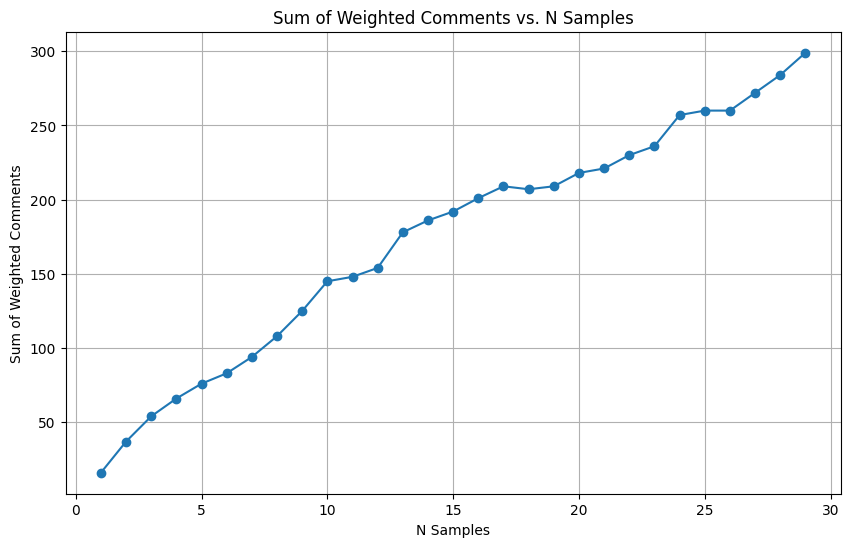

In [ ]:
plt.plot(results_df2['n_samples'], results_df2['sum_weighted_comments'], marker='o')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df2['n_samples'], results_df2['density'], marker='o')
plt.title('Sum of Weighted Comments vs. N Samples')
plt.xlabel('N Samples')
plt.ylabel('Sum of Weighted Comments')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming grouped_dfS is your DataFrame containing articles with a 'textlen' column

# Prepare to collect results
results = []

# Number of Monte Carlo simulations for each n_samples value
n_simulations = 200

# Iterate over each value of n_samples from 1 to 29
for n_samples in range(1, 30):
    density_results = []  # List to store density results for each simulation

    # Perform n_simulations for each n_samples
    for _ in range(n_simulations):
        # Randomly select n_samples articles
        selected_articles = grouped_dfS.sample(n=n_samples)

        import ast
        try:
            selected_articles['comment_indices'] = selected_articles['comment_indices'].apply(ast.literal_eval)
        except:
            pass
        all_indices = [index for sublist in selected_articles['comment_indices'] for index in sublist]
        comment_counts = pd.Series(all_indices).value_counts().sort_index()

        weighted_comment_sums = []
        for indices in selected_articles['comment_indices']:
            weighted_sum = sum(1 / comment_counts[index] for index in indices)
            weighted_comment_sums.append(weighted_sum)

        total_weighted_sum = sum(weighted_comment_sums)

        # Calculate total text length for the selected articles
        total_text_length = selected_articles['textlen'].sum()

        # Calculate density for this simulation
        if total_text_length > 0:  # Avoid division by zero
            density = total_weighted_sum / total_text_length
        else:
            density = 0
        density_results.append(density)

    # Calculate 95% and 99% CI for the density results
    ci_95_lower = np.percentile(density_results, 2.5)
    ci_95_upper = np.percentile(density_results, 97.5)
    ci_99_lower = np.percentile(density_results, 0.5)
    ci_99_upper = np.percentile(density_results, 99.5)

    # Collect results, including CI bounds
    results.append({
        'n_samples': n_samples,
        'avg_density': np.mean(density_results),
        '95_ci_lower': ci_95_lower,
        '95_ci_upper': ci_95_upper,
        '99_ci_lower': ci_99_lower,
        '99_ci_upper': ci_99_upper
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting both curves with 95% and 99% CI for Monte Carlo results
plt.figure(figsize=(12, 8))

# Monte Carlo random selection curve
plt.plot(results_df['n_samples'], results_df['avg_density'], marker='o', label='Random Selection (Monte Carlo)')
# Filling between the 95% CI lower and upper bounds for Monte Carlo results
plt.fill_between(results_df['n_samples'], results_df['95_ci_lower'], results_df['95_ci_upper'], alpha=0.2, label='95% CI (Monte Carlo)')
# Filling between the 99% CI lower and upper bounds for Monte Carlo results, with a different color or lower alpha
plt.fill_between(results_df['n_samples'], results_df['99_ci_lower'], results_df['99_ci_upper'], alpha=0.1, color='red', label='99% CI (Monte Carlo)')

plt.title('Comparison of Density of Weighted Comments with 95% and 99% Confidence Intervals')
plt.xlabel('N Samples')
plt.ylabel('Density of Weighted Comments')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
result_df

In [ ]:
import matplotlib.pyplot as plt

# Assuming results_df is the DataFrame from the Monte Carlo approach with 95% CI columns
# and results_df2 is the DataFrame with optimized results.

# Plotting both curves with 95% CI for Monte Carlo results
plt.figure(figsize=(12, 8))

# Monte Carlo random selection curve with 95% CI
plt.plot(results_df['n_samples'], results_df['avg_density'], marker='o', label='Random Selection')
# Filling between the CI lower and upper bounds for Monte Carlo results
plt.fill_between(results_df['n_samples'], results_df['95_ci_lower'], results_df['95_ci_upper'], alpha=0.2, label='95% CI')
# Filling between the 99% CI lower and upper bounds for Monte Carlo results, with a different color or lower alpha
plt.fill_between(results_df['n_samples'], results_df['99_ci_lower'], results_df['99_ci_upper'], alpha=0.1, color='red', label='99% CI')
# Optimized selection curve
plt.plot(results_df2['n_samples'], results_df2['density'], marker='x', linestyle='--', label='Optimized Selection')

plt.title('Code density for subsets of 49 coded articles')
plt.xlabel('Subset size (articles)')
plt.ylabel('Density of Codes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
result

# Paper 2 Analysis part 2

In [ ]:
# Step 1: Install necessary libraries
!pip install python-docx pandas

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}

    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0}
                    current_article['comment_count'] += len([c for c in child.iter() if c.tag.endswith('commentRangeStart')])

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# Example usage

file_path = '/content/drive/MyDrive/ROUND 2 - SHARON.docx'
comments_count_per_article = parse_docx_comments(file_path)
articles_data = parse_docx_comments(file_path)

# Convert the list of dictionaries to a pandas DataFrame
df_articles = pd.DataFrame(articles_data)

# Display the DataFrame
print(df_articles)


# add thematic counts 2

In [ ]:
###round 1
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:  # Handle case where comments.xml does not exist (no comments)
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0, 'comment_texts': []}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0, 'comment_texts': []}
                    for c in child.iter():
                        if c.tag.endswith('commentRangeStart'):
                            comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                            if comment_id in comments:
                                current_article['comment_texts'].append(comments[comment_id])
                                current_article['comment_count'] += 1

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# List of docx files to process
docx_files = ['ROUND 2 - ZAHRA.docx', 'ROUND 2 - SHARON.docx', 'ROUND 2 - AIMI.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += article['comment_count']
        articles_agg[article['title']]['comment_texts'] += article['comment_texts']

# Convert the aggregated data into a list of dictionaries, then into a DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts'], 'Round': 1} for title, data in articles_agg.items()]
df_articles = pd.DataFrame(articles_list)

# Display the DataFrame
#df_articles

In [ ]:
df_articles

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []
    current_article = None
    current_text = []
    blank_line_found = False
    title_next = False

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)

                    if text.strip() == "":
                        blank_line_found = True
                    elif text.startswith("###") and text.endswith("###") and blank_line_found:
                        if current_article is not None:
                            current_article['content'] = ' '.join(current_text).strip()
                            articles.append(current_article)
                        current_article = {'title': None, 'content': '', 'comments': []}
                        current_text = []
                        title_next = True
                        blank_line_found = False
                    elif title_next:
                        current_article['title'] = text.strip()
                        title_next = False
                    else:
                        if text.startswith("###") and text.endswith("###"):
                            text = text.strip("#").strip()
                        current_text.append(text)
                        for c in child.iter():
                            if c.tag.endswith('commentRangeStart'):
                                comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                                if comment_id in comments:
                                    current_article['comments'].append(comments[comment_id])

            if current_article is not None:
                current_article['content'] = ' '.join(current_text).strip()
                articles.append(current_article)

    return articles

# Assuming df_articles is already an existing DataFrame
# df_articles = pd.DataFrame(...)  # Your existing DataFrame initialization

# List of docx files to process
docx_files = ['Second Round Articles - Zahra.docx', 'Second Round Articles - Sharon.docx', 'Second Round Articles - Aimi.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += len(article['comments'])
        articles_agg[article['title']]['comment_texts'] += article['comments']

# Convert the aggregated data into a list of dictionaries, then append to existing DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts'], 'Round': 2} for title, data in articles_agg.items()]
df_new_articles = pd.DataFrame(articles_list)
df_articles = pd.concat([df_articles, df_new_articles], ignore_index=True)

# Display the updated DataFrame
print(df_articles)


In [ ]:
df_articles

In [ ]:
import re
# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in df_articles['comment_texts']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1
themes1=pd.read_csv('/content/drive/MyDrive/finalthemes.csv')
themes1['THEMES'] = themes1['THEMES'].fillna(method='ffill')
theme_changes = themes1['THEMES'] != themes1['THEMES'].shift(1)
def clean_string(s):
    # Remove all non-alphanumeric characters (except spaces)
    cleaned = re.sub(r"[^\w\s]", '', s)
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Normalize spaces by removing extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned
# Convert the boolean series to integers (0 or 1) and compute the cumulative sum to create a theme index
themes1['themeindex'] = theme_changes.cumsum()
cleaned_comment_index_mapping = {clean_string(key): value for key, value in comment_index_mapping.items()}
cleaned_comment_index_mapping ['former prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country'] = cleaned_comment_index_mapping .pop('prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country')

# Preprocess the 'CODES' column in the themes DataFrame (assuming 'CODES' contains the thematic descriptions to match)
# If 'CODES' is actually meant to be matched with another column that contains descriptions, replace 'CODES' with the correct column name
themes1['processed_CODES'] = themes1['CODES'].apply(clean_string)

# Map the cleaned 'CODES' column to the indices using the cleaned dictionary
themes1['code_index'] = themes1['processed_CODES'].map(cleaned_comment_index_mapping)



In [ ]:
themes1

In [ ]:
import re
import pandas as pd

# Read the CSV file with the correct encoding
try:
    themes = pd.read_csv('/content/drive/MyDrive/codelist.csv', encoding='ISO-8859-1')  # Specify the correct encoding
except UnicodeDecodeError as e:
    print(f"Error reading the CSV file: {e}")
    # Handle the error or re-raise it
    raise

# Drop rows with all blank values
themes.dropna(how='all', inplace=True)

# Fill missing 'Themes' values with the previous non-missing value
themes['THEMES'] = themes['Themes'].fillna(method='ffill')

# Identify theme changes
theme_changes = themes['THEMES'] != themes['THEMES'].shift(1)

# Clean a string by removing non-alphanumeric characters, converting to lowercase, and normalizing spaces
def clean_string(s):
    cleaned = re.sub(r"[^\w\s]", '', s)
    cleaned = cleaned.lower()
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# Compute the cumulative sum of theme changes to create a theme index
themes['themeindex'] = theme_changes.cumsum()

# Report types of values in the 'Codes' column to diagnose issues
print("Diagnosing 'Codes' column values:")
for index, value in themes['Codes'].items():
    if not isinstance(value, str):
        print(f"Non-string value found at index {index}: {value} (type: {type(value)})")

# Convert non-string values in 'Codes' to strings
themes['Codes'] = themes['Codes'].astype(str)

# Preprocess the 'Codes' column in the themes DataFrame
themes['processed_CODES'] = themes['Codes'].apply(clean_string)

# Create a simple index for each unique processed_CODE
processed_code_index_mapping = {code: idx for idx, code in enumerate(themes['processed_CODES'].unique())}

# Map the processed_CODES column to the indices using the new dictionary
themes['code_index'] = themes['processed_CODES'].map(processed_code_index_mapping)

# Additional reporting to verify the results
print("Processed Codes and Indices:")
print(themes[['Codes', 'processed_CODES', 'code_index']].head())

# Generate the crosswalk comment_index_mapping
comment_index_mapping = {}
for idx, row in themes.iterrows():
    processed_code = row['processed_CODES']
    code_index = row['code_index']
    comment_index_mapping[processed_code] = code_index

# Output the final comment_index_mapping
print("Final comment_index_mapping:")
print(comment_index_mapping)
# Preprocess the 'Codes' column in the themes DataFrame
themes['processed_CODES'] = themes['Codes'].apply(clean_string)

# Create a simple index for each unique processed_CODE
processed_code_index_mapping = {code: idx for idx, code in enumerate(themes['processed_CODES'].unique())}

# Map the processed_CODES column to the indices using the new dictionary
themes['code_index'] = themes['processed_CODES'].map(processed_code_index_mapping)

# Additional reporting to verify the results
print("Processed Codes and Indices:")
print(themes[['Codes', 'processed_CODES', 'code_index']].head())

# Generate the crosswalk comment_index_mapping
comment_index_mapping = {}
for idx, row in themes.iterrows():
    processed_code = row['processed_CODES']
    code_index = row['code_index']
    comment_index_mapping[processed_code] = code_index

# Output the final comment_index_mapping
print("Final comment_index_mapping:")
print(comment_index_mapping)
###revised of above

In [ ]:
comment_index_mapping

In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

df_articles['cleaned_comment_texts'] = df_articles['comment_texts'].apply(lambda texts: [clean_string(text) for text in texts])

df_articles['comment_indices'] = df_articles['cleaned_comment_texts'].apply(lambda texts: [comment_index_mapping.get(text, -1) for text in texts])


# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in df_articles['comment_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['comment_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sum'] = weighted_comment_sums



In [ ]:
code_to_theme_mapping = themes.assign(code_index=themes['code_index'].astype(float).astype(int)).set_index('code_index')['themeindex'].to_dict()


# Step 2: Map comment_indices to theme_indices using the created mapping
df_articles['theme_indices'] = df_articles['comment_indices'].apply(lambda indices: [code_to_theme_mapping.get(index) for index in indices])

In [ ]:
all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])


In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/fullcodes.csv')


In [ ]:
!pip install pacmap
!pip install hdbscan

In [ ]:
merged_df['embeddings3'] = merged_df['embeddings3'].apply(eval)

# Convert these lists to a numpy array for processing with pacmap
embeddings_array = np.array(merged_df['embeddings3'].tolist())




In [ ]:
# Step 3: Apply pacmap to obtain a 2D embedding
# Initialize PaCMAP instance and fit-transform the data to get 2D embeddings
import pacmap
import hdbscan

pacmap_instance = pacmap.PaCMAP(n_components=6)
embeddings_2d = pacmap_instance.fit_transform(embeddings_array)

# Step 4: Apply hdbscan on the pacmap embeddings to perform clustering
# Initialize HDBSCAN, fit it on the 2D embeddings, and obtain cluster labels
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=1, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embeddings_2d)

In [ ]:
merged_df

In [ ]:
merged_df['cluster3'] = cluster_labels

In [ ]:
grouped_df = merged_df.groupby('fulltext').agg({
   # 'cluster4': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'cluster3': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'codingd': lambda x: list(x.unique()),   # Get unique values for 'codingd'
    'title': 'first'                         # Keep the first title for each group
}).reset_index()

# Add a new column 'textlen' to store the character length of the 'fulltext' strings
grouped_df['textlen'] = grouped_df['fulltext'].apply(len)

# Filter rows where the length of 'fulltext' is greater than 1200 characters
grouped_df = grouped_df.loc[grouped_df['textlen'] > 1200]


In [ ]:
all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])

In [ ]:
corpus=pd.read_csv('/content/drive/MyDrive/AIcorpus2.csv')

# Merge the 'select2' column from corpus to df_articles based on 'title'
df_articles = df_articles.merge(corpus[['title', 'select2']], on='title', how='left')

In [ ]:
result_df = pd.merge(df_articles, grouped_df[['title', 'fulltext', 'cluster3', 'codingd','textlen']], on='title', how='left')
result_df = result_df.sort_values(by=['title', 'textlen'], ascending=[True, False])
result_df = result_df.drop_duplicates(subset='title', keep='first')



In [ ]:
result_df

In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in result_df['codingd']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1

result_df['AIcode_indices'] = result_df['codingd'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in result_df['AIcode_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['AIcode_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['AIcodesum'] = weighted_comment_sums

In [ ]:

all_indices = [index for sublist in result_df['cluster3'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['cluster3']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['ThemesumAI'] = weighted_comment_sums
result_df['AIcodedensity']=result_df['AIcodesum']/result_df['textlen']*1000
result_df['AIthemedensity']=result_df['ThemesumAI']/result_df['textlen']*1000
result_df['codedensity']=result_df['weighted_comment_sum']/result_df['textlen']*1000
result_df['themedensity']=result_df['weighted_theme_sum']/result_df['textlen']*10000

In [ ]:
result_df['themecodes']=(result_df['weighted_comment_sum']*result_df['weighted_theme_sum'])**0.5
result_df['AIthemecodes']=(result_df['AIcodesum']*result_df['ThemesumAI'])**0.33

In [ ]:
result_df[['AIcodesum', 'ThemesumAI', 'weighted_theme_sum', 'weighted_comment_sum','AIthemecodes','themecodes']].corr()**2

In [ ]:
result_df.to_csv('/content/drive/MyDrive/AIcorpus2results.csv', index=False)

In [ ]:
result_df=pd.read_csv('/content/drive/MyDrive/AIcorpus2results.csv')

In [ ]:
	AIcodesum	ThemesumAI	weighted_theme_sum	weighted_comment_sum	AIthemecodes	themecodes
AIcodesum	1.000000	0.713444	0.282207	0.705462	0.916821	0.465143
ThemesumAI	0.713444	1.000000	0.122995	0.409267	0.768128	0.222021
weighted_theme_sum	0.282207	0.122995	1.000000	0.622006	0.390969	0.932037
weighted_comment_sum	0.705462	0.409267	0.622006	1.000000	0.835850	0.838923
AIthemecodes	0.916821	0.768128	0.390969	0.835850	1.000000	0.589395
themecodes	0.465143	0.222021	0.932037	0.838923	0.589395	1.000000

In [ ]:
result_df

In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming 'result_df' has 'textlen' and 'random' columns

# Including the index and its quadratic term, as well as 'weighted_sum', as independent variables

X = result_df[['select2',"index"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = result_df['codedensity']  # Dependent variable

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())  # Prints a summary of the regression results



In [ ]:
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame
# Example: import pandas as pd
# result_df = pd.DataFrame({'AIcodedensity': [1, 2, 3], 'codedensity': [4, 5, 6]})

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['AIcodedensity'], result_df['codedensity'], alpha=0.7, edgecolors='w', s=100)

# Add titles and labels
plt.title('Scatter Plot of AIcodedensity vs Codedensity')
plt.xlabel('AIcodedensity')
plt.ylabel('Codedensity')

# Show grid
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined


# Step 2: Count the number of instances for each unique index2
df_articles['cluster'] = df_articles['cluster'].apply(lambda x: eval(x))

all_indices = [index for sublist in df_articles['cluster'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['cluster']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sumAI'] = weighted_comment_sums

# Display the updated DataFrame
df_articles

In [ ]:
corpus

In [ ]:
result_df

In [ ]:
import matplotlib.pyplot as plt

# Ensure the necessary columns are present in df_articles
required_columns = ['AIcodedensity', 'select2']
for column in required_columns:
    if column not in result_df.columns:
        raise ValueError(f"The '{column}' column is not present in df_articles")

# Scatter plot of unique_comment_rate by select2
plt.figure(figsize=(10, 6))
plt.scatter(result_df['select2'], result_df['AIcodedensity'], alpha=0.5)
plt.title('Scatter Plot of Unique Comment Rate by Select2')
plt.xlabel('Select2')
plt.ylabel('Unique Comment Rate')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Calculate the mean and 95% CI for result_df['comment_per_1000_chars'] where result_df['select2'] = 1
mean_1 = result_df[result_df['select2'] == 1]['comment_per_1000_chars'].mean()
ci_1 = stats.t.interval(0.95, len(result_df[result_df['select2'] == 1]) - 1, loc=mean_1, scale=stats.sem(result_df[result_df['select2'] == 1]['comment_per_1000_chars']))

# Calculate the mean and 95% CI for result_df['comment_per_1000_chars'] where result_df['select2'] = 0
mean_0 = result_df[result_df['select2'] == 0]['comment_per_1000_chars'].mean()
ci_0 = stats.t.interval(0.95, len(result_df[result_df['select2'] == 0]) - 1, loc=mean_0, scale=stats.sem(result_df[result_df['select2'] == 0]['comment_per_1000_chars']))

# Print the results
print(f"Mean (select2 = 1): {mean_1:.4f}, 95% CI: {ci_1}")
print(f"Mean (select2 = 0): {mean_0:.4f}, 95% CI: {ci_0}")

In [ ]:
fulllist=pd.read_csv('/content/drive/MyDrive/AIcorpussets1and2full.csv')

In [ ]:
results1=pd.read_csv('/content/drive/MyDrive/codes2vscoders.csv')

In [ ]:
results1

In [ ]:
fulllist['results1'] = fulllist['title'].isin(results1['title']).astype(int)

# Add a column 'result_df' with value 1 if there's a match on the 'title' column between fulllist and result_df
fulllist['result_df'] = fulllist['title'].isin(result_df['title']).astype(int)


In [ ]:
fulllist

In [ ]:
fulllist.loc[:,['title','results1','result_df','select2','random2','random']]

In [ ]:
subset =fulllist[(fulllist['result_df'] == 0) & (fulllist['select2'] == 1)]

In [ ]:
result_df[result_df['select2']==0]

In [ ]:
import pandas as pd

# Assuming results1 is your DataFrame
results1['AIcodedensity'] = (results1['weighted_comment_sumAI'] / results1['textlen']) * 1000



In [ ]:
from scipy import stats
import numpy as np
def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use sample standard deviation
    n = len(data)
    t_value = stats.t.ppf(0.975, df=n-1)  # t critical value for 95% CI

    lower_bound = mean - (t_value * std_dev / np.sqrt(n))
    upper_bound = mean + (t_value * std_dev / np.sqrt(n))

    return (lower_bound, mean, upper_bound)

# Calculate confidence interval for AIcodedensity in results1
confidence_interval(result_df.loc[result_df['select2']==0,'AIcodedensity'])


In [ ]:
from scipy import stats
import numpy as np
def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use sample standard deviation
    n = len(data)
    t_value = stats.t.ppf(0.975, df=n-1)  # t critical value for 95% CI

    lower_bound = mean - (t_value * std_dev / np.sqrt(n))
    upper_bound = mean + (t_value * std_dev / np.sqrt(n))

    return (lower_bound, mean, upper_bound)

# Calculate confidence interval for AIcodedensity in results1
confidence_interval(results1.loc[results1['random']==1,'AIcodedensity'])


In [ ]:
results1

In [ ]:
results1['weighted_sum'].corr(results1['wcsr'])


# add thematic counts both





In [ ]:
###round 1
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:  # Handle case where comments.xml does not exist (no comments)
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            current_article = {'title': None, 'comment_count': 0, 'comment_texts': []}
            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)
                    if text.startswith("TITLE:"):
                        if current_article['title'] is not None:  # Not the first article
                            articles.append(current_article)
                        current_article = {'title': text.replace("TITLE:", "").strip(), 'comment_count': 0, 'comment_texts': []}
                    for c in child.iter():
                        if c.tag.endswith('commentRangeStart'):
                            comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                            if comment_id in comments:
                                current_article['comment_texts'].append(comments[comment_id])
                                current_article['comment_count'] += 1

            # Add the last article if it exists
            if current_article['title'] is not None:
                articles.append(current_article)

    return articles

# List of docx files to process
docx_files = ['ROUND 2 - ZAHRA.docx', 'ROUND 2 - SHARON.docx', 'ROUND 2 - AIMI.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += article['comment_count']
        articles_agg[article['title']]['comment_texts'] += article['comment_texts']

# Convert the aggregated data into a list of dictionaries, then into a DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts'], 'Round': 1} for title, data in articles_agg.items()]
df_articles = pd.DataFrame(articles_list)

# Display the DataFrame
#df_articles

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []
    current_article = None
    current_text = []
    blank_line_found = False
    title_next = False

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)

                    if text.strip() == "":
                        blank_line_found = True
                    elif text.startswith("###") and text.endswith("###") and blank_line_found:
                        if current_article is not None:
                            current_article['content'] = ' '.join(current_text).strip()
                            articles.append(current_article)
                        current_article = {'title': None, 'content': '', 'comments': []}
                        current_text = []
                        title_next = True
                        blank_line_found = False
                    elif title_next:
                        current_article['title'] = text.strip()
                        title_next = False
                    else:
                        if text.startswith("###") and text.endswith("###"):
                            text = text.strip("#").strip()
                        current_text.append(text)
                        for c in child.iter():
                            if c.tag.endswith('commentRangeStart'):
                                comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                                if comment_id in comments:
                                    current_article['comments'].append(comments[comment_id])

            if current_article is not None:
                current_article['content'] = ' '.join(current_text).strip()
                articles.append(current_article)

    return articles

# Assuming df_articles is already an existing DataFrame
# df_articles = pd.DataFrame(...)  # Your existing DataFrame initialization

# List of docx files to process
docx_files = ['Second Round Articles - Zahra.docx', 'Second Round Articles - Sharon.docx', 'Second Round Articles - Aimi.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': []})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += len(article['comments'])
        articles_agg[article['title']]['comment_texts'] += article['comments']

# Convert the aggregated data into a list of dictionaries, then append to existing DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_texts': data['comment_texts'], 'Round': 2} for title, data in articles_agg.items()]
df_new_articles = pd.DataFrame(articles_list)
df_articles = pd.concat([df_articles, df_new_articles], ignore_index=True)

# Display the updated DataFrame
print(df_articles)


In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []
    current_article = None
    current_text = []
    blank_line_found = False
    title_next = False
    char_count = 0  # Track the character count

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    paragraph_start = char_count
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)

                    if text.strip() == "":
                        blank_line_found = True
                    elif text.startswith("###") and text.endswith("###") and blank_line_found:
                        if current_article is not None:
                            current_article['content'] = ' '.join(current_text).strip()
                            current_article['length'] = char_count  # Set length of the article
                            articles.append(current_article)
                        current_article = {'title': None, 'content': '', 'comments': [], 'comment_positions': [], 'length': 0}
                        current_text = []
                        title_next = True
                        blank_line_found = False
                        char_count = 0  # Reset character count for new article
                    elif title_next:
                        current_article['title'] = text.strip()
                        title_next = False
                    else:
                        if text.startswith("###") and text.endswith("###"):
                            text = text.strip("#").strip()
                        current_text.append(text)
                        char_count += len(text)  # Update character count
                        for c in child.iter():
                            if c.tag.endswith('commentRangeStart'):
                                comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                                if comment_id in comments:
                                    paragraph_end = char_count + len(text)  # Calculate end of paragraph
                                    comment_position = (paragraph_start + paragraph_end) / 2  # Mean position
                                    current_article['comments'].append(comments[comment_id])
                                    current_article['comment_positions'].append(comment_position)

            if current_article is not None:
                current_article['content'] = ' '.join(current_text).strip()
                current_article['length'] = char_count  # Set length of the last article
                articles.append(current_article)

    return articles

# List of docx files to process
docx_files = ['Second Round Articles - Zahra.docx', 'Second Round Articles - Sharon.docx', 'Second Round Articles - Aimi.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data
articles_agg = defaultdict(lambda: {'comment_count': 0, 'comment_texts': [], 'comment_positions': [], 'length': 0})

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        articles_agg[article['title']]['comment_count'] += len(article['comments'])
        articles_agg[article['title']]['comment_texts'] += article['comments']
        articles_agg[article['title']]['comment_positions'] += article['comment_positions']
        articles_agg[article['title']]['length'] += article['length']

# Convert the aggregated data into a list of dictionaries, then into a DataFrame
articles_list = [{'title': title, 'comment_count': data['comment_count'], 'comment_positions': data['comment_positions'], 'length': data['length'], 'Round': 2} for title, data in articles_agg.items()]
df_new_articles = pd.DataFrame(articles_list)

# Assuming df_articles is already an existing DataFrame
# df_articles = pd.DataFrame(...)  # Your existing


In [ ]:
df_articles

In [ ]:
import re
# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in df_articles['comment_texts']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1
themes1=pd.read_csv('/content/drive/MyDrive/finalthemes.csv')
themes1['THEMES'] = themes1['THEMES'].fillna(method='ffill')
theme_changes = themes1['THEMES'] != themes1['THEMES'].shift(1)
def clean_string(s):
    # Remove all non-alphanumeric characters (except spaces)
    cleaned = re.sub(r"[^\w\s]", '', s)
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Normalize spaces by removing extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned
# Convert the boolean series to integers (0 or 1) and compute the cumulative sum to create a theme index
themes1['themeindex'] = theme_changes.cumsum()
cleaned_comment_index_mapping = {clean_string(key): value for key, value in comment_index_mapping.items()}
cleaned_comment_index_mapping ['former prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country'] = cleaned_comment_index_mapping .pop('prime minister thinks it is unfair for malaysia to be on the receiving end in the conflict between refugees and their home country')

# Preprocess the 'CODES' column in the themes DataFrame (assuming 'CODES' contains the thematic descriptions to match)
# If 'CODES' is actually meant to be matched with another column that contains descriptions, replace 'CODES' with the correct column name
themes1['processed_CODES'] = themes1['CODES'].apply(clean_string)

# Map the cleaned 'CODES' column to the indices using the cleaned dictionary
themes1['code_index'] = themes1['processed_CODES'].map(cleaned_comment_index_mapping)



In [ ]:
themes1

In [ ]:
import re
import pandas as pd

# Read the CSV file with the correct encoding
try:
    themes = pd.read_csv('/content/drive/MyDrive/codelist.csv', encoding='ISO-8859-1')  # Specify the correct encoding
except UnicodeDecodeError as e:
    print(f"Error reading the CSV file: {e}")
    # Handle the error or re-raise it
    raise

# Drop rows with all blank values
themes.dropna(how='all', inplace=True)

# Fill missing 'Themes' values with the previous non-missing value
themes['THEMES'] = themes['Themes'].fillna(method='ffill')

# Identify theme changes
theme_changes = themes['THEMES'] != themes['THEMES'].shift(1)

# Clean a string by removing non-alphanumeric characters, converting to lowercase, and normalizing spaces
def clean_string(s):
    cleaned = re.sub(r"[^\w\s]", '', s)
    cleaned = cleaned.lower()
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# Compute the cumulative sum of theme changes to create a theme index
themes['themeindex'] = theme_changes.cumsum()

# Report types of values in the 'Codes' column to diagnose issues
print("Diagnosing 'Codes' column values:")
for index, value in themes['Codes'].items():
    if not isinstance(value, str):
        print(f"Non-string value found at index {index}: {value} (type: {type(value)})")

# Convert non-string values in 'Codes' to strings
themes['Codes'] = themes['Codes'].astype(str)

# Preprocess the 'Codes' column in the themes DataFrame
themes['processed_CODES'] = themes['Codes'].apply(clean_string)

# Create a simple index for each unique processed_CODE
processed_code_index_mapping = {code: idx for idx, code in enumerate(themes['processed_CODES'].unique())}

# Map the processed_CODES column to the indices using the new dictionary
themes['code_index'] = themes['processed_CODES'].map(processed_code_index_mapping)

# Additional reporting to verify the results
print("Processed Codes and Indices:")
print(themes[['Codes', 'processed_CODES', 'code_index']].head())

# Generate the crosswalk comment_index_mapping
comment_index_mapping = {}
for idx, row in themes.iterrows():
    processed_code = row['processed_CODES']
    code_index = row['code_index']
    comment_index_mapping[processed_code] = code_index

# Output the final comment_index_mapping
print("Final comment_index_mapping:")
print(comment_index_mapping)
# Preprocess the 'Codes' column in the themes DataFrame
themes['processed_CODES'] = themes['Codes'].apply(clean_string)

# Create a simple index for each unique processed_CODE
processed_code_index_mapping = {code: idx for idx, code in enumerate(themes['processed_CODES'].unique())}

# Map the processed_CODES column to the indices using the new dictionary
themes['code_index'] = themes['processed_CODES'].map(processed_code_index_mapping)

# Additional reporting to verify the results
print("Processed Codes and Indices:")
print(themes[['Codes', 'processed_CODES', 'code_index']].head())

# Generate the crosswalk comment_index_mapping
comment_index_mapping = {}
for idx, row in themes.iterrows():
    processed_code = row['processed_CODES']
    code_index = row['code_index']
    comment_index_mapping[processed_code] = code_index

# Output the final comment_index_mapping
print("Final comment_index_mapping:")
print(comment_index_mapping)
###revised of above

In [ ]:
combined_codes = pd.concat([themes['processed_CODES'], themes1['processed_CODES']]).drop_duplicates().reset_index(drop=True)

# 2. Create an index for the codes
combined_codes_index = combined_codes.reset_index().rename(columns={'index': 'code_index'})

# 3. Create a dictionary based on this index
comment_index_mapping = pd.Series(combined_codes_index.code_index.values, index=combined_codes_index.processed_CODES).to_dict()


In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

df_articles['cleaned_comment_texts'] = df_articles['comment_texts'].apply(lambda texts: [clean_string(text) for text in texts])

df_articles['comment_indices'] = df_articles['cleaned_comment_texts'].apply(lambda texts: [comment_index_mapping.get(text, -1) for text in texts])


# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in df_articles['comment_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['comment_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sum'] = weighted_comment_sums



In [ ]:
code_to_theme_mapping = themes.assign(code_index=themes['code_index'].astype(float).astype(int)).set_index('code_index')['themeindex'].to_dict()


# Step 2: Map comment_indices to theme_indices using the created mapping
df_articles['theme_indices'] = df_articles['comment_indices'].apply(lambda indices: [code_to_theme_mapping.get(index) for index in indices])

In [ ]:
all_theme_indices = [index for sublist in df_articles['theme_indices'] for index in sublist if index is not None]  # Ensure None values are excluded
theme_counts = pd.Series(all_theme_indices).value_counts().sort_index()

# Step 3 for themes: Sum the number of comments for each article, weighted by 1/n, using theme indices
weighted_theme_sums = []
for theme_indices in df_articles['theme_indices']:
    # Exclude None values to ensure only valid mappings are considered for the weighted sum
    valid_theme_indices = [index for index in theme_indices if index is not None]
    weighted_sum = sum(1 / theme_counts[index] for index in valid_theme_indices)
    weighted_theme_sums.append(weighted_sum)

# Add the weighted theme sums to the DataFrame
df_articles['weighted_theme_sum'] = weighted_theme_sums
df_articles['theme_indices'] = df_articles['theme_indices'].apply(lambda indices: [0 if index is None else index for index in indices])


In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/fullcodes.csv')


In [ ]:
!pip install pacmap
!pip install hdbscan

In [ ]:
merged_df['embeddings3'] = merged_df['embeddings3'].apply(eval)

# Convert these lists to a numpy array for processing with pacmap
embeddings_array = np.array(merged_df['embeddings3'].tolist())




In [ ]:
# Step 3: Apply pacmap to obtain a 2D embedding
# Initialize PaCMAP instance and fit-transform the data to get 2D embeddings
import pacmap
import hdbscan

pacmap_instance = pacmap.PaCMAP(n_components=6)
embeddings_2d = pacmap_instance.fit_transform(embeddings_array)

# Step 4: Apply hdbscan on the pacmap embeddings to perform clustering
# Initialize HDBSCAN, fit it on the 2D embeddings, and obtain cluster labels
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,min_samples=20, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embeddings_2d)

In [ ]:
# Count unique values
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Print unique values and their counts
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count}')

In [ ]:
merged_df['cluster3'] = cluster_labels

In [ ]:
grouped_df = merged_df.groupby('fulltext').agg({
   # 'cluster4': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'cluster3': lambda x: list(x.unique()),  # Get unique values for 'cluster3'
    'codingd': lambda x: list(x.unique()),   # Get unique values for 'codingd'
    'title': 'first'                         # Keep the first title for each group
}).reset_index()

# Add a new column 'textlen' to store the character length of the 'fulltext' strings
grouped_df['textlen'] = grouped_df['fulltext'].apply(len)

# Filter rows where the length of 'fulltext' is greater than 1200 characters
grouped_df = grouped_df.loc[grouped_df['textlen'] > 1200]


In [ ]:
grouped_df

In [ ]:
result_df = pd.merge(df_articles, grouped_df[['title', 'fulltext', 'cluster3', 'codingd','textlen']], on='title', how='left')
result_df = result_df.drop_duplicates(subset=['title'])



In [ ]:
import pandas as pd

# Assuming df_articles is your DataFrame from the previous steps
# and it includes a 'comment_texts' column with lists of comment texts for each article

# Step 1: Create an index mapping for comments
comment_index_mapping = {}
index_counter = 0
for comment_texts in result_df['codingd']:
    for text in comment_texts:
        if text not in comment_index_mapping:
            comment_index_mapping[text] = index_counter
            index_counter += 1

result_df['AIcode_indices'] = result_df['codingd'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

# Step 2: Count the number of instances for each unique index2
all_indices = [index for sublist in result_df['AIcode_indices'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['AIcode_indices']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['AIcodesum'] = weighted_comment_sums

In [ ]:

all_indices = [index for sublist in result_df['cluster3'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in result_df['cluster3']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
result_df['AIcodedensity']=result_df['AIcodesum']/result_df['textlen']*1000
result_df['codedensity']=result_df['weighted_comment_sum']/result_df['textlen']*1000

In [ ]:
result_df[['AIcodesum',  'weighted_comment_sum']].corr()**2

In [ ]:
fulllist=pd.read_csv('/content/drive/MyDrive/AIcorpussets1and2full.csv')

In [ ]:
result_df=result_df.merge(fulllist[['title', 'random2', 'select2', 'random']], on='title', how='left')


In [ ]:
result_df

In [ ]:
result_df['rand']=result_df['random2']+result_df['random']

In [ ]:
result_df2[(result_df2['Round'] == 1) & (result_df2['select2'] == 1)]

In [ ]:
result_df.to_csv('/content/drive/MyDrive/AIcorpusallresults.csv', index=False)

In [ ]:
result_df=pd.read_csv('/content/drive/MyDrive/AIcorpusallresults.csv')
result_df2=pd.read_csv('/content/drive/MyDrive/AIcorpus2results.csv')
import ast
# Function to convert string representation of list to actual list
def convert_to_list(string):
    return ast.literal_eval(string)

# Apply the function to the 'comment_indices' column
result_df['comment_indices'] = result_df['comment_indices'].apply(convert_to_list)
result_df2['theme_indices'] = result_df2['theme_indices'].apply(convert_to_list)

In [ ]:
len(result_df[result_df.select2==1])

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
# Filter data for random == 1 and random2 == 1
data_random_1 = result_df[result_df['random'] == 1]['AIcodedensity']
data_random2_1 = result_df[result_df['random2'] == 1]['AIcodedensity']

# Function to calculate mean and 95% CI
def mean_and_ci(data):
    mean = np.mean(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))
    return mean, ci

# Calculate for random == 1
mean_random_1, ci_random_1 = mean_and_ci(data_random_1)

# Calculate for random2 == 1
mean_random2_1, ci_random2_1 = mean_and_ci(data_random2_1)

# Print results
print(f"Mean for random == 1: {mean_random_1}, 95% CI: {ci_random_1}")
print(f"Mean for random2 == 1: {mean_random2_1}, 95% CI: {ci_random2_1}")

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['Round'] > 1)]

# Define the dependent and independent variables
X = filtered_df['select2']
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model1 = sm.OLS(y, X).fit()
# Report the coefficients
print(model1.summary())

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['random2'] > 0) | (result_df['select2'] > 0)]

# Define the dependent and independent variables
X = filtered_df['select2']
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model2 = sm.OLS(y, X).fit()
# Report the coefficients
print(model2.summary())

In [ ]:
result_df.textlen

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['Round'] >1)]

# Define the dependent and independent variables
X = filtered_df[['select2','index','indsq']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model3 = sm.OLS(y, X).fit()
# Report the coefficients
print(model3.summary())

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['rand'] > 0) | (result_df['select2'] > 0)]

# Define the dependent and independent variables
X = filtered_df[['select2','Round']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model4 = sm.OLS(y, X).fit()
# Report the coefficients
print(model4.summary())

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['rand'] > 0) | (result_df['select2'] > 0)]

# Define the dependent and independent variables
X = filtered_df[['select2','Round','index','indsq']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model5 = sm.OLS(y, X).fit()
# Report the coefficients
print(model5.summary())

In [ ]:
###including the 3 overlap articles
import pandas as pd
import statsmodels.api as sm
# Subset the rows where "random2" > 0 or "select2" > 0
filtered_df = result_df[(result_df['Round'] > 1)]

# Define the dependent and independent variables
X = filtered_df['select2']
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Use the inverse of 'textlen' as weights
weights =filtered_df['textlen']

# Run the weighted least squares (WLS) regression
model6 = sm.WLS(y, X, weights=weights).fit()

# Report the coefficients
print(model6.summary())

In [ ]:
!pip install stargazer

In [ ]:
from IPython.core.display import HTML
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
# Create a stargazer object
stargazer = Stargazer([model1, model2, model3, model4, model5, model6])
stargazer.covariate_order(['const', 'select2','Round','index','indsq'])
# Render the table in HTML format
html_output = stargazer.render_html()
# Display the HTML table in Colab
HTML(html_output)

In [ ]:
from statsmodels.iolib.summary2 import summary_col
models = [model1, model2, model3]

info_dict = {
    'Overlap articles': { 'Model 1': 'False', 'Model 2': 'True', 'Model 3': 'False' },
    'Order controls': { 'Model 1': 'False', 'Model 2': 'False', 'Model 3': 'True' }
}
results_table = summary_col(models, stars=True, model_names=['Model 1', 'Model 2', 'Model 3'], info_dict=info_dict)

# Print the summary table
print(results_table)

In [ ]:
###unique values as more text is read, selected vs random
import ast
import matplotlib.pyplot as plt
#result_df['AIcode_indices'] =result_df['AIcode_indices'].apply(ast.literal_eval)
#result_df['comment_indices'] =result_df['comment_indices'].apply(ast.literal_eval)
# Filter data for Round 2 and select2 == 1
round_2_select1_df = result_df[(result_df['Round'] == 2 )& (result_df['select2'] == 1)]
round_2_select1_df['Cumulative_Textlen'] = round_2_select1_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 1
unique_values_select1 = set()
running_tally_select1 = []

for indices in round_2_select1_df['comment_indices']:
    unique_values_select1.update(indices)
    running_tally_select1.append(len(unique_values_select1))

# Add the running tally to the filtered DataFrame for select2 == 1
round_2_select1_df['Running_Tally'] = running_tally_select1
round_2_select1_df.reset_index(inplace=True)

# Filter data for Round 2 and select2 == 0
round_2_select0_df = result_df[(result_df['Round'] == 2 )& (result_df['select2'] == 0)]
round_2_select0_df['Cumulative_Textlen'] = round_2_select0_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 0
unique_values_select0 = set()
running_tally_select0 = []

for indices in round_2_select0_df['comment_indices']:
    unique_values_select0.update(indices)
    running_tally_select0.append(len(unique_values_select0))

# Add the running tally to the filtered DataFrame for select2 == 0
round_2_select0_df['Running_Tally'] = running_tally_select0
round_2_select0_df.reset_index(inplace=True)

# Plot the running tally for both subsets
plt.plot(round_2_select1_df['Cumulative_Textlen'], round_2_select1_df['Running_Tally'], marker='o', label='AI Selected')
plt.plot(round_2_select0_df['Cumulative_Textlen'], round_2_select0_df['Running_Tally'], marker='x', label='Randomly Selected')

plt.xlabel('Cumulative Corpus Length in characters')
plt.ylabel('Cumulative Unique Codes')
plt.title('Cumulative Unique Codes for random and AI-selected documents')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate running tally of unique values
def calculate_running_tally_and_corpus_length(df):
    unique_values = set()
    running_tally = []
    cumulative_textlen = df['textlen'].cumsum().tolist()
    for indices in df['comment_indices']:
        unique_values.update(indices)
        running_tally.append(len(unique_values))
    return running_tally, cumulative_textlen

# Function to perform subsampling and aggregation with adjusted variance
def subsample_and_aggregate(df, subsample_size, n_iterations=2000):
    all_running_tallies = []
    all_cumulative_lengths = []
    original_sample_size = len(df)

    for _ in range(n_iterations):
        subsample_df = df.sample(n=subsample_size, replace=False).reset_index(drop=True)
        running_tally, cumulative_length = calculate_running_tally_and_corpus_length(subsample_df)
        all_running_tallies.append(running_tally)
        all_cumulative_lengths.append(cumulative_length)

    all_running_tallies = np.array(all_running_tallies)
    all_cumulative_lengths = np.array(all_cumulative_lengths)

    mean_tally = all_running_tallies.mean(axis=0)
    subsample_variance = all_running_tallies.var(axis=0, ddof=1)

    # Adjust variance using finite population correction (FPC) for each step
    adjusted_variance = []
    for i in range(subsample_size):
        fpc = np.sqrt((original_sample_size - (i + 1)) / (original_sample_size - 1))
        adjusted_variance.append(subsample_variance[i] / (fpc ** 2))

    adjusted_variance = np.array(adjusted_variance)
    ci_95_tally = 1.96 * np.sqrt(adjusted_variance)

    mean_length = all_cumulative_lengths.mean(axis=0)
    return mean_tally, ci_95_tally, mean_length

# Filter data for Round 2
round_2_df = result_df[result_df['Round'] == 2]

# Split data into AI-selected and randomly selected
round_2_select1_df = round_2_df[round_2_df['select2'] == 1]
round_2_select0_df = round_2_df[round_2_df['select2'] == 0]

# Determine subsample size as a proportion of the original sample size
subsample_size_select1 = int(len(round_2_select1_df) * 0.9)  # Example: 90% of the original size
subsample_size_select0 = int(len(round_2_select0_df) * 0.9)

# Perform subsampling and aggregation
mean_tally_select1, ci_95_tally_select1, mean_length_select1 = subsample_and_aggregate(round_2_select1_df, subsample_size_select1)
mean_tally_select0, ci_95_tally_select0, mean_length_select0 = subsample_and_aggregate(round_2_select0_df, subsample_size_select0)

# Plot the results
plt.plot(mean_length_select1, mean_tally_select1, marker='o', label='AI Selected')
plt.fill_between(mean_length_select1, mean_tally_select1 - ci_95_tally_select1, mean_tally_select1 + ci_95_tally_select1, alpha=0.2)

plt.plot(mean_length_select0, mean_tally_select0, marker='x', label='Randomly Selected')
plt.fill_between(mean_length_select0, mean_tally_select0 - ci_95_tally_select0, mean_tally_select0 + ci_95_tally_select0, alpha=0.2)

plt.xlabel('Mean Cumulative Corpus Length in characters')
plt.ylabel('Mean Cumulative Unique Codes')
plt.title('Cumulative Unique Codes for random and AI-selected documents with 95% CIs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import ast
from collections import Counter

# Assuming result_df is already defined and contains the required data
# Convert 'comment_indices' to lists if needed


# Filter data for select2 == 1 and random2 == 1
select2_df = result_df[result_df['select2'] == 1]
random2_df = result_df[result_df['random2'] == 1]

# Flatten the list of all indices for select2 == 1 and random2 == 1 to count frequency
select2_all_indices = [index for indices in select2_df['comment_indices'] for index in indices]
random2_all_indices = [index for indices in random2_df['comment_indices'] for index in indices]

# Count frequency of indices
select2_index_counts = Counter(select2_all_indices)
random2_index_counts = Counter(random2_all_indices)

# Identify high-frequency codes (3 or more instances)
select2_high_frequency_codes = {index for index, count in select2_index_counts.items() if count >= 3}
random2_high_frequency_codes = {index for index, count in random2_index_counts.items() if count >= 3}

# Function to filter only high-frequency indices
def filter_high_frequency_indices(indices, high_freq_codes):
    return [index for index in indices if index in high_freq_codes]

# Create the new columns with high-frequency comment indices
result_df['hf_comment_indices_AI'] = result_df['comment_indices'].apply(lambda indices: filter_high_frequency_indices(indices, select2_high_frequency_codes))
result_df['hf_comment_indices_r'] = result_df['comment_indices'].apply(lambda indices: filter_high_frequency_indices(indices, random2_high_frequency_codes))

# Display the dataframe with the new columns
print(result_df[['comment_indices', 'hf_comment_indices_AI', 'hf_comment_indices_r']])


In [ ]:
###unique values as more text is read, selected vs random
import ast
import matplotlib.pyplot as plt
#result_df['AIcode_indices'] =result_df['AIcode_indices'].apply(ast.literal_eval)
#result_df['comment_indices'] =result_df['comment_indices'].apply(ast.literal_eval)
# Filter data for Round 2 and select2 == 1
round_2_select1_df = result_df[(result_df['Round'] == 2 )& (result_df['select2'] == 1)]
round_2_select1_df['Cumulative_Textlen'] = round_2_select1_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 1
unique_values_select1 = set()
running_tally_select1 = []

for indices in round_2_select1_df['hf_comment_indices_AI']:
    unique_values_select1.update(indices)
    running_tally_select1.append(len(unique_values_select1))

# Add the running tally to the filtered DataFrame for select2 == 1
round_2_select1_df['Running_Tally'] = running_tally_select1
round_2_select1_df.reset_index(inplace=True)

# Filter data for Round 2 and select2 == 0
round_2_select0_df = result_df[(result_df['Round'] == 2 )& (result_df['select2'] == 0)]
round_2_select0_df['Cumulative_Textlen'] = round_2_select0_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 0
unique_values_select0 = set()
running_tally_select0 = []

for indices in round_2_select0_df['hf_comment_indices_r']:
    unique_values_select0.update(indices)
    running_tally_select0.append(len(unique_values_select0))

# Add the running tally to the filtered DataFrame for select2 == 0
round_2_select0_df['Running_Tally'] = running_tally_select0
round_2_select0_df.reset_index(inplace=True)

# Plot the running tally for both subsets
plt.plot(round_2_select1_df['Cumulative_Textlen'], round_2_select1_df['Running_Tally'], marker='o', label='AI Selected')
plt.plot(round_2_select0_df['Cumulative_Textlen'], round_2_select0_df['Running_Tally'], marker='x', label='Randomly Selected')

plt.xlabel('Cumulative Corpus Length in characters')
plt.ylabel('Cumulative Unique High Frequency Codes')
plt.title('Cumulative Codes for Random and AI-selected Documents')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate running tally of unique values
def calculate_running_tally_and_corpus_length(df, column):
    unique_values = set()
    running_tally = []
    cumulative_textlen = df['textlen'].cumsum().tolist()
    for indices in df[column]:
        unique_values.update(indices)
        running_tally.append(len(unique_values))
    return running_tally, cumulative_textlen

# Function to perform subsampling and aggregation with adjusted variance
def subsample_and_aggregate(df, subsample_size, column, n_iterations=2000):
    all_running_tallies = []
    all_cumulative_lengths = []
    original_sample_size = len(df)

    for _ in range(n_iterations):
        subsample_df = df.sample(n=subsample_size, replace=False).reset_index(drop=True)
        running_tally, cumulative_length = calculate_running_tally_and_corpus_length(subsample_df, column)
        all_running_tallies.append(running_tally)
        all_cumulative_lengths.append(cumulative_length)

    all_running_tallies = np.array(all_running_tallies)
    all_cumulative_lengths = np.array(all_cumulative_lengths)

    mean_tally = all_running_tallies.mean(axis=0)
    subsample_variance = all_running_tallies.var(axis=0, ddof=1)

    # Adjust variance using finite population correction (FPC) for each step
    adjusted_variance = []
    for i in range(subsample_size):
        fpc = np.sqrt((original_sample_size - (i + 1)) / (original_sample_size - 1))
        adjusted_variance.append(subsample_variance[i] / (fpc ** 2))

    adjusted_variance = np.array(adjusted_variance)
    ci_95_tally = 1.96 * np.sqrt(adjusted_variance)

    mean_length = all_cumulative_lengths.mean(axis=0)
    return mean_tally, ci_95_tally, mean_length

# Filter data for Round 2
round_2_df = result_df[result_df['Round'] == 2]

# Split data into AI-selected and randomly selected
round_2_select1_df = round_2_df[round_2_df['select2'] == 1]
round_2_select0_df = round_2_df[round_2_df['select2'] == 0]

# Determine subsample size as a proportion of the original sample size
subsample_size_select1 = int(len(round_2_select1_df) * 0.9)  # Example: 90% of the original size
subsample_size_select0 = int(len(round_2_select0_df) * 0.9)

# Perform subsampling and aggregation
mean_tally_select1, ci_95_tally_select1, mean_length_select1 = subsample_and_aggregate(round_2_select1_df, subsample_size_select1, 'hf_comment_indices_AI')
mean_tally_select0, ci_95_tally_select0, mean_length_select0 = subsample_and_aggregate(round_2_select0_df, subsample_size_select0, 'hf_comment_indices_r')

# Plot the results
plt.plot(mean_length_select1, mean_tally_select1, marker='o', label='AI Selected')
plt.fill_between(mean_length_select1, mean_tally_select1 - ci_95_tally_select1, mean_tally_select1 + ci_95_tally_select1, alpha=0.2)

plt.plot(mean_length_select0, mean_tally_select0, marker='x', label='Randomly Selected')
plt.fill_between(mean_length_select0, mean_tally_select0 - ci_95_tally_select0, mean_tally_select0 + ci_95_tally_select0, alpha=0.2)

plt.xlabel('Mean Cumulative Corpus Length in characters')
plt.ylabel('Mean Cumulative Unique High Frequency Codes')
plt.title('Cumulative Codes for random and AI-selected documents with 95% CIs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Revised function: now uses the full set from "comment_indices"
def calculate_running_tally_and_corpus_length(df, code_column):
    """
    Iteratively computes the cumulative count of unique codes (from the full set)
    that have been encountered at least 3 times based solely on the documents observed so far.
    It also computes the cumulative sum of the document lengths (from the 'textlen' column).

    Parameters:
      - df: DataFrame containing the data.
      - code_column: Column name where each entry is a list of codes.

    Returns:
      - running_tally: List where each element is the cumulative count of codes (with 3+ occurrences)
                       based on documents processed up to that point.
      - cumulative_textlen: List of cumulative text lengths up to each step.
    """
    running_counter = Counter()
    running_tally = []          # Cumulative count of codes (with frequency >= 3)
    cumulative_textlen = []     # Cumulative text length
    current_length = 0

    # Process each document sequentially
    for codes, textlen in zip(df[code_column], df['textlen']):
        running_counter.update(codes)   # Update counter with codes from the current document
        current_length += textlen         # Add current document's text length
        # Count how many unique codes have now been seen at least 3 times
        hf_count = sum(1 for count in running_counter.values() if count >= 3)
        running_tally.append(hf_count)
        cumulative_textlen.append(current_length)

    return running_tally, cumulative_textlen

# Function to perform subsampling and aggregation using the iterative approach
def subsample_and_aggregate(df, subsample_size, code_column, n_iterations=2000):
    """
    Performs repeated subsampling (without replacement) from the DataFrame, computes the iterative
    running tally and cumulative corpus length for each subsample, and then aggregates the results.
    Adjusts variance with a finite population correction.

    Parameters:
      - df: DataFrame containing the data.
      - subsample_size: Number of documents to include in each subsample.
      - code_column: Column name where each entry is a list of codes.
      - n_iterations: Number of subsamples to take.

    Returns:
      - mean_tally: Mean running tally (averaged over iterations).
      - ci_95_tally: 95% confidence interval for the running tally.
      - mean_length: Mean cumulative text length.
    """
    all_running_tallies = []
    all_cumulative_lengths = []
    original_sample_size = len(df)

    for _ in range(n_iterations):
        subsample_df = df.sample(n=subsample_size, replace=False).reset_index(drop=True)
        running_tally, cumulative_length = calculate_running_tally_and_corpus_length(subsample_df, code_column)
        all_running_tallies.append(running_tally)
        all_cumulative_lengths.append(cumulative_length)

    all_running_tallies = np.array(all_running_tallies)
    all_cumulative_lengths = np.array(all_cumulative_lengths)

    mean_tally = all_running_tallies.mean(axis=0)
    subsample_variance = all_running_tallies.var(axis=0, ddof=1)

    # Adjust variance using finite population correction (FPC) for each step
    adjusted_variance = []
    for i in range(subsample_size):
        fpc = np.sqrt((original_sample_size - (i + 1)) / (original_sample_size - 1))
        adjusted_variance.append(subsample_variance[i] / (fpc ** 2))

    adjusted_variance = np.array(adjusted_variance)
    ci_95_tally = 1.96 * np.sqrt(adjusted_variance)

    mean_length = all_cumulative_lengths.mean(axis=0)
    return mean_tally, ci_95_tally, mean_length

# Assume that result_df contains your data with columns:
#   - 'comment_indices': the full set of codes (as lists)
#   - 'textlen': length in characters for each document
#   - 'select2': indicator (1 for AI-selected, 0 otherwise)
#   - 'Round': identifier for the round
#
# We now filter for Round 2, and further separate into AI-selected and randomly selected groups.
round_2_df = result_df[result_df['Round'] == 2]
round_2_select1_df = round_2_df[round_2_df['select2'] == 1]
round_2_select0_df = round_2_df[round_2_df['select2'] == 0]

# Determine subsample sizes as a proportion (e.g., 90%) of the group sizes
subsample_size_select1 = int(len(round_2_select1_df) * 0.9)
subsample_size_select0 = int(len(round_2_select0_df) * 0.9)

# Use the full 'comment_indices' column (the entire set of codes) for the iterative approach.
mean_tally_select1, ci_95_tally_select1, mean_length_select1 = subsample_and_aggregate(
    round_2_select1_df, subsample_size_select1, 'comment_indices')
mean_tally_select0, ci_95_tally_select0, mean_length_select0 = subsample_and_aggregate(
    round_2_select0_df, subsample_size_select0, 'comment_indices')

# Plot the aggregated iterative running tallies
plt.figure()
plt.plot(mean_length_select1, mean_tally_select1, marker='o', label='AI Selected')
plt.fill_between(mean_length_select1,
                 mean_tally_select1 - ci_95_tally_select1,
                 mean_tally_select1 + ci_95_tally_select1,
                 alpha=0.2)

plt.plot(mean_length_select0, mean_tally_select0, marker='x', label='Randomly Selected')
plt.fill_between(mean_length_select0,
                 mean_tally_select0 - ci_95_tally_select0,
                 mean_tally_select0 + ci_95_tally_select0,
                 alpha=0.2)

plt.xlabel('Mean Cumulative Corpus Length in characters')
plt.ylabel('Mean Cumulative Unique High Frequency Codes')
plt.title('Cumulative High Frequency Codes (Iterative Using Full Set)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def calculate_running_tally_and_corpus_length(df, code_column='comment_indices'):
    """
    Iteratively computes the cumulative count of unique codes that have reached a frequency of 3 or more
    (using only the documents encountered so far), along with the cumulative text length.

    Parameters:
      - df: DataFrame containing the data.
      - code_column: Name of the column that contains the list of codes for each document.

    Returns:
      - running_tally: List of cumulative counts of high-frequency codes at each step.
      - cumulative_textlen: List of cumulative text lengths (e.g., character counts) at each step.
    """
    running_counter = Counter()
    running_tally = []       # List to store cumulative count of codes seen >= 3 times.
    cumulative_textlen = []  # List to store cumulative text length.
    current_length = 0

    for codes, textlen in zip(df[code_column], df['textlen']):
        # Update the counter with the codes from the current document.
        running_counter.update(codes)
        current_length += textlen
        # Count only those codes whose cumulative frequency is at least 3.
        hf_count = sum(1 for count in running_counter.values() if count >= 3)
        running_tally.append(hf_count)
        cumulative_textlen.append(current_length)

    return running_tally, cumulative_textlen

def main():
    # ----- Data Assumption -----
    # We assume that result_df is already defined.
    # For example, you might load it via:
    # result_df = pd.read_csv('path_to_your_data.csv')
    # And that the 'comment_indices' column contains lists (if stored as strings, you may need to convert them).

    # For this script, we assume the DataFrame `result_df` already exists.
    # If testing, you can create a dummy DataFrame here.
    # ---------------------------

    # Filter the DataFrame to the desired round (for example, Round == 2)
    round_2_df = result_df[result_df['Round'] == 2].copy()

    # Split the data into AI-selected (select2 == 1) and randomly selected (select2 == 0)
    ai_selected_df = round_2_df[round_2_df['select2'] == 1].copy()
    random_selected_df = round_2_df[round_2_df['select2'] == 0].copy()

    # Calculate the iterative running tally and cumulative text length for each group.
    ai_running_tally, ai_cum_textlen = calculate_running_tally_and_corpus_length(ai_selected_df, 'comment_indices')
    random_running_tally, random_cum_textlen = calculate_running_tally_and_corpus_length(random_selected_df, 'comment_indices')

    # Plot the resulting cumulative metrics.
    plt.figure(figsize=(10,6))
    plt.plot(ai_cum_textlen, ai_running_tally, marker='o', linestyle='-', label='AI Selected')
    plt.plot(random_cum_textlen, random_running_tally, marker='x', linestyle='-', label='Randomly Selected')
    plt.xlabel('Cumulative Corpus Length (characters)')
    plt.ylabel('Cumulative Unique High-Frequency Codes (≥3 occurrences)')
    plt.title('Cumulative Codes for random and AI-selected documents--Iterative Count')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
result_df2= result_df2.drop(columns=['level_0']).set_index('index').sort_index()

In [ ]:
result_df2

In [ ]:
###unique values as more text is read, selected vs random
import ast
import matplotlib.pyplot as plt
#result_df['AIcode_indices'] =result_df['AIcode_indices'].apply(ast.literal_eval)
#result_df['comment_indices'] =result_df['comment_indices'].apply(ast.literal_eval)
# Filter data for Round 2 and select2 == 1
round_2_select1_df = result_df2[ result_df2['select2'] == 1]
round_2_select1_df['Cumulative_Textlen'] = round_2_select1_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 1
unique_values_select1 = set()
running_tally_select1 = []

for indices in round_2_select1_df['theme_indices']:
    unique_values_select1.update(indices)
    running_tally_select1.append(len(unique_values_select1))

# Add the running tally to the filtered DataFrame for select2 == 1
round_2_select1_df['Running_Tally'] = running_tally_select1
round_2_select1_df.reset_index(inplace=True)

# Filter data for Round 2 and select2 == 0
round_2_select0_df = result_df2[ result_df2['select2'] == 0]
round_2_select0_df['Cumulative_Textlen'] = round_2_select0_df['textlen'].cumsum()

# Calculate the running tally of unique values for select2 == 0
unique_values_select0 = set()
running_tally_select0 = []

for indices in round_2_select0_df['theme_indices']:
    unique_values_select0.update(indices)
    running_tally_select0.append(len(unique_values_select0))

# Add the running tally to the filtered DataFrame for select2 == 0
round_2_select0_df['Running_Tally'] = running_tally_select0
round_2_select0_df.reset_index(inplace=True)

# Plot the running tally for both subsets
plt.plot(round_2_select1_df['Cumulative_Textlen'], round_2_select1_df['Running_Tally'], marker='o', label='AI Selected')
plt.plot(round_2_select0_df['Cumulative_Textlen'], round_2_select0_df['Running_Tally'], marker='x', label='Randomly Selected')

plt.xlabel('Cumulative Corpus Length in characters')
plt.ylabel('Cumulative Themes')
plt.title('Cumulative Themes for random and AI-selected documents')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate running tally of unique values
def calculate_running_tally_and_corpus_length(df):
    unique_values = set()
    running_tally = []
    cumulative_textlen = df['textlen'].cumsum().tolist()
    for indices in df['theme_indices']:
        unique_values.update(indices)
        running_tally.append(len(unique_values))
    return running_tally, cumulative_textlen

# Function to perform subsampling and aggregation with adjusted variance
def subsample_and_aggregate(df, subsample_size, n_iterations=2000):
    all_running_tallies = []
    all_cumulative_lengths = []
    original_sample_size = len(df)

    for _ in range(n_iterations):
        subsample_df = df.sample(n=subsample_size, replace=False).reset_index(drop=True)
        running_tally, cumulative_length = calculate_running_tally_and_corpus_length(subsample_df)
        all_running_tallies.append(running_tally)
        all_cumulative_lengths.append(cumulative_length)

    all_running_tallies = np.array(all_running_tallies)
    all_cumulative_lengths = np.array(all_cumulative_lengths)

    mean_tally = all_running_tallies.mean(axis=0)
    subsample_variance = all_running_tallies.var(axis=0, ddof=1)

    # Adjust variance using finite population correction (FPC) for each step
    adjusted_variance = []
    for i in range(subsample_size):
        fpc = np.sqrt((original_sample_size - (i + 1)) / (original_sample_size - 1))
        adjusted_variance.append(subsample_variance[i] / (fpc ** 2))

    adjusted_variance = np.array(adjusted_variance)
    ci_95_tally = 1.96 * np.sqrt(adjusted_variance)

    mean_length = all_cumulative_lengths.mean(axis=0)
    return mean_tally, ci_95_tally, mean_length

# Filter data for Round 2
round_2_df = result_df2

# Split data into AI-selected and randomly selected
round_2_select1_df = round_2_df[round_2_df['select2'] == 1]
round_2_select0_df = round_2_df[round_2_df['select2'] == 0]

# Determine subsample size as a proportion of the original sample size
subsample_size_select1 = int(len(round_2_select1_df) * 0.9)  # Example: 90% of the original size
subsample_size_select0 = int(len(round_2_select0_df) * 0.9)

# Perform subsampling and aggregation
mean_tally_select1, ci_95_tally_select1, mean_length_select1 = subsample_and_aggregate(round_2_select1_df, subsample_size_select1)
mean_tally_select0, ci_95_tally_select0, mean_length_select0 = subsample_and_aggregate(round_2_select0_df, subsample_size_select0)

# Plot the results
plt.plot(mean_length_select1, mean_tally_select1, marker='o', label='AI Selected')
plt.fill_between(mean_length_select1, mean_tally_select1 - ci_95_tally_select1, mean_tally_select1 + ci_95_tally_select1, alpha=0.2)

plt.plot(mean_length_select0, mean_tally_select0, marker='x', label='Randomly Selected')
plt.fill_between(mean_length_select0, mean_tally_select0 - ci_95_tally_select0, mean_tally_select0 + ci_95_tally_select0, alpha=0.2)

plt.xlabel('Mean Cumulative Corpus Length in characters')
plt.ylabel('Mean Cumulative Unique Themes')
plt.title('Cumulative Themes for random and AI-selected documents with 95% CIs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
result_df=result_df.reset_index()

In [ ]:
result_df['indsq']=result_df['index']**2

In [ ]:
result_df['indxselect']=result_df['index']*result_df['select2']

In [ ]:
result_df['logcdense']=np.log(result_df['codedensity']*10000+1)-np.log(10001)

In [ ]:
result_df

In [ ]:
result_df['AIcodedensity']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming result_df is already defined and loaded

# Filter the DataFrame
filtered_df = result_df[(result_df['rand'] == 1)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['textlen'], filtered_df['codedensity'], alpha=0.5)
plt.title('Scatter Plot of Text Length vs Fecundity')
plt.xlabel('Text Length')
plt.ylabel(' Fecundity')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
filtered_df = result_df[(result_df['rand']==1)]

# Define the independent variables
X = filtered_df[['AIcodedensity','textlen']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model = sm.OLS(y, X).fit()

# Report the coefficients
print(model.summary())

In [ ]:
result_df[result_df['random2'] == 1]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Subset the data
select2_subset = result_df[result_df['select2'] == 1]['textlen']
random2_subset = result_df[result_df['rand'] == 1]['textlen']

# Create overlapping histograms
plt.figure(figsize=(10, 6))

plt.hist(select2_subset, bins=10, alpha=0.5, label='AI-selected')
plt.hist(random2_subset, bins=23, alpha=0.5, label='Randomly-selected')

plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.title('Text Length for AI-selected and Random Documents')
plt.legend(loc='upper right')

plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
filtered_df = result_df[(result_df['rand'] == 1)]

# Define the independent variables
X = filtered_df[['AIcodedensity']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model4 = sm.OLS(y, X).fit()

# Report the coefficients
print(model4.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm
filtered_df = result_df[(result_df['Round']==2)]

# Define the independent variables
X = filtered_df[['select2','index','indsq']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model = sm.OLS(y, X).fit()

# Report the coefficients
print(model.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm
filtered_df = result_df[(result_df['rand'] == 1) | (result_df['select2'] == 1)]

# Define the independent variables
X = filtered_df[['select2', 'Round','index','indsq']]
y = filtered_df['codedensity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Run the linear regression
model = sm.OLS(y, X).fit()

# Report the coefficients
print(model.summary())

In [ ]:
from IPython.core.display import HTML
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
# Create a stargazer object
stargazer = Stargazer([second_stage_model])
stargazer.significant_digits(3)  # Adjust the number to set the number of decimal places

#stargazer.covariate_order(['const', 'select2','Round','index','indsq'])
# Render the table in HTML format
html_output = stargazer.render_html()
# Display the HTML table in Colab
HTML(html_output)

In [ ]:
#Effect of textlen on codedensity independent of AIcodedensity
import statsmodels.api as sm
import pandas as pd
filtered_df = result_df[(result_df['rand'] == 1) | (result_df['select2'] == 1)]
# Assuming you have a DataFrame `filtered_df` with columns 'codedensity', 'textlen', 'AIcodedensity', and 'select2'

# Step 1: Regress textlen on AIcodedensity to get the residuals
X = filtered_df[['AIcodedensity']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = filtered_df['textlen']/1000

first_stage_model = sm.OLS(y, X).fit()
filtered_df['textlen_residuals'] = first_stage_model.resid

# Step 2: Use the residuals in the main regression
X_main = filtered_df[['textlen_residuals', 'select2','index','indsq', 'Round']]
X_main = sm.add_constant(X_main)  # Adds a constant term to the predictor
y_main = filtered_df['codedensity']

second_stage_model = sm.OLS(y_main, X_main).fit()

# Summary of the Second Stage Regression
print(second_stage_model.summary())

In [ ]:
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame
# Example: import pandas as pd
# result_df = pd.DataFrame({'AIcodedensity': [1, 2, 3], 'codedensity': [4, 5, 6]})

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['AIcodedensity'], result_df['codedensity'], alpha=0.7, edgecolors='w', s=100)

# Add titles and labels
plt.title('Scatter Plot of AIcodedensity vs Codedensity')
plt.xlabel('AIcodedensity')
plt.ylabel('Codedensity')

# Show grid
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Assuming df_articles and df_comment_indices are already defined


# Step 2: Count the number of instances for each unique index2
df_articles['cluster'] = df_articles['cluster'].apply(lambda x: eval(x))

all_indices = [index for sublist in df_articles['cluster'] for index in sublist]
comment_counts = pd.Series(all_indices).value_counts().sort_index()

# Step 3: Sum the number of comments for each article, weighted by 1/n, using index2
weighted_comment_sums = []
for indices in df_articles['cluster']:
    weighted_sum = sum(1 / comment_counts[index] for index in indices)
    weighted_comment_sums.append(weighted_sum)

# Add the weighted sums to the DataFrame
df_articles['weighted_comment_sumAI'] = weighted_comment_sums

# Display the updated DataFrame
df_articles

In [ ]:
import matplotlib.pyplot as plt

# Ensure the necessary columns are present in df_articles
required_columns = ['AIcodedensity', 'select2']
for column in required_columns:
    if column not in result_df.columns:
        raise ValueError(f"The '{column}' column is not present in df_articles")

# Scatter plot of unique_comment_rate by select2
plt.figure(figsize=(10, 6))
plt.scatter(result_df['select2'], result_df['AIcodedensity'], alpha=0.5)
plt.title('Scatter Plot of Unique Comment Rate by Select2')
plt.xlabel('Select2')
plt.ylabel('Unique Comment Rate')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Calculate the mean and 95% CI for result_df['comment_per_1000_chars'] where result_df['select2'] = 1
mean_1 = result_df[result_df['select2'] == 1]['comment_per_1000_chars'].mean()
ci_1 = stats.t.interval(0.95, len(result_df[result_df['select2'] == 1]) - 1, loc=mean_1, scale=stats.sem(result_df[result_df['select2'] == 1]['comment_per_1000_chars']))

# Calculate the mean and 95% CI for result_df['comment_per_1000_chars'] where result_df['select2'] = 0
mean_0 = result_df[result_df['select2'] == 0]['comment_per_1000_chars'].mean()
ci_0 = stats.t.interval(0.95, len(result_df[result_df['select2'] == 0]) - 1, loc=mean_0, scale=stats.sem(result_df[result_df['select2'] == 0]['comment_per_1000_chars']))

# Print the results
print(f"Mean (select2 = 1): {mean_1:.4f}, 95% CI: {ci_1}")
print(f"Mean (select2 = 0): {mean_0:.4f}, 95% CI: {ci_0}")

In [ ]:
results1=pd.read_csv('/content/drive/MyDrive/codes2vscoders.csv')

In [ ]:
fulllist['results1'] = fulllist['title'].isin(results1['title']).astype(int)

# Add a column 'result_df' with value 1 if there's a match on the 'title' column between fulllist and result_df
fulllist['result_df'] = fulllist['title'].isin(result_df['title']).astype(int)


In [ ]:
subset =fulllist[(fulllist['result_df'] == 0) & (fulllist['select2'] == 1)]

In [ ]:
import pandas as pd

# Assuming results1 is your DataFrame
results1['AIcodedensity'] = (results1['weighted_comment_sumAI'] / results1['textlen']) * 1000



Superset generation for Figure 13

In [ ]:
from apricot import FeatureBasedSelection
import numpy as np
import pandas as pd

def convert_to_incidence_matrix(grouped_df, cluster_column):
    # Identify all unique clusters across all articles
    unique_clusters = set(cluster for clusters in grouped_df[cluster_column] for cluster in clusters)

    # Create a binary incidence matrix
    incidence_matrix = pd.DataFrame(0, index=grouped_df.index, columns=sorted(unique_clusters))

    # Fill the incidence matrix with 1's where the article has the cluster
    for index, row in grouped_df.iterrows():
        incidence_matrix.loc[index, row[cluster_column]] = 1

    return incidence_matrix

def select_articles(grouped_df, n_values, k):
    all_results = {}

    all_article_lengths = grouped_df['fulltext'].apply(len).values  # Calculate all article lengths once

    for n in n_values:
        results = []

        for _ in range(k):
            # Draw a random sample of n articles without replacement from grouped_df
            sampled_df = grouped_df.sample(n=n, replace=False)

            # Convert to incidence matrix
            incidence_matrix = convert_to_incidence_matrix(sampled_df, 'codingd')

            # Calculate the length of each article
            article_lengths = sampled_df['fulltext'].apply(len).values

            # Normalize the sample costs so that the mean is approximately 1
            normalized_costs = article_lengths / all_article_lengths.mean()

            # Initialize the FeatureBasedSelection object with the 'sqrt' concave function
            selector = FeatureBasedSelection(n_samples=20, concave_func='sqrt', verbose=True)

            # Fit the model on the binary incidence matrix to find the subset that maximizes the submodular function
            # using the normalized costs as a knapsack constraint
            selector.fit(incidence_matrix.values, sample_cost=normalized_costs)

            # Extract the subset using the transform method
            selected_features = selector.transform(incidence_matrix.values)

            # Get the indices of the selected articles
            selected_indices = selector.ranking

            # Use the indices to extract the corresponding rows from the original DataFrame
            selected_articles = sampled_df.iloc[selected_indices]

            # Step 1: Create an index mapping for comments
            comment_index_mapping = {}
            index_counter = 0
            for comment_texts in selected_articles['codingd']:
                for text in comment_texts:
                    if text not in comment_index_mapping:
                        comment_index_mapping[text] = index_counter
                        index_counter += 1

            selected_articles['AIcode_indices'] = selected_articles['codingd'].apply(lambda texts: [comment_index_mapping[text] for text in texts])

            # Step 2: Count the number of instances for each unique index
            all_indices = [index for sublist in selected_articles['AIcode_indices'] for index in sublist]
            comment_counts = pd.Series(all_indices).value_counts().sort_index()

            # Step 3: Sum the number of comments for each article, weighted by 1/n, using index
            weighted_comment_sums = []
            for indices in selected_articles['AIcode_indices']:
                weighted_sum = sum(1 / comment_counts[index] for index in indices)
                weighted_comment_sums.append(weighted_sum)

            # Add the weighted sums to the DataFrame
            selected_articles['AIcodesum'] = weighted_comment_sums
            selected_articles['AIcodedensity'] = selected_articles['AIcodesum'] / selected_articles['textlen'] * 1000

            # Step 2: Calculate the sum of AIcodesum and textlen
            sum_weighted_comment_sum = selected_articles['AIcodesum'].sum()
            sum_textlen = selected_articles['textlen'].sum()

            # Step 3: Divide the sum of AIcodesum by the sum of textlen
            result = sum_weighted_comment_sum / sum_textlen * 1000

            # Store the result for this iteration
            results.append(result)

        # Calculate the mean result over all iterations for the current n
        mean_result = np.mean(results)

        # Store the mean result for the current n
        all_results[n] = mean_result

    # Output the mean results for all n values
    for n, mean_result in all_results.items():
        print(f"Mean Result for n={n}: {mean_result}")

# Parameters
n_values = [50, 100, 250, 500, 1000]  # List of different n values
k = 10  # Number of iterations

# Assuming grouped_df is already defined
select_articles(grouped_df, n_values, k)


In [ ]:
result_df['AIsq']=result_df['AIcodedensity']**2

Figure 13

In [ ]:
result_df.loc[result_df['random2']==1,'AIcodedensity'].mean()

In [ ]:
result_df.loc[result_df['random']==1,'AIcodedensity'].mean()

In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming 'result_df' has 'textlen' and 'random' columns

# Including the index and its quadratic term, as well as 'weighted_sum', as independent variables

X = result_df[['AIcodedensity',"AIsq"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = result_df['codedensity']  # Dependent variable

model = sm.OLS(y, X).fit()  # OLS regression
print(model.summary())  # Prints a summary of the regression results



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given AIcodedensity values and sample sizes
data = [
    (2530, 5.631718406012233),
    (1000, 5.426492850326782),
    (500, 5.1972600604093255),
    (250, 4.9214512232780425),
    (100, 4.316129003704333),
    (50, 3.576394769507362),
    (20, 1.9364524673889225)  # Random sample size set to 20
]

# Regression coefficients
const = -0.0698
AIcodedensity_coeff = 0.6911
AIdens2_coeff = -0.0323

# Function to predict codedensity
def predict_codedensity(AIcodedensity):
    return const + AIcodedensity_coeff * AIcodedensity + AIdens2_coeff * (AIcodedensity ** 2)

# Calculate predicted codedensity values
predicted_codedensity = [predict_codedensity(AIcodedensity) for _, AIcodedensity in data]

# Normalize the predicted codedensity values so that the "Random" value (at sample size 20) is 100%
random_codedensity = predicted_codedensity[-1]
normalized_codedensity = [(value / random_codedensity) * 100 for value in predicted_codedensity]

# Extract sample sizes
sample_sizes = [sample for sample, _ in data]

# Reverse the order of data for plotting
sample_sizes = sample_sizes[::-1]
normalized_codedensity = normalized_codedensity[::-1]

# Plot normalized predicted codedensity against sample size
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, normalized_codedensity, marker='o', label='Normalized Predicted codedensity', color='r')
plt.xscale('log')
plt.xticks([20, 50, 100, 250, 500, 1000, 2530], ['20 (Random)', '50', '100', '250', '500', '1000', '2530'])
plt.xlabel('Sample Size')
plt.ylabel('Normalized codedensity (%)')
plt.title('Normalized Estimated Fecundity vs Sample Size (Log Scale)')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


# Comment Locations

Figure 2 and Table 1

In [ ]:
import pandas as pd
import zipfile
import xml.etree.ElementTree as ET
from collections import defaultdict

def parse_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = {}
    with zipfile.ZipFile(file_path, 'r') as docx:
        try:
            with docx.open('word/comments.xml') as comments_xml:
                tree = ET.parse(comments_xml)
                root = tree.getroot()
                for comment in root.findall('.//w:comment', ns):
                    comment_id = comment.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                    comment_text = ''.join(node.text for node in comment.iter() if node.tag.endswith('}t') and node.text)
                    comments[comment_id] = comment_text
        except KeyError:
            pass
    return comments

def parse_docx_comments(file_path):
    ns = {'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'}
    comments = parse_comments(file_path)
    articles = []
    current_article = None
    current_text = []
    blank_line_found = False
    title_next = False
    char_count = 0

    with zipfile.ZipFile(file_path, 'r') as docx:
        with docx.open('word/document.xml') as document_xml:
            tree = ET.parse(document_xml)
            root = tree.getroot()

            for child in root.iter():
                if child.tag == '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p':
                    paragraph_start = char_count
                    text = ''.join(node.text for node in child.iter() if node.tag.endswith('}t') and node.text)

                    if text.strip() == "":
                        blank_line_found = True
                    elif text.startswith("###") and text.endswith("###") and blank_line_found:
                        if current_article is not None:
                            current_article['content'] = ' '.join(current_text).strip()
                            articles.append(current_article)
                        current_article = {'title': None, 'content': '', 'comments': [], 'comment_positions': [], 'length': 0}
                        current_text = []
                        title_next = True
                        blank_line_found = False
                        char_count = 0  # Reset char count for new article
                    elif title_next:
                        current_article['title'] = text.strip()
                        current_article['length'] += len(text)  # Include title length
                        title_next = False
                    else:
                        if text.startswith("###") and text.endswith("###"):
                            text = text.strip("#").strip()
                        current_text.append(text)
                        current_article['length'] += len(text)  # Update article length
                        for c in child.iter():
                            if c.tag.endswith('commentRangeStart'):
                                comment_id = c.attrib['{http://schemas.openxmlformats.org/wordprocessingml/2006/main}id']
                                if comment_id in comments:
                                    paragraph_end = char_count + len(text)
                                    comment_position = (paragraph_start + paragraph_end) / 2  # Mean position
                                    current_article['comments'].append(comments[comment_id])
                                    current_article['comment_positions'].append(comment_position)
                        for run in child.findall('.//w:t', ns):
                            char_count += len(run.text or '')

            if current_article is not None:
                current_article['content'] = ' '.join(current_text).strip()
                articles.append(current_article)

    return articles

# Assuming df_articles is already an existing DataFrame
# df_articles = pd.DataFrame(...)  # Your existing DataFrame initialization

# List of docx files to process
docx_files = ['Second Round Articles - Zahra.docx', 'Second Round Articles - Sharon.docx', 'Second Round Articles - Aimi.docx']
base_path = '/content/drive/MyDrive/'

# Dictionary to aggregate articles data, tracking lengths only once per title
articles_agg = defaultdict(lambda: {'comment_positions': [], 'length': 0})
processed_titles = set()

for file_name in docx_files:
    file_path = base_path + file_name
    articles_data = parse_docx_comments(file_path)
    for article in articles_data:
        if article['title'] not in processed_titles:
            articles_agg[article['title']]['length'] = article['length']
            processed_titles.add(article['title'])
        articles_agg[article['title']]['comment_positions'] += article['comment_positions']

# Convert the aggregated data into a list of dictionaries, then append to existing DataFrame
articles_list = [{'title': title, 'comment_positions': data['comment_positions'], 'length': data['length'], 'Round': 2} for title, data in articles_agg.items()]
df_new_articles = pd.DataFrame(articles_list)
df_articles = pd.concat([df_articles, df_new_articles], ignore_index=True)

# Display the updated DataFrame
print(df_articles)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Calculate the 75th percentile of comment_positions divided by length
df_articles['upper_quartile'] = df_articles['comment_positions'].apply(lambda x: pd.Series(x).quantile(0.5)) / df_articles['length']
# Assuming df_articles already has the 'upper_quartile' column

# Drop rows where upper_quartile is NaN
df_articles_cleaned = df_articles.dropna(subset=['upper_quartile'])

# Sort the DataFrame by length to ensure the moving average is calculated correctly
df_articles_sorted = df_articles_cleaned.sort_values('length')

# Calculate the moving average of upper_quartile with a window size of 2
df_articles_sorted['moving_average'] = df_articles_sorted['upper_quartile'].rolling(window=5).mean()

# Scatter plot of upper quartile against length
plt.scatter(df_articles_sorted['length'], df_articles_sorted['upper_quartile'])

# Plot the moving average
plt.plot(df_articles_sorted['length'], df_articles_sorted['moving_average'], color='red', label='Moving Average (Mean of 5 Values)')

plt.xlabel('Length (Characters)')
plt.ylabel('Median comment position / length')
plt.title('Scatter Plot of Median Comment Positions with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Helper function to calculate summary statistics
def calculate_summary(data):
    mean = data.mean()
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))
    n = len(data)
    percentile_25 = data.quantile(0.25)
    percentile_75 = data.quantile(0.75)

    return {
        'Mean': mean,
        'N': n,
        '95% CI Lower': ci[0],
        '95% CI Upper': ci[1],
        '25th Percentile': percentile_25,
        '75th Percentile': percentile_75
    }

# Calculate summary statistics for each subset
summary_data = {
    'Round 1 - Randomly Selected (random)': result_df[result_df['random'] == 1][['AIcodedensity', 'textlen']].apply(calculate_summary).T,
    'Round 1 - AI Selected (null)': result_df[(result_df['random'] == 0) &
                                              (result_df['random2'] == 0) &
                                              (result_df['select2'] == 0)][['AIcodedensity', 'textlen']].apply(calculate_summary).T,
    'Round 2 - Randomly Selected (random2)': result_df[result_df['random2'] == 1][['AIcodedensity', 'textlen']].apply(calculate_summary).T,
    'Round 2 - AI Selected (select2)': result_df[result_df['select2'] == 1][['AIcodedensity', 'textlen']].apply(calculate_summary).T
}

# Convert the summary data to a DataFrame
summary_df = pd.concat(summary_data, axis=1)

# Use tabulate to create a publication-quality table
formatted_table = tabulate(summary_df, headers='keys', tablefmt='grid', floatfmt=".3f")

# Display the formatted table
print(formatted_table)

# Optionally, save it to a text file
with open('summary_statistics.txt', 'w') as f:
    f.write(formatted_table)


In [ ]:
# Function to format numbers according to the requirement
def format_number(num):
    if num > 999:
        return f"{int(num):,}"
    elif isinstance(num, int):
        return f"{num}"
    else:
        return f"{num:.2f}"

# Initialize a list to store the summary rows
summary_rows = []

# Define the conditions and labels, including the full dataset
conditions = {
    'Round 1 - Randomly Selected': result_df[result_df['random'] == 1],
    'Round 1 - AI Selected': result_df[(result_df['random'] == 0) &
                                       (result_df['random2'] == 0) &
                                       (result_df['select2'] == 0)],
    'Round 2 - Randomly Selected': result_df[result_df['random2'] == 1],
    'Round 2 - AI Selected': result_df[result_df['select2'] == 1],
    'Full Dataset': grouped_df  # Add full dataset
}

# Calculate summary statistics for each condition and variable
for label, df in conditions.items():
    for variable in ['AIcodedensity', 'textlen'] if label != 'Full Dataset' else ['textlen']:
        summary = calculate_summary(df[variable])
        summary_rows.append([
            label,
            variable,
            format_number(summary['Mean']),
            format_number(summary['N']),  # Ensure N is an integer
            format_number(summary['95% CI Lower']),
            format_number(summary['95% CI Upper']),
            format_number(summary['25th Percentile']),
            format_number(summary['75th Percentile'])
        ])

# Create the HTML table from the summary rows
html_table = """
<table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; width: 100%;">
    <thead>
        <tr>
            <th>Condition</th>
            <th>Variable</th>
            <th>Mean</th>
            <th>N</th>
            <th>95% CI Lower</th>
            <th>95% CI Upper</th>
            <th>25th Percentile</th>
            <th>75th Percentile</th>
        </tr>
    </thead>
    <tbody>
"""

# Populate the table with rows
for row in summary_rows:
    html_table += f"""
    <tr>
        <td>{row[0]}</td>
        <td>{row[1]}</td>
        <td>{row[2]}</td>
        <td>{row[3]}</td>
        <td>{row[4]}</td>
        <td>{row[5]}</td>
        <td>{row[6]}</td>
        <td>{row[7]}</td>
    </tr>
    """

html_table += """
    </tbody>
</table>
"""

# Display the HTML table
display(HTML(html_table))
